# Laboratorio 2 - Data Science
## Series de Tiempo
### Integrantes:

* Mario Guerra - Carné: 21008
* Javier Alvarado - Carné: 21188

## Análisis Exploratorio

In [1]:
import pandas as pd

# Cargar los archivos .xlsx
consumo_df = pd.read_excel('CONSUMO-2024-05.xlsx')
importacion_df = pd.read_excel('IMPORTACION-VOLUMEN-2024-05.xlsx')
precios_df = pd.read_excel('Precios-Promedio-Nacionales-Diarios-2024-3.xlsx')

# Limpiar los datos eliminando filas completamente vacías y ajustando encabezados
def limpiar_datos(df):
    df_cleaned = df.dropna(how='all')
    df_cleaned.columns = df_cleaned.iloc[1]
    df_cleaned = df_cleaned[2:]
    df_cleaned = df_cleaned.dropna()
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned

# Cargar todas las hojas de cálculo de precios promedio nacionales
precios_xls = pd.ExcelFile('Precios-Promedio-Nacionales-Diarios-2024-3.xlsx')
precios_sheets = []

for sheet_name in precios_xls.sheet_names:
    sheet_df = precios_xls.parse(sheet_name)
    sheet_df_cleaned = limpiar_datos(sheet_df)
    precios_sheets.append(sheet_df_cleaned)

# Combinar todas las hojas en un solo DataFrame
precios_df_combined = pd.concat(precios_sheets, ignore_index=True)

consumo_df_cleaned = limpiar_datos(consumo_df)
importacion_df_cleaned = limpiar_datos(importacion_df)

# Mostrar las primeras filas de cada dataframe limpio
print(consumo_df_cleaned.head())
print(importacion_df_cleaned.head())
print(precios_df_combined)

#print(consumo_df_cleaned.columns)
#print(importacion_df_cleaned.columns)
#print(precios_df_combined.columns)

5                Fecha Aceites lubricantes Asfalto     Bunker Ceras  \
0  2000-01-01 00:00:00                   0   48446  296766.99     0   
1  2000-02-01 00:00:00                   0   50597  328116.44     0   
2  2000-03-01 00:00:00                   0   27593  368589.63     0   
3  2000-04-01 00:00:00                   0   53794  396300.47     0   
4  2000-05-01 00:00:00                   0   60137  449368.92     0   

5 Combustible turbo jet Diesel bajo azufre Diesel ultra bajo azufre  \
0                     0                  0                        0   
1                     0                  0                        0   
2                     0                  0                        0   
3                     0                  0                        0   
4                     0                  0                        0   

5 Gas licuado de petróleo Gasolina de aviación  ...  Kerosina  \
0            194410.47619                 1426  ...  64026.09   
1           1747

In [2]:
# Seleccionar las columnas relevantes

# Consumo mensual
consumo_relevant_columns = ['Fecha', 'Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']
consumo_df_filtered = consumo_df_cleaned[consumo_relevant_columns]

# Importación mensual
importacion_relevant_columns = ['Fecha', 'Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']
importacion_df_filtered = importacion_df_cleaned[importacion_relevant_columns]

# Precios en ciudad capital
precios_relevant_columns = ['FECHA', 'Superior', 'Regular', 'Diesel', 'Glp Cilindro 25Lbs.']
precios_df_filtered = precios_df_combined[precios_relevant_columns]

# Mostrar un resumen de los datos filtrados
print(consumo_df_filtered.describe())
print(importacion_df_filtered.describe())
print(precios_df_filtered.describe())

5                     Fecha  Gasolina superior  Gasolina regular  \
count                   292             292.00             292.0   
unique                  292             292.00             292.0   
top     2000-01-01 00:00:00          308156.82          202645.2   
freq                      1               1.00               1.0   

5       Diesel bajo azufre  Gas licuado de petróleo  
count                  292                292.00000  
unique                  77                292.00000  
top                      0             194410.47619  
freq                   216                  1.00000  
5                     Fecha  Gasolina superior  Gasolina regular  \
count                   280             280.00             280.0   
unique                  280             280.00             280.0   
top     2001-01-01 00:00:00          373963.96          177776.5   
freq                      1               1.00               1.0   

5       Diesel bajo azufre  Gas licuado de petró

C:\Users\mague\AppData\Local\Temp\ipykernel_24592\1766573668.py:16: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(consumo_df_filtered.describe())
C:\Users\mague\AppData\Local\Temp\ipykernel_24592\1766573668.py:17: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(importacion_df_filtered.describe())
C:\Users\mague\AppData\Local\Temp\ipykernel_24592\1766573668.py:18: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_obj

C:\Users\mague\AppData\Local\Temp\ipykernel_24592\2569864681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_df_filtered['Fecha'] = pd.to_datetime(consumo_df_filtered['Fecha'])
C:\Users\mague\AppData\Local\Temp\ipykernel_24592\2569864681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importacion_df_filtered['Fecha'] = pd.to_datetime(importacion_df_filtered['Fecha'])
C:\Users\mague\AppData\Local\Temp\ipykernel_24592\2569864681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a c

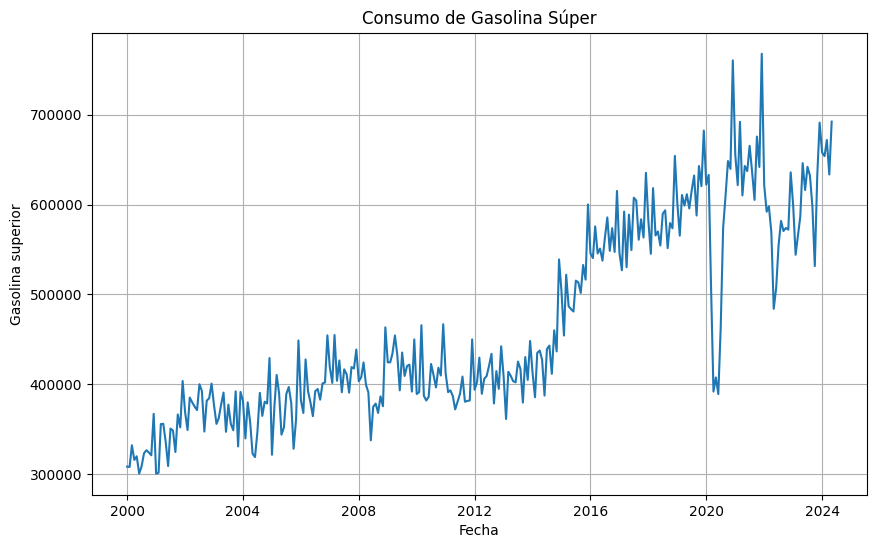

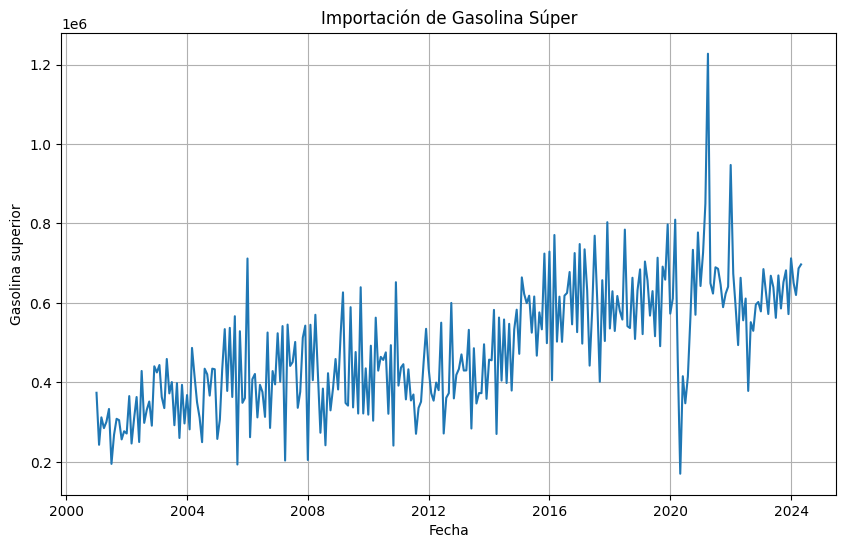

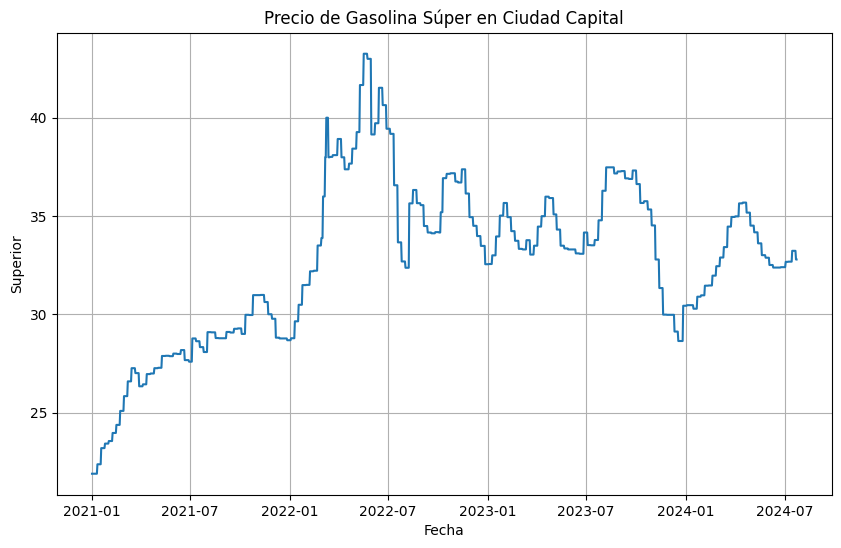

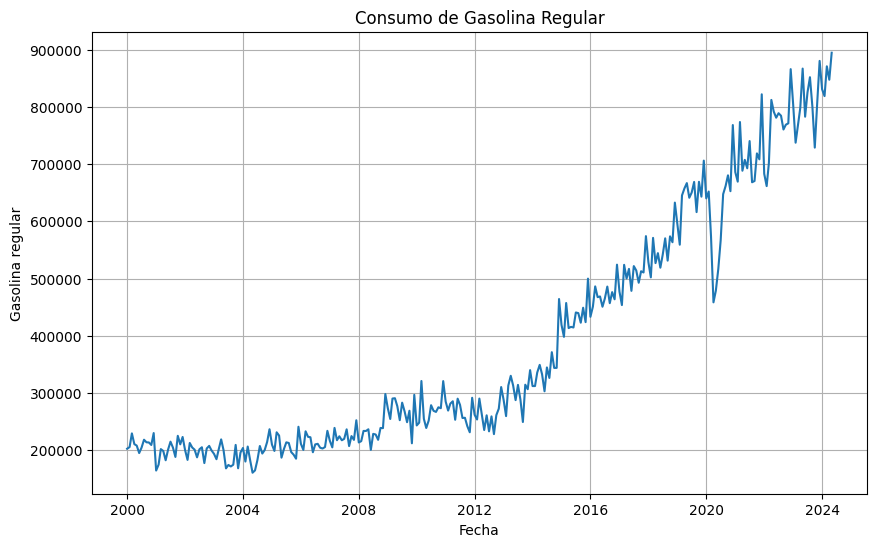

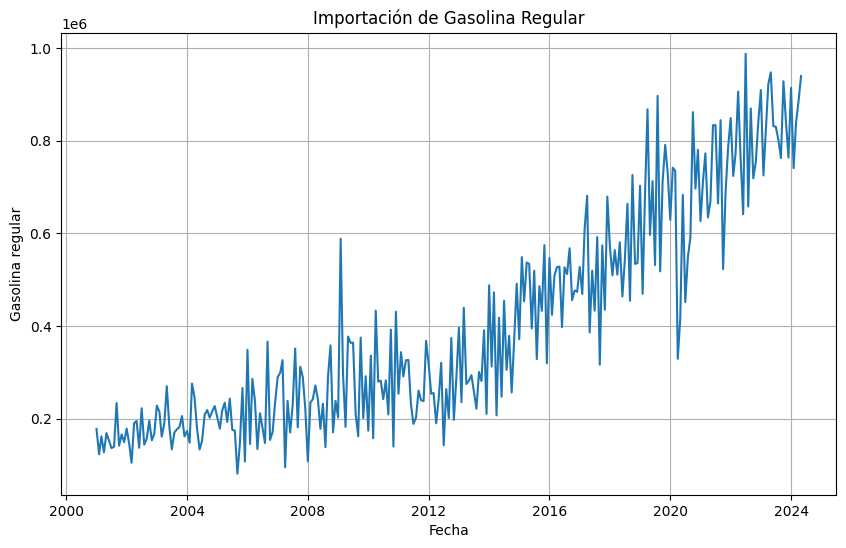

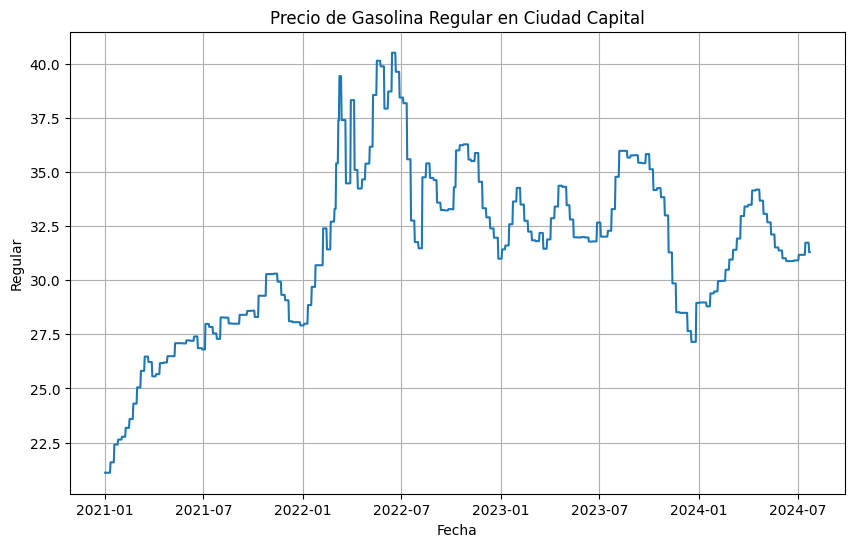

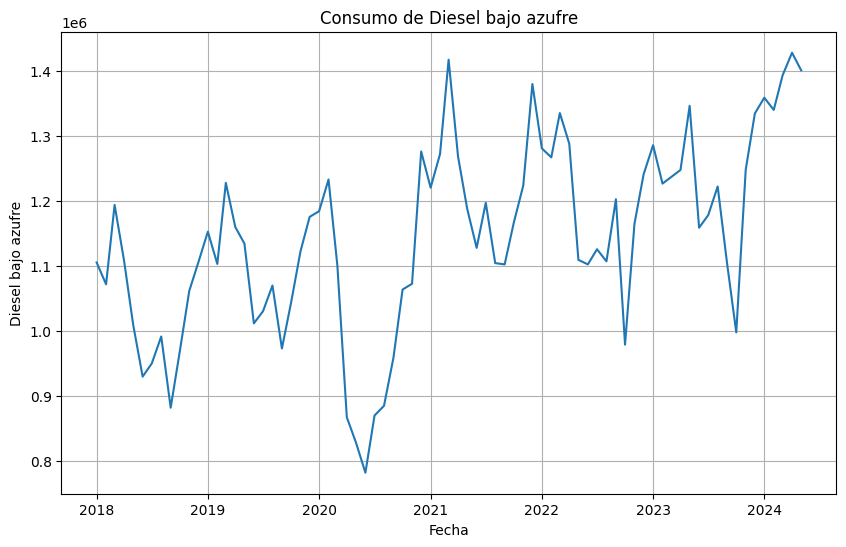

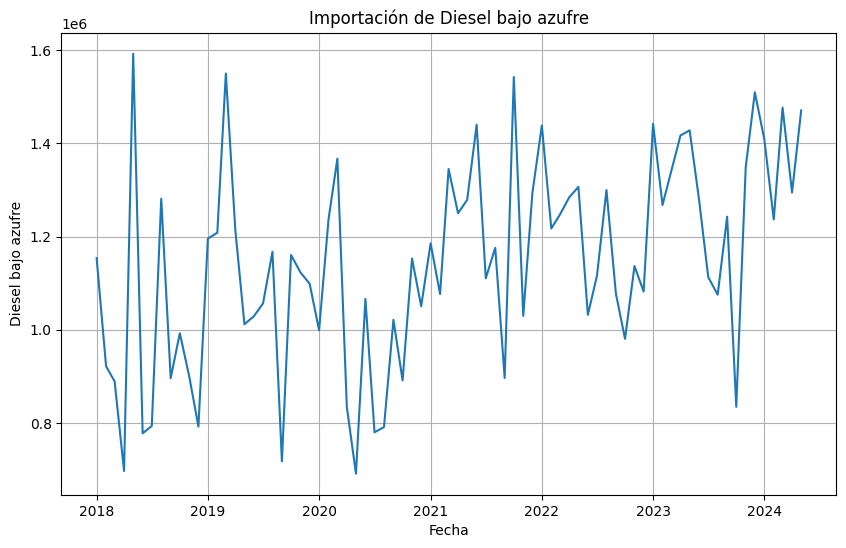

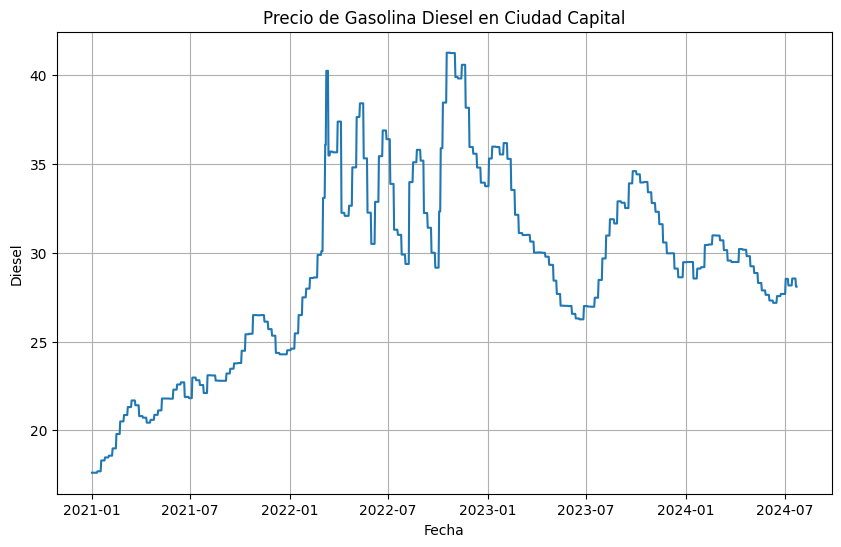

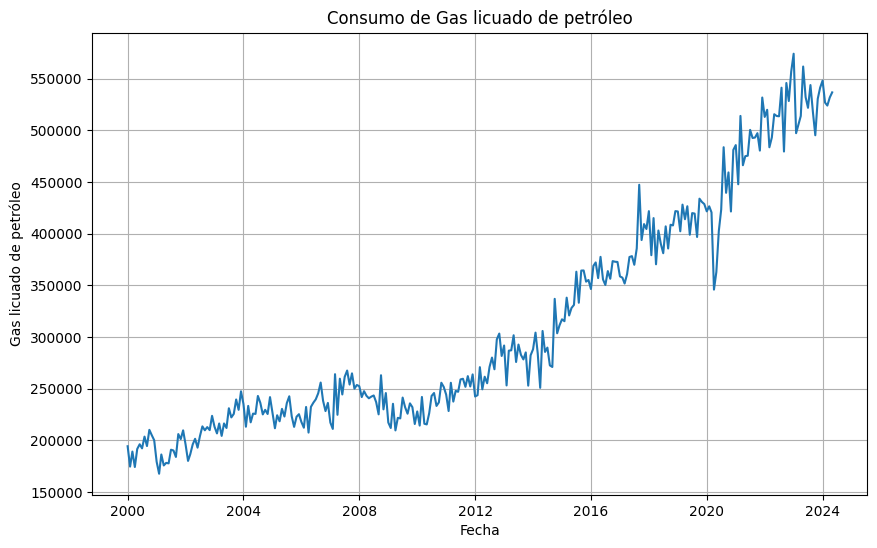

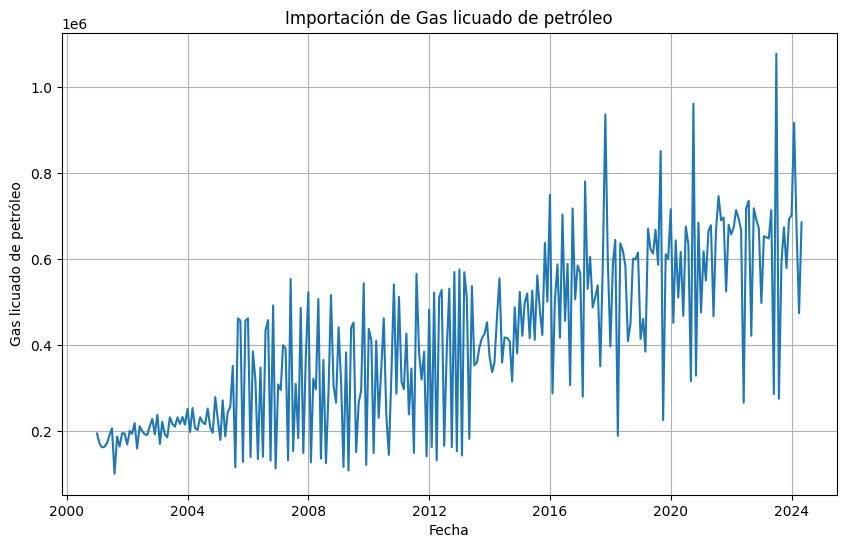

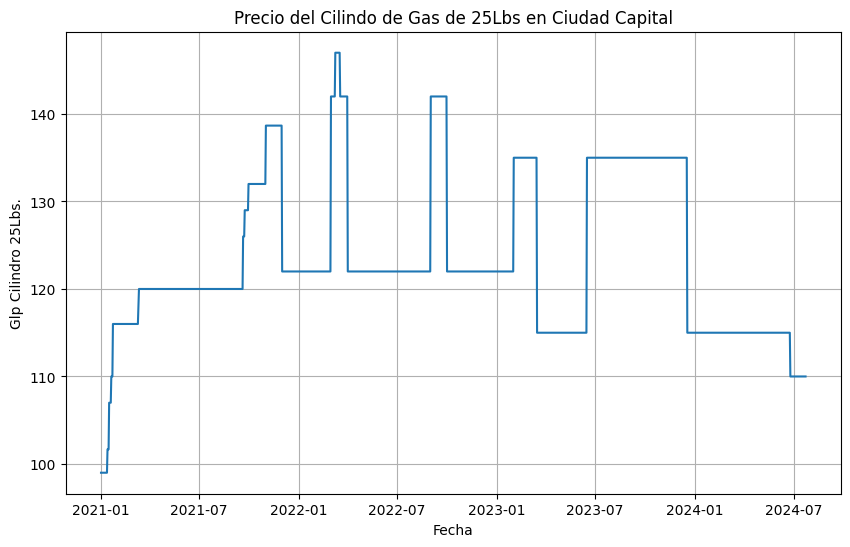

In [3]:
import matplotlib.pyplot as plt

# Convertir la columna de fecha a formato de fecha
consumo_df_filtered['Fecha'] = pd.to_datetime(consumo_df_filtered['Fecha'])
importacion_df_filtered['Fecha'] = pd.to_datetime(importacion_df_filtered['Fecha'])
precios_df_filtered['FECHA'] = pd.to_datetime(precios_df_filtered['FECHA'])

# Ordenar el DataFrame por fecha de forma ascendente
precios_df_filtered = precios_df_filtered.sort_values(by='FECHA').reset_index(drop=True)

# Graficar las series de tiempo
def plot_series(df, date_col, value_col, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_col], df[value_col])
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel(value_col)
    plt.grid(True)
    plt.show()

start_date = '2018-01-01'

consumo_df_filtered_diesel = consumo_df_filtered[consumo_df_filtered['Fecha'] >= start_date]
importacion_df_filtered_diesel = importacion_df_filtered[importacion_df_filtered['Fecha'] >= start_date]

# Comportamiento de las variables de gasolina súper.
plot_series(consumo_df_filtered, 'Fecha', 'Gasolina superior', 'Consumo de Gasolina Súper')
plot_series(importacion_df_filtered, 'Fecha', 'Gasolina superior', 'Importación de Gasolina Súper')
plot_series(precios_df_filtered, 'FECHA', 'Superior', 'Precio de Gasolina Súper en Ciudad Capital')

# Comportamiento de las variables de gasolina regular.
plot_series(consumo_df_filtered, 'Fecha', 'Gasolina regular', 'Consumo de Gasolina Regular')
plot_series(importacion_df_filtered, 'Fecha', 'Gasolina regular', 'Importación de Gasolina Regular')
plot_series(precios_df_filtered, 'FECHA', 'Regular', 'Precio de Gasolina Regular en Ciudad Capital')

# Comportamiento de las variables de Diesel.
plot_series(consumo_df_filtered_diesel, 'Fecha', 'Diesel bajo azufre', 'Consumo de Diesel bajo azufre')
plot_series(importacion_df_filtered_diesel, 'Fecha', 'Diesel bajo azufre', 'Importación de Diesel bajo azufre')
plot_series(precios_df_filtered, 'FECHA', 'Diesel', 'Precio de Gasolina Diesel en Ciudad Capital')

# Comportamiento de las variables de gas licuado de petróleo.
plot_series(consumo_df_filtered, 'Fecha', 'Gas licuado de petróleo', 'Consumo de Gas licuado de petróleo')
plot_series(importacion_df_filtered, 'Fecha', 'Gas licuado de petróleo', 'Importación de Gas licuado de petróleo')
plot_series(precios_df_filtered, 'FECHA', 'Glp Cilindro 25Lbs.', 'Precio del Cilindo de Gas de 25Lbs en Ciudad Capital')

## Series de tiempo a trabajar

            Gas licuado de petróleo  Gasolina regular  Gasolina superior  \
Fecha                                                                      
2000-01-01            194410.476190         202645.20          308156.82   
2000-02-01            174710.552381         205530.96          307766.31   
2000-03-01            189234.066667         229499.56          331910.29   
2000-04-01            174330.607143         210680.40          315648.08   
2000-05-01            191745.147619         208164.34          319667.97   

            Diesel alto azufre  Diesel bajo azufre  Diesel ultra bajo azufre  
Fecha                                                                         
2000-01-01           634667.06                 0.0                       0.0  
2000-02-01           642380.66                 0.0                       0.0  
2000-03-01           699807.25                 0.0                       0.0  
2000-04-01           586803.98                 0.0                      

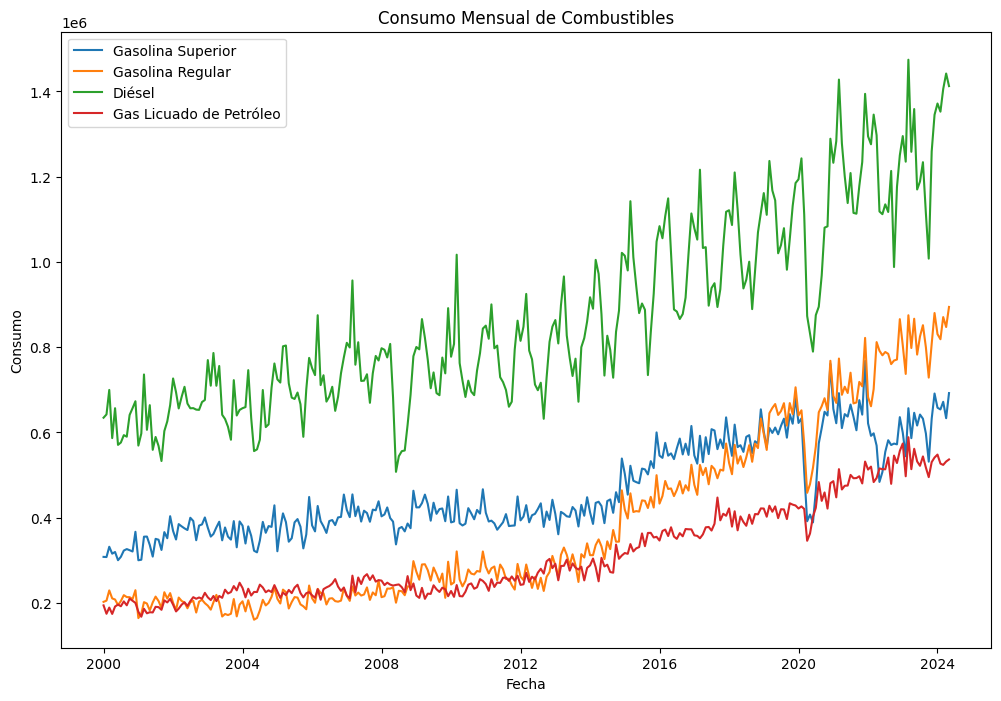

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


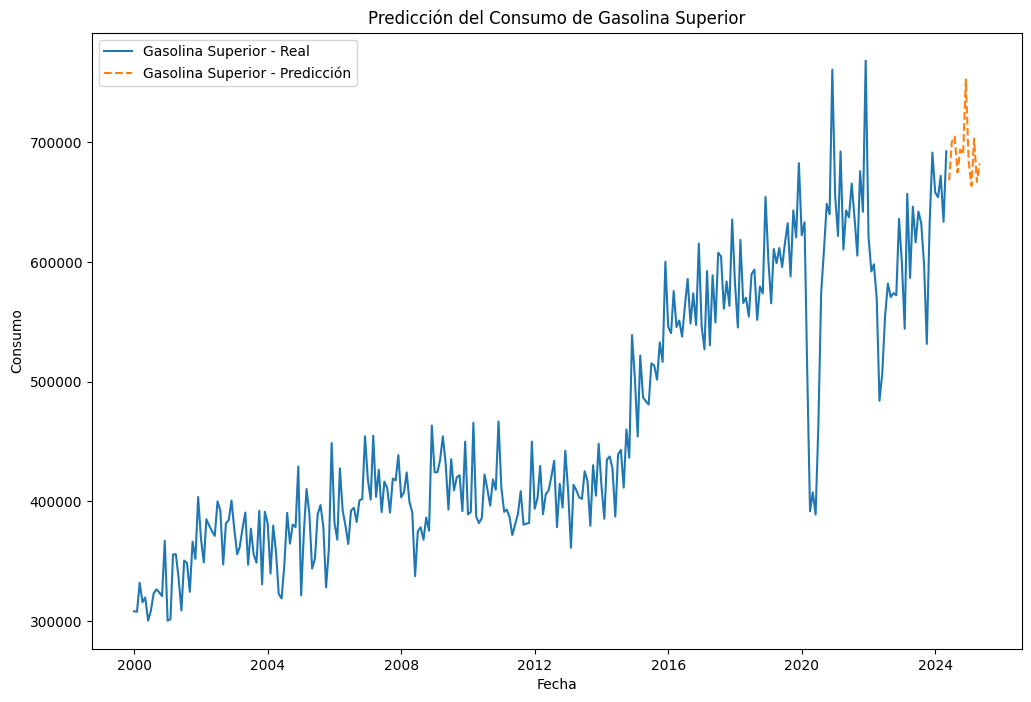

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ruta al archivo .xlsx
file_path = './consumo_gas.xlsx'

# Leer el archivo .xlsx en un DataFrame
df = pd.read_excel(file_path)

# Convertir la columna 'Fecha' a un índice de tipo fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b/%Y')
df.set_index('Fecha', inplace=True)

# Visualizar los datos
print(df.head())

# Crear una serie de tiempo para cada tipo de combustible
series_gasolina_super = df['Gasolina superior']
series_gasolina_regular = df['Gasolina regular']
series_diesel = df[['Diesel alto azufre', 'Diesel bajo azufre', 'Diesel ultra bajo azufre']].sum(axis=1)
series_gas_licuado = df['Gas licuado de petróleo']

# Graficar las series de tiempo
plt.figure(figsize=(12, 8))
plt.plot(series_gasolina_super, label='Gasolina Superior')
plt.plot(series_gasolina_regular, label='Gasolina Regular')
plt.plot(series_diesel, label='Diésel')
plt.plot(series_gas_licuado, label='Gas Licuado de Petróleo')
plt.legend()
plt.title('Consumo Mensual de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.show()

# Estimar precios utilizando Holt-Winters Exponential Smoothing
model_gasolina_super = ExponentialSmoothing(series_gasolina_super, seasonal='add', seasonal_periods=12).fit()
pred_gasolina_super = model_gasolina_super.forecast(12)

# Graficar las predicciones
plt.figure(figsize=(12, 8))
plt.plot(series_gasolina_super, label='Gasolina Superior - Real')
plt.plot(pred_gasolina_super, label='Gasolina Superior - Predicción', linestyle='--')
plt.legend()
plt.title('Predicción del Consumo de Gasolina Superior')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.show()

In [5]:
# Función para obtener inicio, fin y frecuencia de una serie de tiempo
def serie_info(serie):
    inicio = serie.index.min()
    fin = serie.index.max()
    frecuencia = pd.infer_freq(serie.index)
    return inicio, fin, frecuencia

info_gasolina_super = serie_info(series_gasolina_super)
info_gasolina_regular = serie_info(series_gasolina_regular)
info_diesel = serie_info(series_diesel)
info_gas_licuado = serie_info(series_gas_licuado)


# Mostrar la información
print("Gasolina Superior:")
print(f"Inicio: {info_gasolina_super[0]}")
print(f"Fin: {info_gasolina_super[1]}")
print(f"Frecuencia: {info_gasolina_super[2]}")

print("\nGasolina Regular:")
print(f"Inicio: {info_gasolina_regular[0]}")
print(f"Fin: {info_gasolina_regular[1]}")
print(f"Frecuencia: {info_gasolina_regular[2]}")

print("\nDiésel:")
print(f"Inicio: {info_diesel[0]}")
print(f"Fin: {info_diesel[1]}")
print(f"Frecuencia: {info_diesel[2]}")

print("\nGas Licuado:")
print(f"Inicio: {info_gas_licuado[0]}")
print(f"Fin: {info_gas_licuado[1]}")
print(f"Frecuencia: {info_gas_licuado[2]}")

Gasolina Superior:
Inicio: 2000-01-01 00:00:00
Fin: 2024-05-01 00:00:00
Frecuencia: MS

Gasolina Regular:
Inicio: 2000-01-01 00:00:00
Fin: 2024-05-01 00:00:00
Frecuencia: MS

Diésel:
Inicio: 2000-01-01 00:00:00
Fin: 2024-05-01 00:00:00
Frecuencia: MS

Gas Licuado:
Inicio: 2000-01-01 00:00:00
Fin: 2024-05-01 00:00:00
Frecuencia: MS


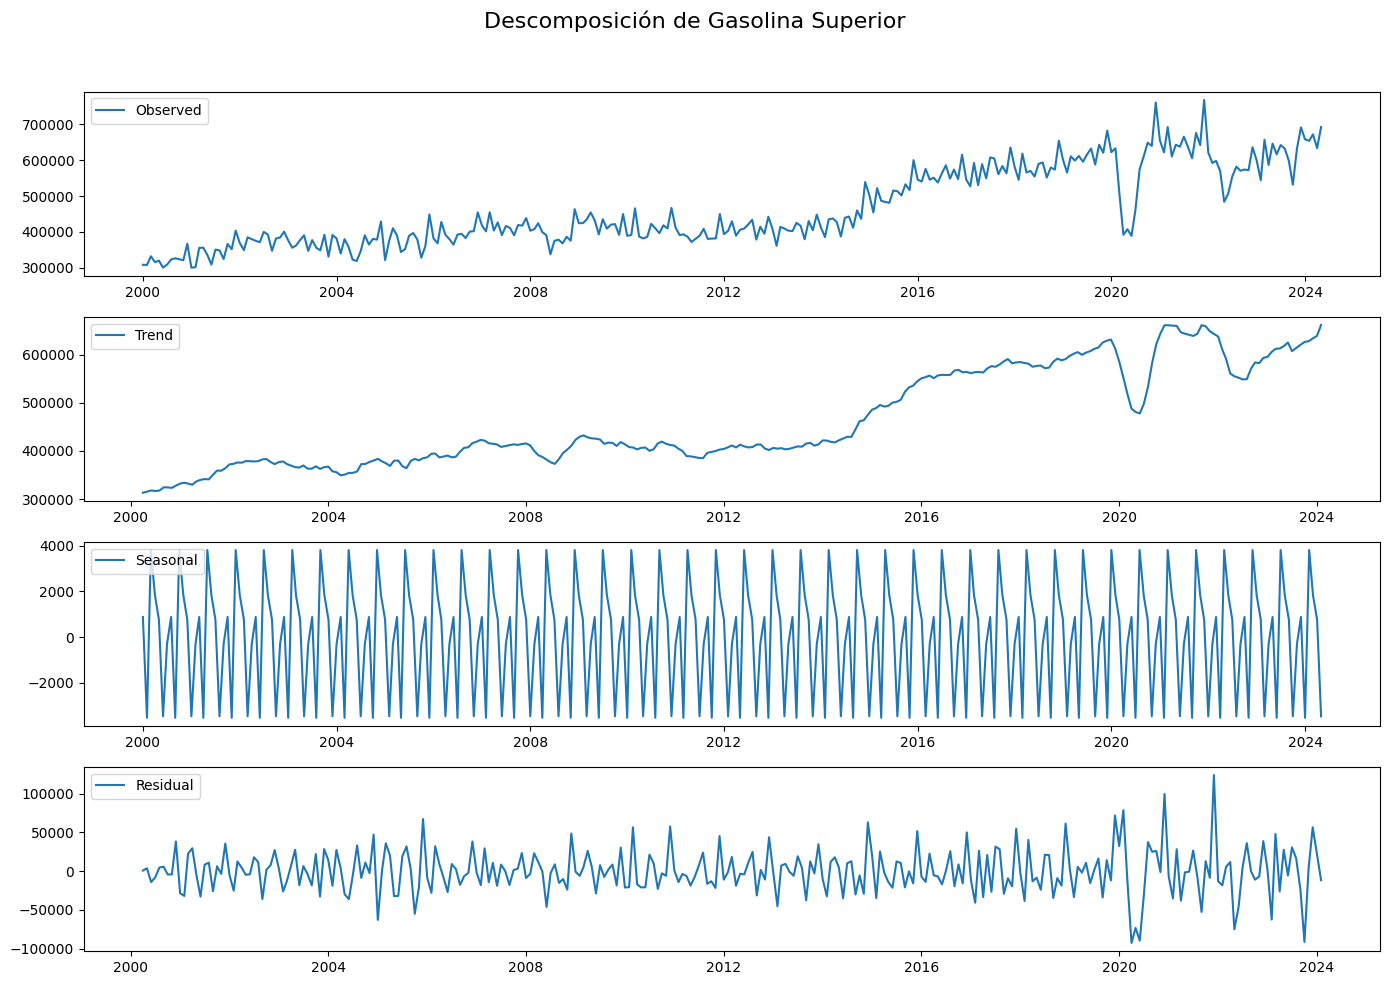

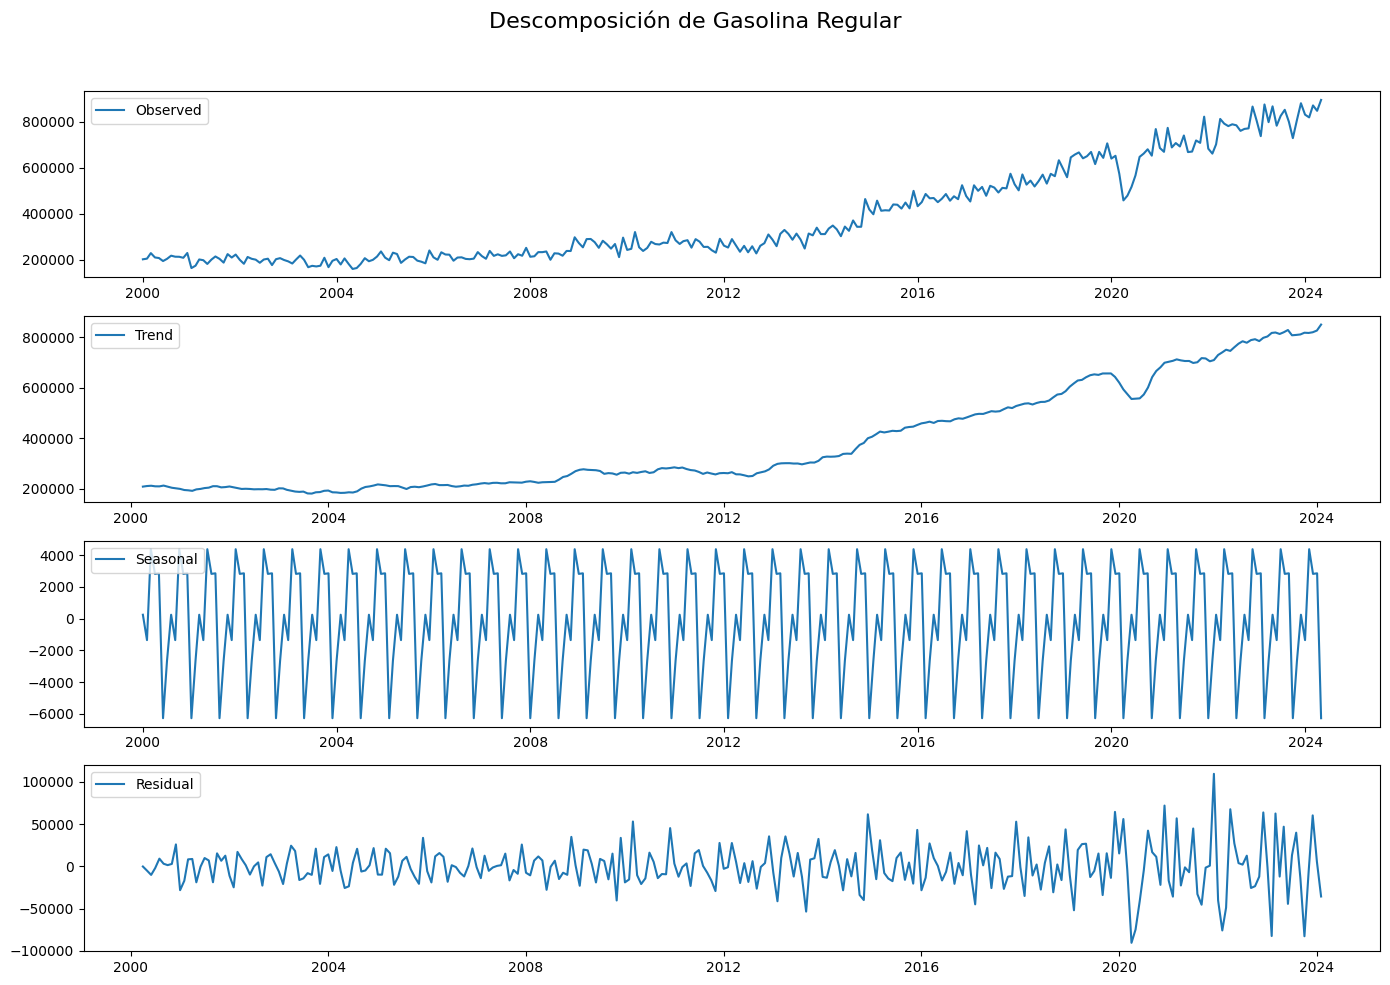

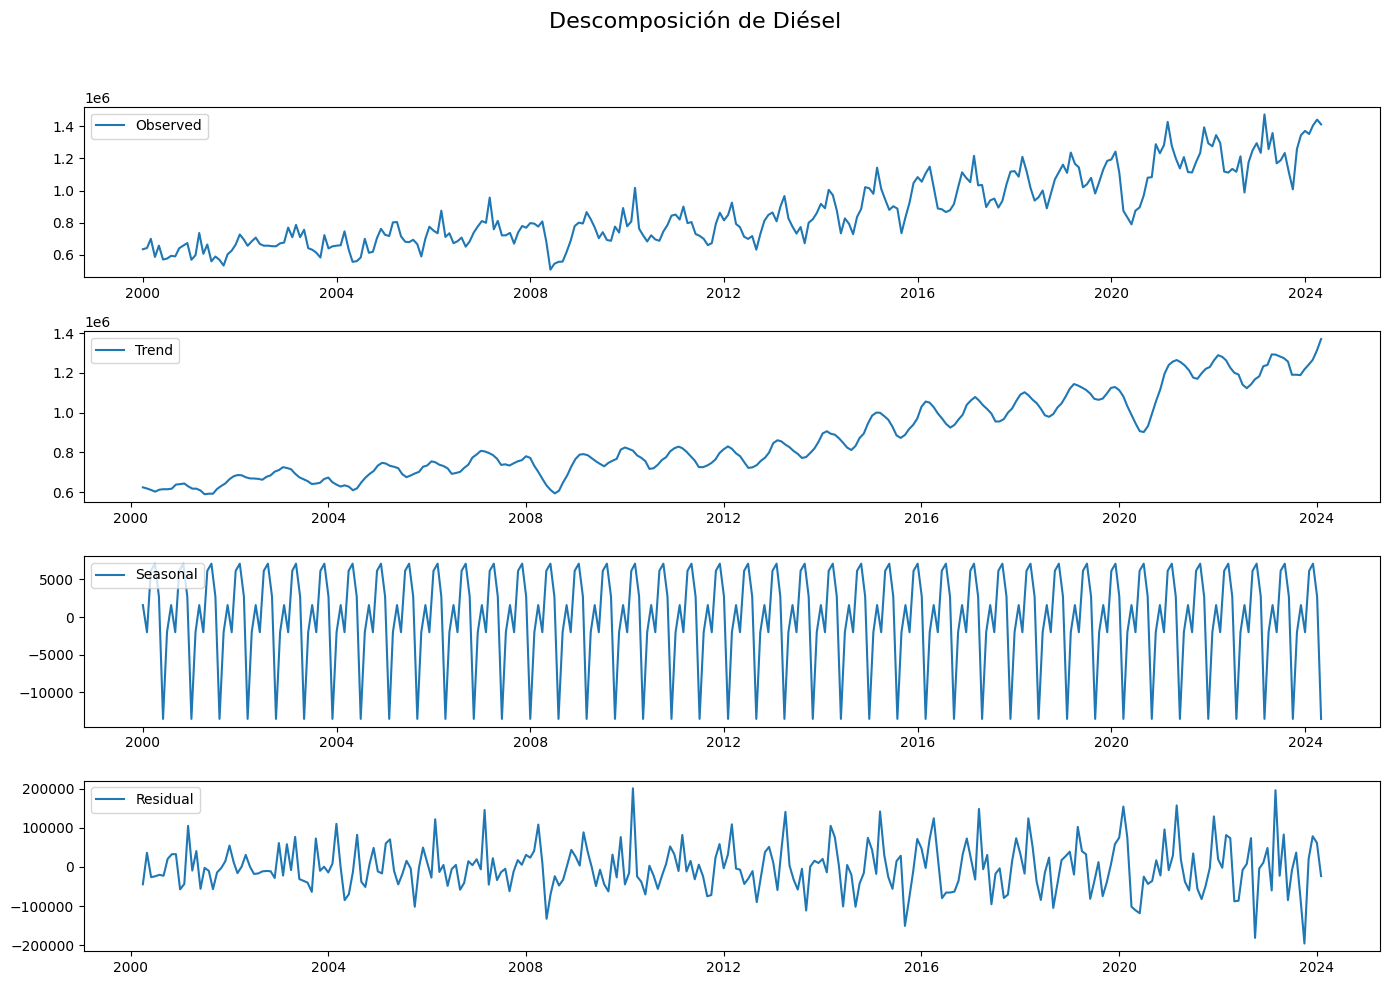

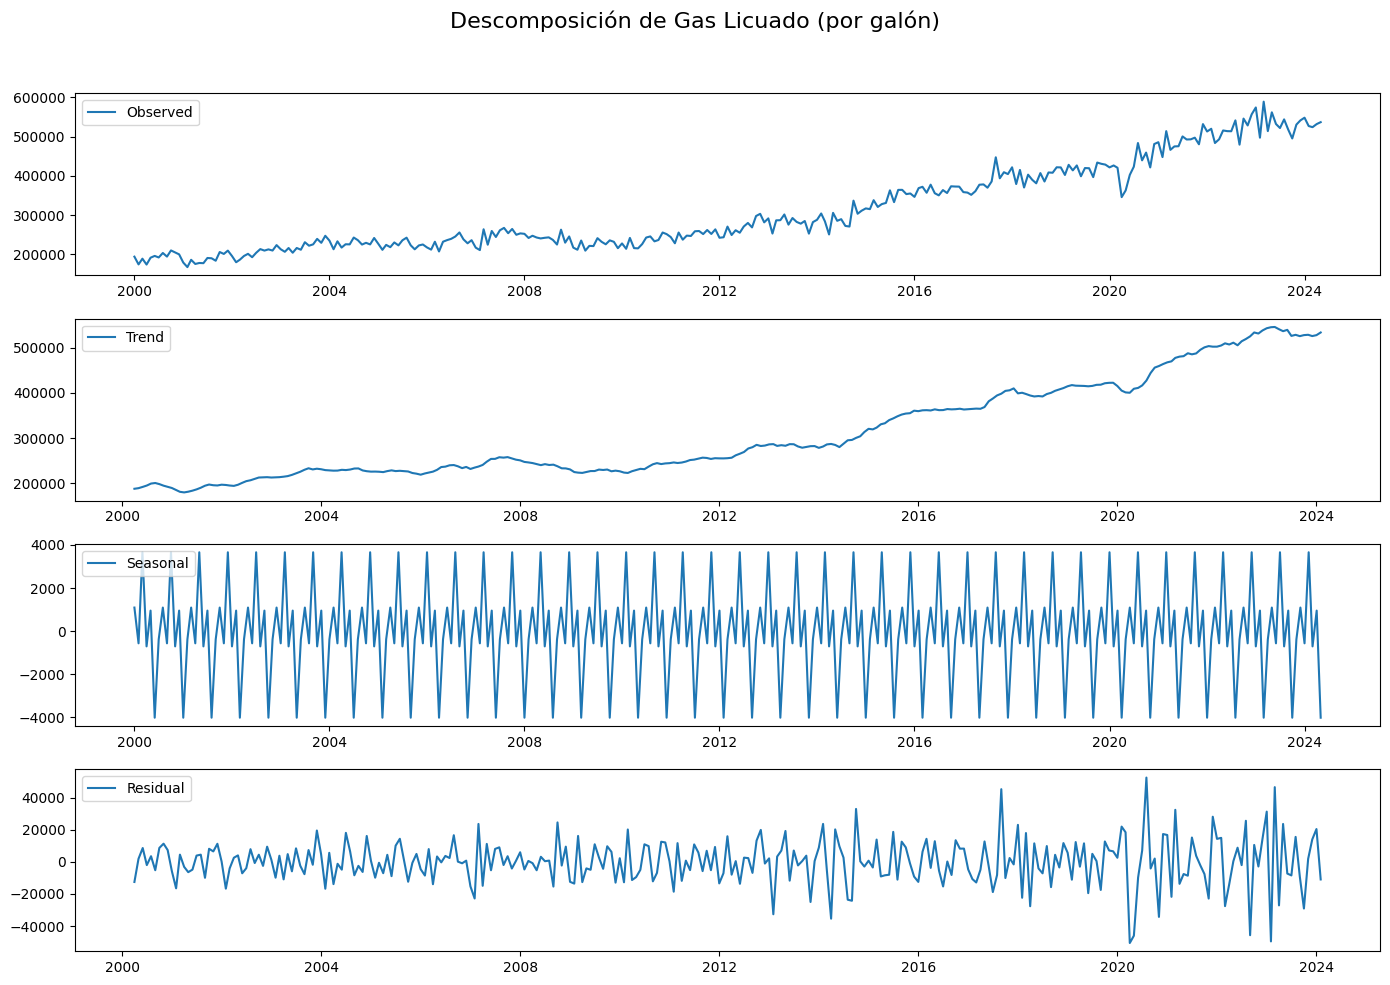

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar la descomposición de la serie para cada tipo de combustible
decomposed_super = seasonal_decompose(series_gasolina_super, model='additive', period=7)
decomposed_regular = seasonal_decompose(series_gasolina_regular, model='additive', period=7)
decomposed_diesel = seasonal_decompose(series_diesel, model='additive', period=7)
decomposed_gas_licuado = seasonal_decompose(series_gas_licuado, model='additive', period=7)

# Función para graficar la descomposición
def plot_decomposition(decomposed, title):
    plt.figure(figsize=(14, 10))
    plt.suptitle(title, fontsize=16)
    plt.subplot(411)
    plt.plot(decomposed.observed, label='Observed')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposed.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposed.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposed.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Graficar la descomposición para cada serie
plot_decomposition(decomposed_super, 'Descomposición de Gasolina Superior')
plot_decomposition(decomposed_regular, 'Descomposición de Gasolina Regular')
plot_decomposition(decomposed_diesel, 'Descomposición de Diésel')
plot_decomposition(decomposed_gas_licuado, 'Descomposición de Gas Licuado (por galón)')

In [7]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller para la serie diferenciada
result_super = adfuller(series_gasolina_super.dropna())
result_regular = adfuller(series_gasolina_regular.dropna())
result_diesel = adfuller(series_diesel.dropna())
result_gas_licuado = adfuller(series_gas_licuado.dropna())

print("ADF Statistic (Gasolina Superior):", result_super[0])
print("p-value (Gasolina Superior):", result_super[1])
print("ADF Statistic (Gasolina Regular):", result_regular[0])
print("p-value (Gasolina Regular):", result_regular[1])
print("ADF Statistic (Diesel):", result_diesel[0])
print("p-value (Diesel):", result_diesel[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado[0])
print("p-value (Gas Licuado):", result_gas_licuado[1])

ADF Statistic (Gasolina Superior): -0.6787829834154699
p-value (Gasolina Superior): 0.8521689503946175
ADF Statistic (Gasolina Regular): 2.712413649239669
p-value (Gasolina Regular): 0.9990875733155129
ADF Statistic (Diesel): 0.18941178386381716
p-value (Diesel): 0.9716614411975102
ADF Statistic (Gas Licuado): 0.8662148782601522
p-value (Gas Licuado): 0.9926331955934964


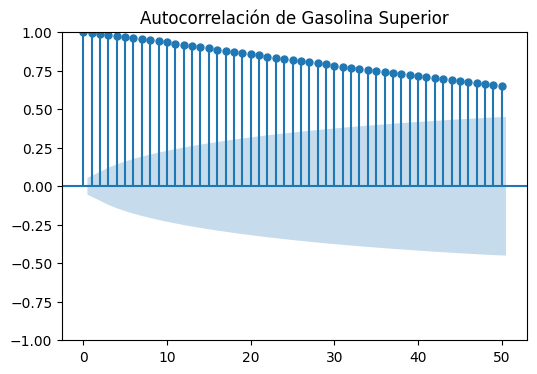

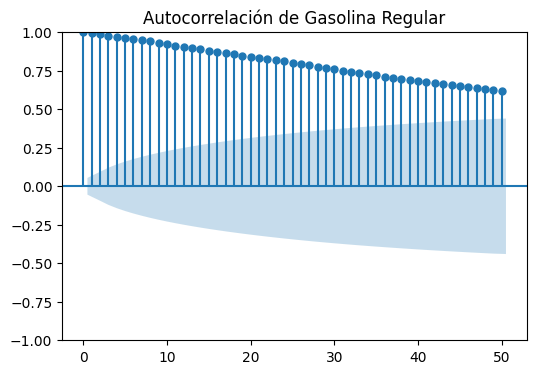

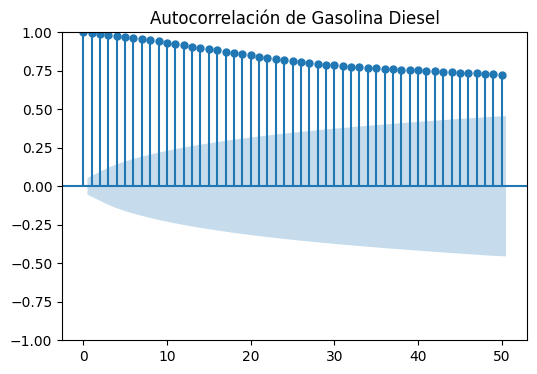

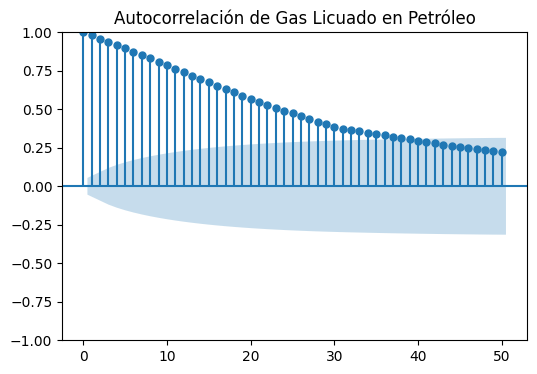

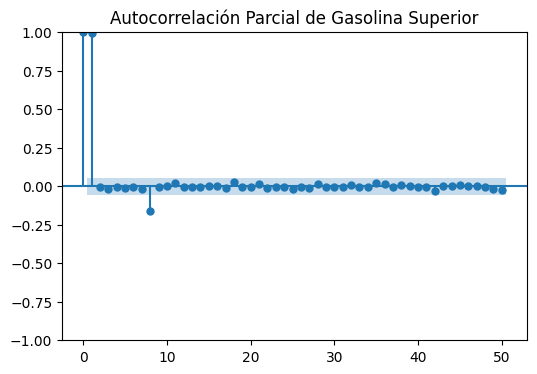

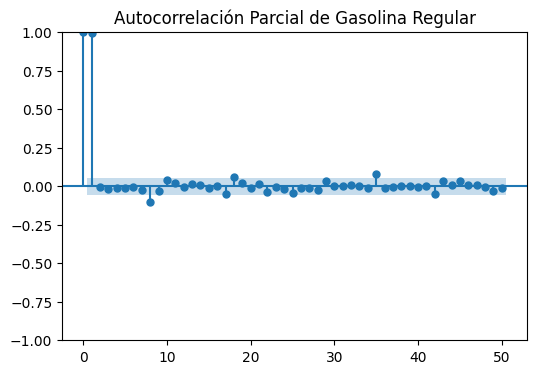

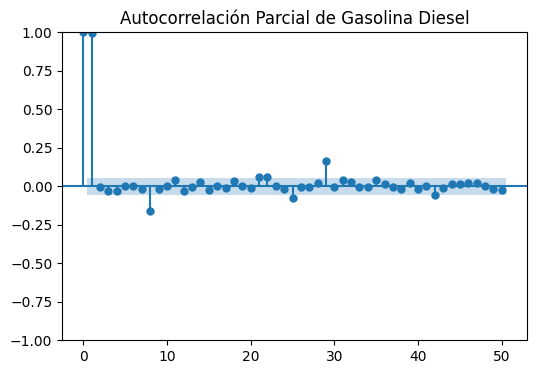

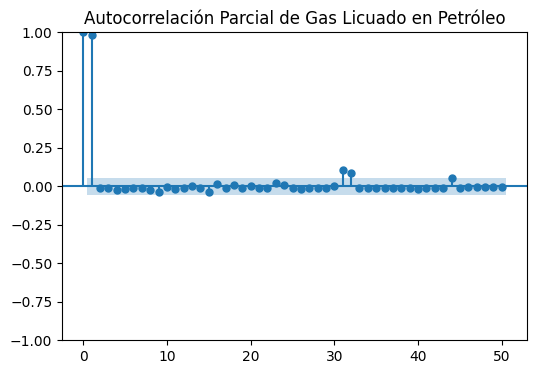

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_super.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_regular.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_diesel.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gas_licuado.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gas Licuado en Petróleo')
plt.show()

# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_super.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_regular.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_diesel.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gas_licuado.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gas Licuado en Petróleo')
plt.show()


In [18]:
series_super_diff = series_gasolina_super.diff().dropna()
series_regular_diff = series_gasolina_regular.diff().dropna()
series_diesel_diff = series_diesel.diff().dropna()
series_gas_licuado_diff = series_gas_licuado.diff().dropna()

# Prueba de Dickey-Fuller para la serie diferenciada
result_super_diff = adfuller(series_super_diff.dropna())
result_regular_diff = adfuller(series_regular_diff.dropna())
result_diesel_diff = adfuller(series_diesel_diff.dropna())
result_gas_licuado_diff = adfuller(series_gas_licuado_diff.dropna())

print("ADF Statistic (Gasolina Superior):", result_super_diff[0])
print("p-value (Gasolina Superior):", result_super_diff[1])
print("ADF Statistic (Gasolina Regular):", result_regular_diff[0])
print("p-value (Gasolina Regular):", result_regular_diff[1])
print("ADF Statistic (Diesel):", result_diesel_diff[0])
print("p-value (Diesel):", result_diesel_diff[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado_diff[0])
print("p-value (Gas Licuado):", result_gas_licuado_diff[1])

ADF Statistic (Gasolina Superior): -9.717767471367722
p-value (Gasolina Superior): 9.725947597747726e-17
ADF Statistic (Gasolina Regular): -8.514719078688485
p-value (Gasolina Regular): 1.1422615182012375e-13
ADF Statistic (Diesel): -7.086006693195777
p-value (Diesel): 4.5367638403782357e-10
ADF Statistic (Gas Licuado): -35.95993930669578
p-value (Gas Licuado): 0.0


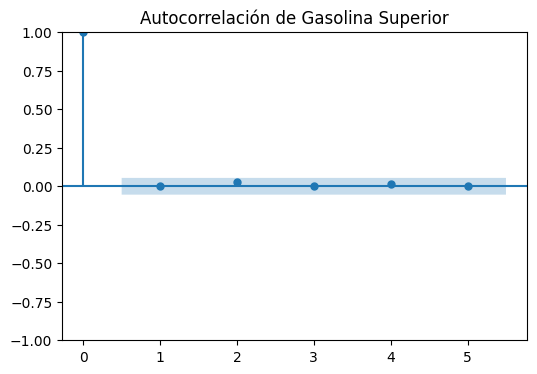

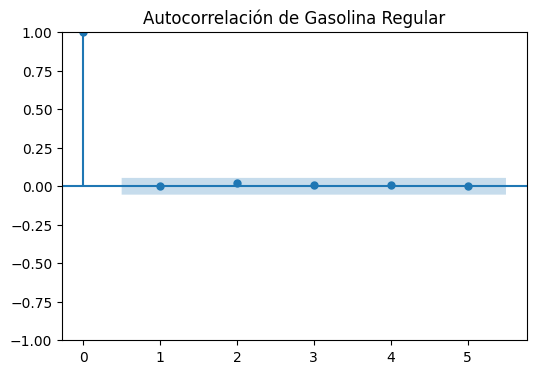

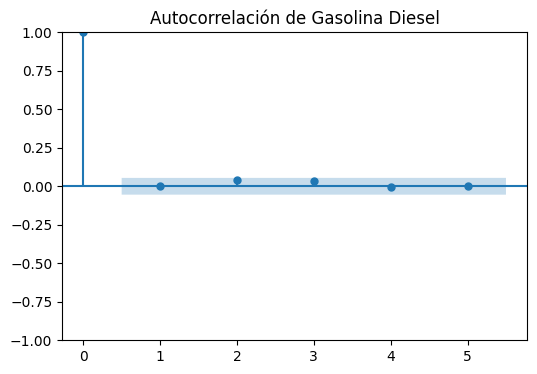

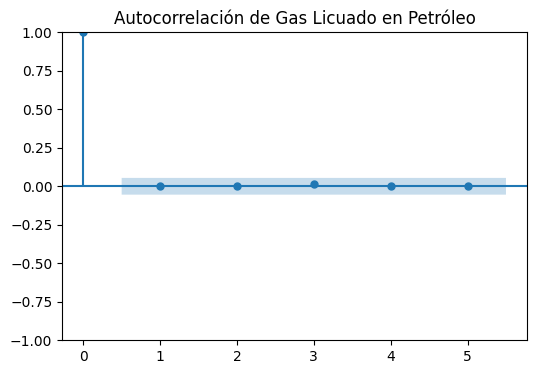

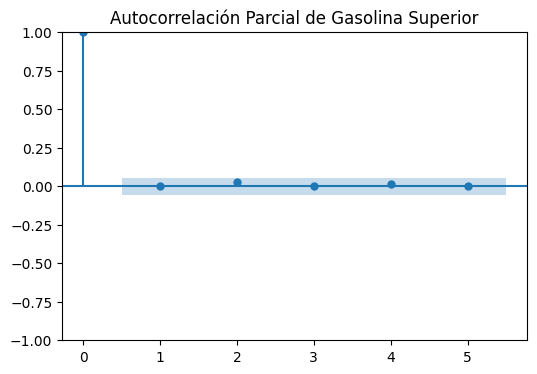

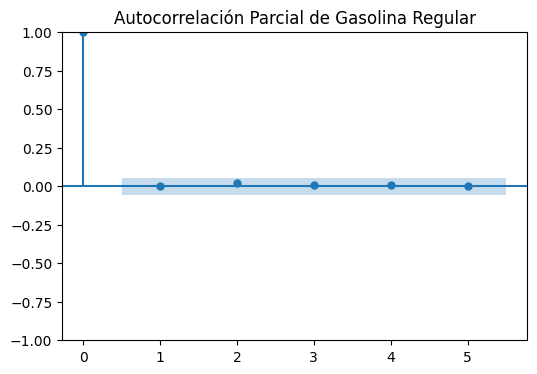

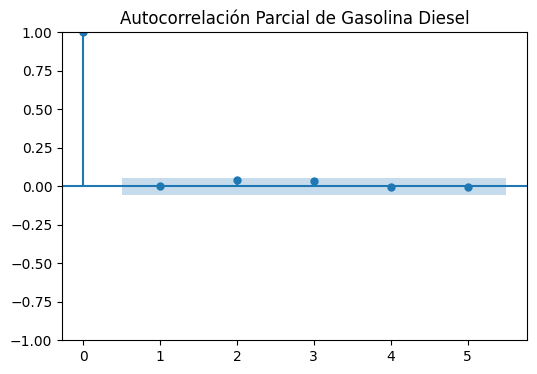

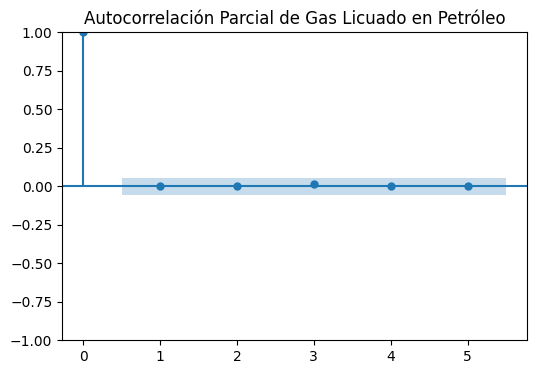

In [61]:
# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_acf(series_super_diff.dropna(), lags=5, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_regular_diff.dropna(), lags=5, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_diesel_diff.dropna(), lags=5, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gas_licuado_diff.dropna(), lags=5, ax=plt.gca())
plt.title('Autocorrelación de Gas Licuado en Petróleo')
plt.show()

# Graficar autocorrelación parcial
plt.figure(figsize=(6, 4))
plot_pacf(series_super_diff.dropna(), lags=5, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_regular_diff.dropna(), lags=5, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_diesel_diff.dropna(), lags=5, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gas_licuado_diff.dropna(), lags=5, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gas Licuado en Petróleo')
plt.show()

In [34]:
from pmdarima import auto_arima

model_super = auto_arima(series_super_diff, seasonal=True, m=12)
print(model_super.summary())

model_regular = auto_arima(series_regular_diff, seasonal=True, m=12)
print(model_regular.summary())

model_diesel = auto_arima(series_diesel_diff, seasonal=True, m=12)
print(model_diesel.summary())

model_gas_licuado = auto_arima(series_gas_licuado_diff, seasonal=True, m=12)
print(model_gas_licuado.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1299
Model:                        SARIMAX   Log Likelihood                -386.794
Date:                Thu, 01 Aug 2024   AIC                            775.588
Time:                        21:04:28   BIC                            780.757
Sample:                    01-02-2021   HQIC                           777.527
                         - 07-23-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1062      0.001    118.714      0.000       0.104       0.108
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             93180.14
Prob(Q):                              0.98   Pr

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC: 785.8443036379558
BIC: 801.3500433297479


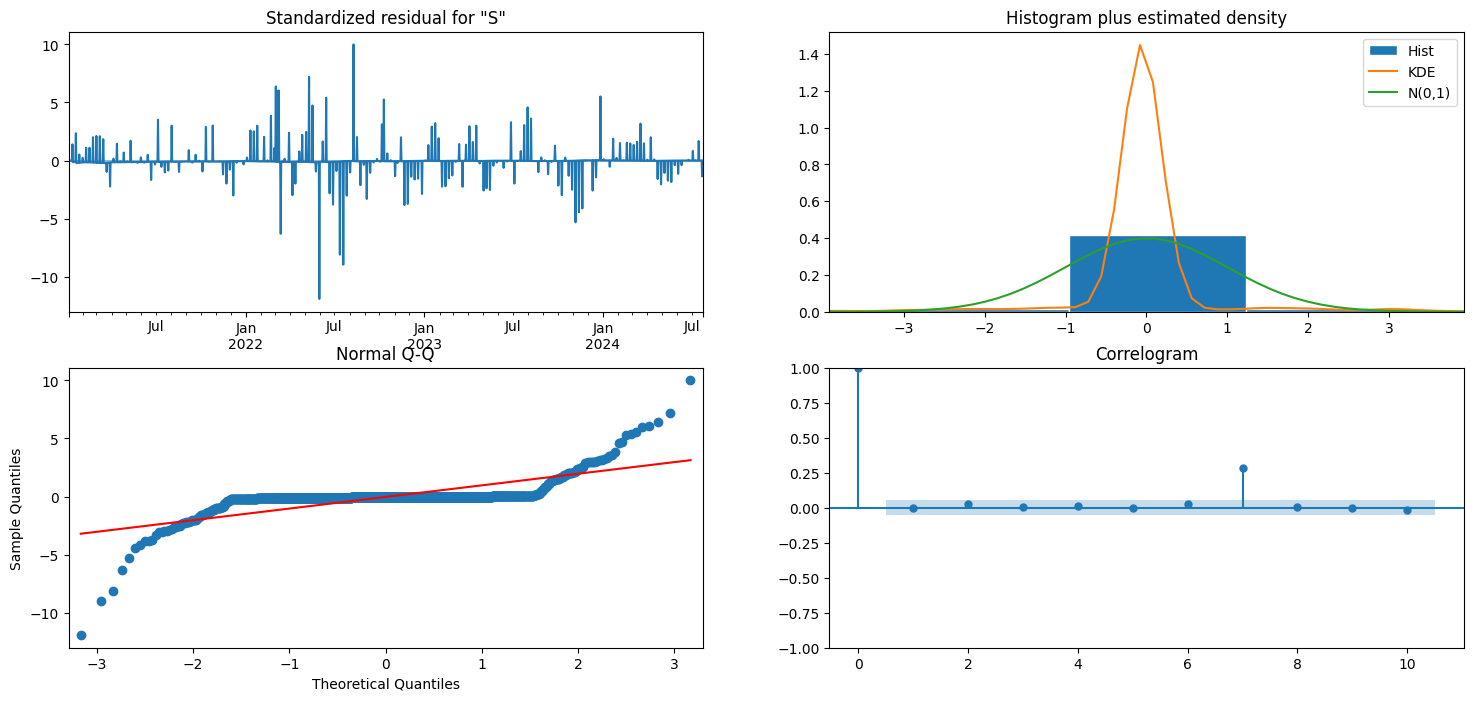

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC: 998.0056533683119
BIC: 1013.511393060104


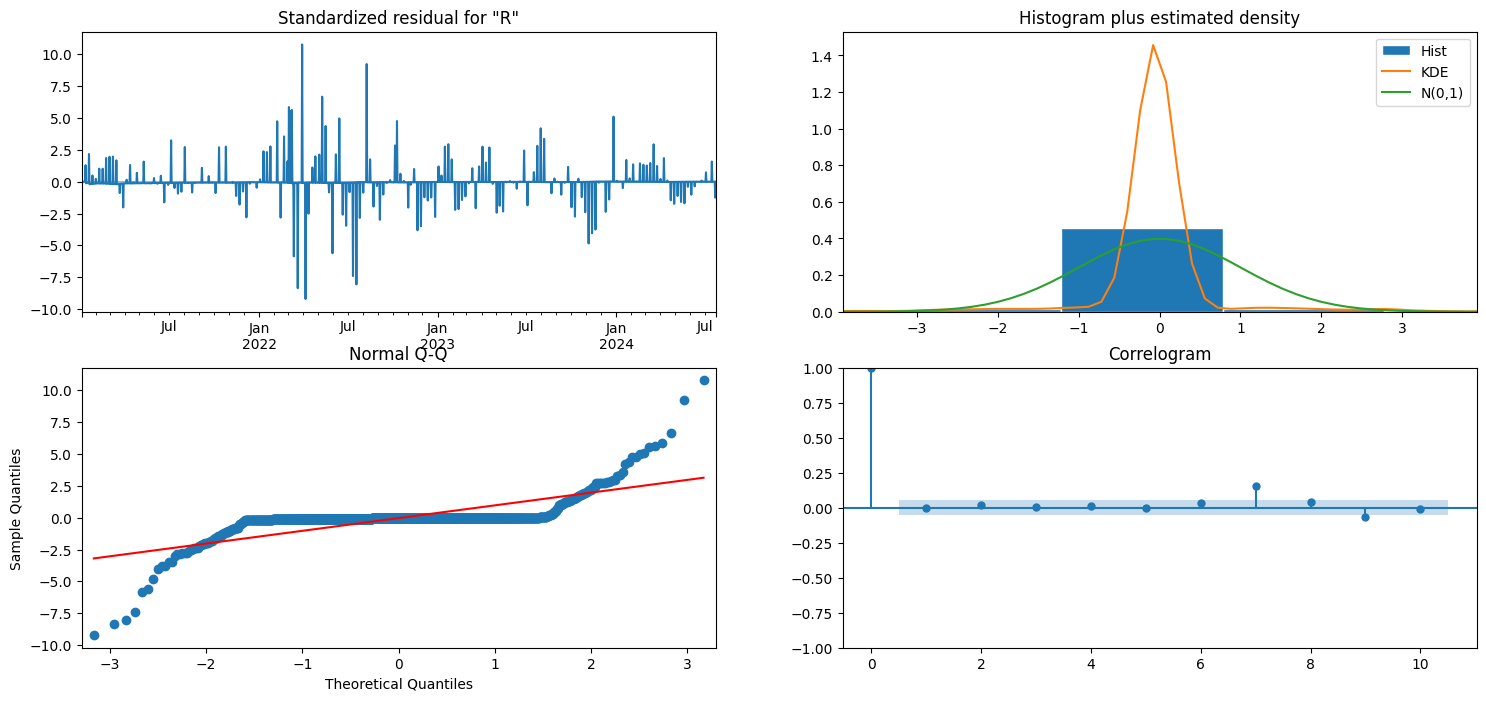

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC: 1755.832712869205
BIC: 1771.338452560997


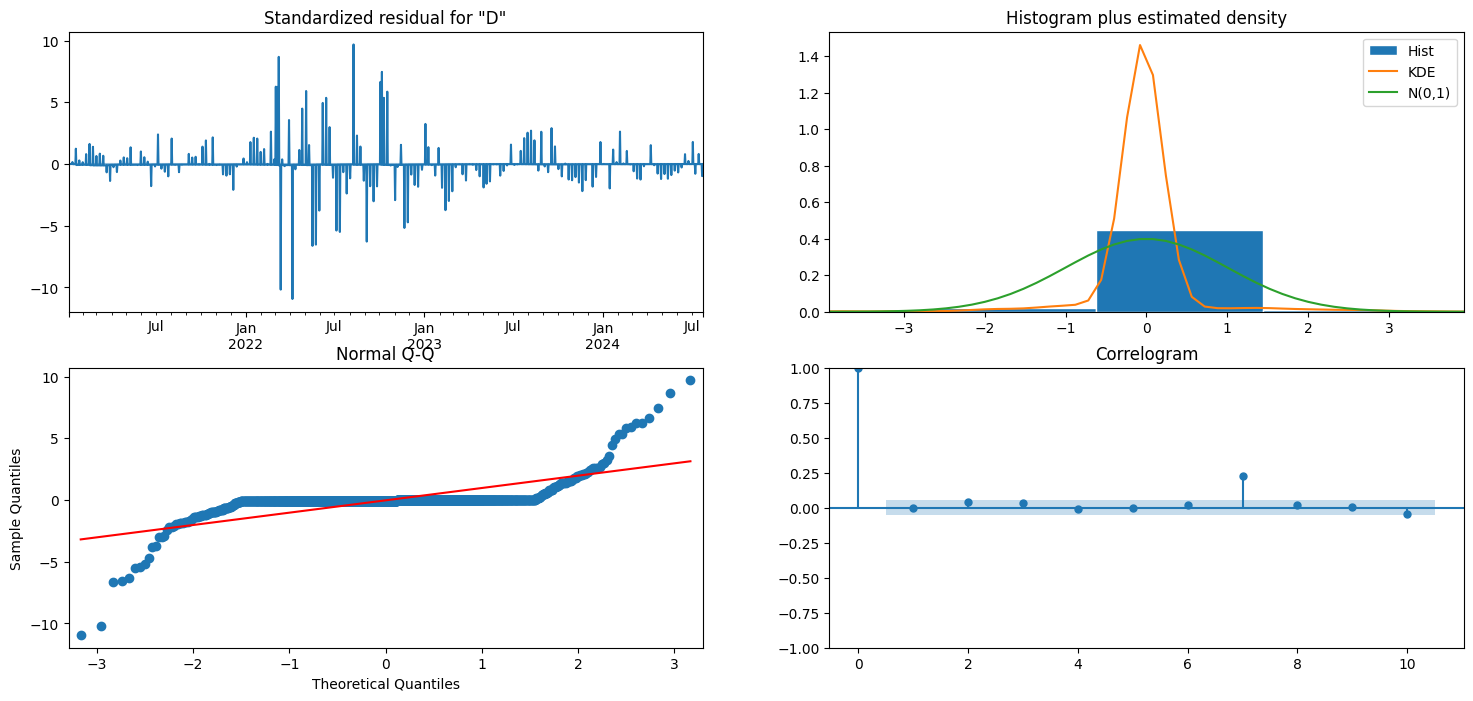

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC: 1607.6663580582026
BIC: 1623.1720977499947


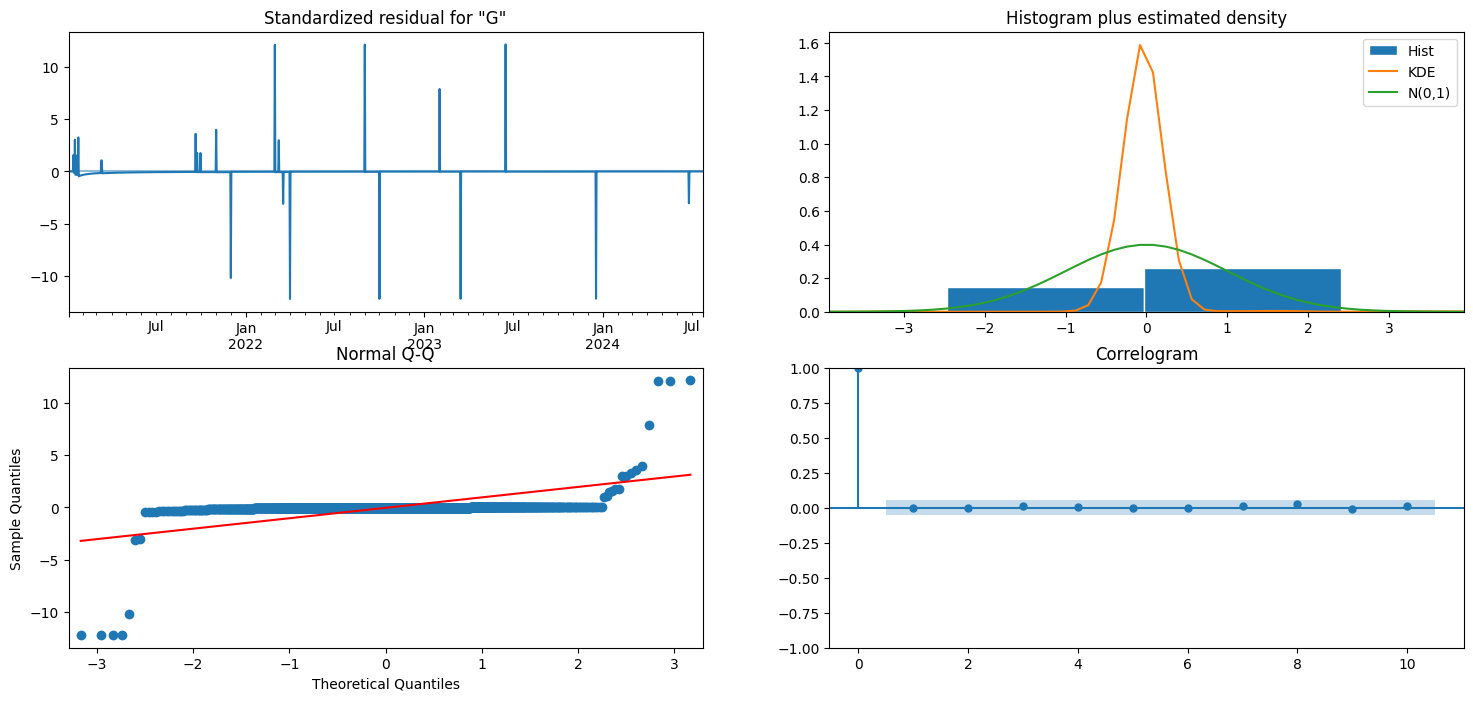

In [49]:
from statsmodels.tsa.arima.model import ARIMA

model_super_ARIMA = ARIMA(series_super_diff, order=(1, 1, 1))
model_fit_super = model_super_ARIMA.fit()
print('AIC:', model_fit_super.aic)
print('BIC:', model_fit_super.bic)

model_fit_super.plot_diagnostics(figsize=(18, 8))
plt.show()

model_regular_ARIMA = ARIMA(series_regular_diff, order=(1, 1, 1))
model_fit_regular = model_regular_ARIMA.fit()
print('AIC:', model_fit_regular.aic)
print('BIC:', model_fit_regular.bic)

model_fit_regular.plot_diagnostics(figsize=(18, 8))
plt.show()

model_diesel_ARIMA = ARIMA(series_diesel_diff, order=(1, 1, 1))
model_fit_diesel = model_diesel_ARIMA.fit()
print('AIC:', model_fit_diesel.aic)
print('BIC:', model_fit_diesel.bic)

model_fit_diesel.plot_diagnostics(figsize=(18, 8))
plt.show()

model_gas_licuado_ARIMA = ARIMA(series_gas_licuado_diff, order=(1, 1, 1))
model_fit_gas_licuado = model_gas_licuado_ARIMA.fit()
print('AIC:', model_fit_gas_licuado.aic)
print('BIC:', model_fit_gas_licuado.bic)

model_fit_gas_licuado.plot_diagnostics(figsize=(18, 8))
plt.show()

21:35:02 - cmdstanpy - INFO - Chain [1] start processing
21:35:02 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:

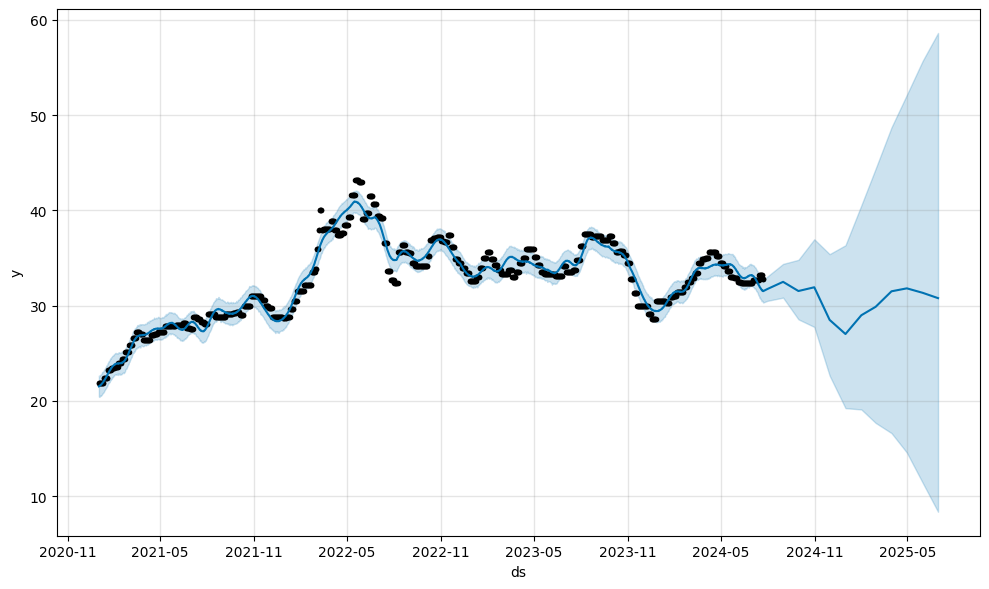

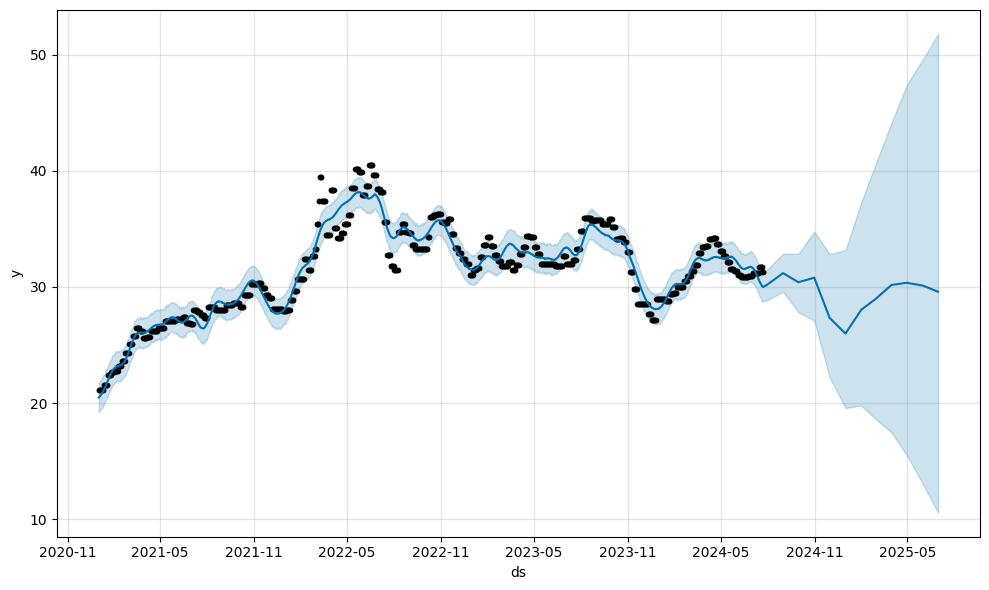

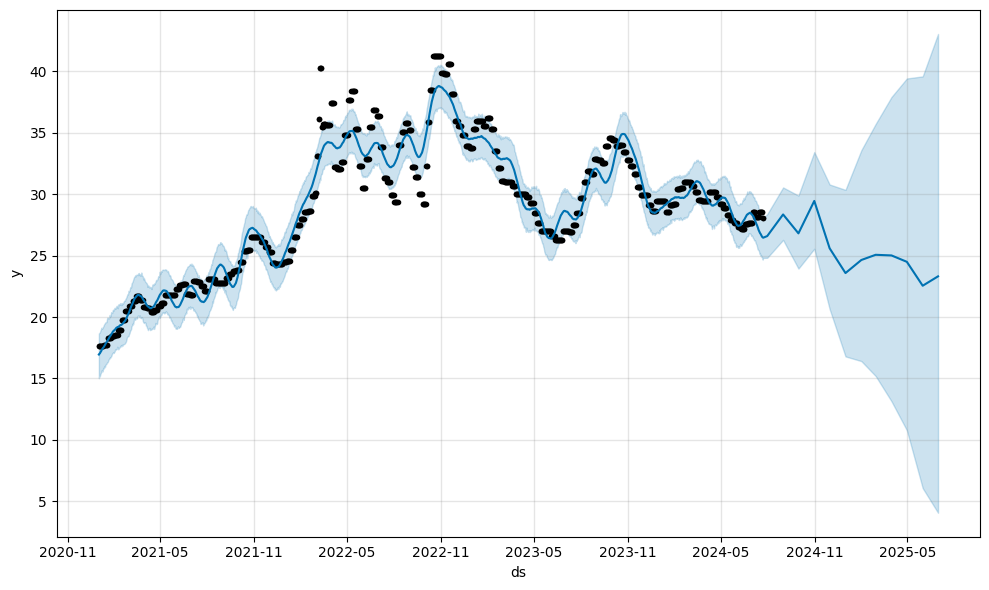

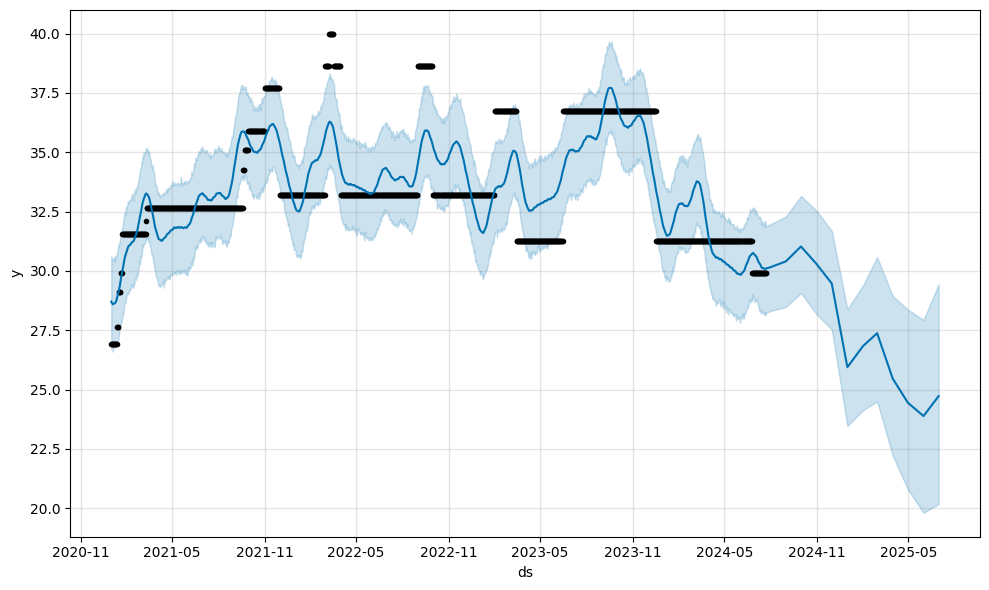

In [60]:
from prophet import Prophet

series_gasolina_super_prophet = series_gasolina_super.reset_index()
series_gasolina_super_prophet.columns = ['ds', 'y']

model_super_prophet = Prophet()
model_super_prophet.fit(series_gasolina_super_prophet)
future = model_super_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_super_prophet.predict(future)

fig = model_super_prophet.plot(forecast)

series_gasolina_regular_prophet = series_gasolina_regular.reset_index()
series_gasolina_regular_prophet.columns = ['ds', 'y']

model_regular_prophet = Prophet()
model_regular_prophet.fit(series_gasolina_regular_prophet)
future = model_regular_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_regular_prophet.predict(future)

fig = model_regular_prophet.plot(forecast)

series_diesel_prophet = series_diesel.reset_index()
series_diesel_prophet.columns = ['ds', 'y']

model_diesel_prophet = Prophet()
model_diesel_prophet.fit(series_diesel_prophet)
future = model_diesel_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_diesel_prophet.predict(future)

fig = model_diesel_prophet.plot(forecast)

series_gas_licuado_prophet = series_gas_licuado.reset_index()
series_gas_licuado_prophet.columns = ['ds', 'y']

model_gas_licuado_prophet = Prophet()
model_gas_licuado_prophet.fit(series_gas_licuado_prophet)
future = model_gas_licuado_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_gas_licuado_prophet.predict(future)

fig = model_gas_licuado_prophet.plot(forecast)

            Diesel bajo azufre  Diesel ultra bajo azufre  \
Fecha                                                      
2001-01-01                 0.0                       0.0   
2001-02-01                 0.0                       0.0   
2001-03-01                 0.0                       0.0   
2001-04-01                 0.0                       0.0   
2001-05-01                 0.0                       0.0   

            Gas licuado de petróleo  Gasolina regular  Gasolina superior  \
Fecha                                                                      
2001-01-01            194065.738095         177776.50          373963.96   
2001-02-01            170703.380952         123115.99          243091.07   
2001-03-01            161837.371429         161726.42          312084.38   
2001-04-01            163048.642857         127338.74          285054.89   
2001-05-01            171518.861905         168730.19          300913.67   

            Diesel alto azufre  
Fecha        

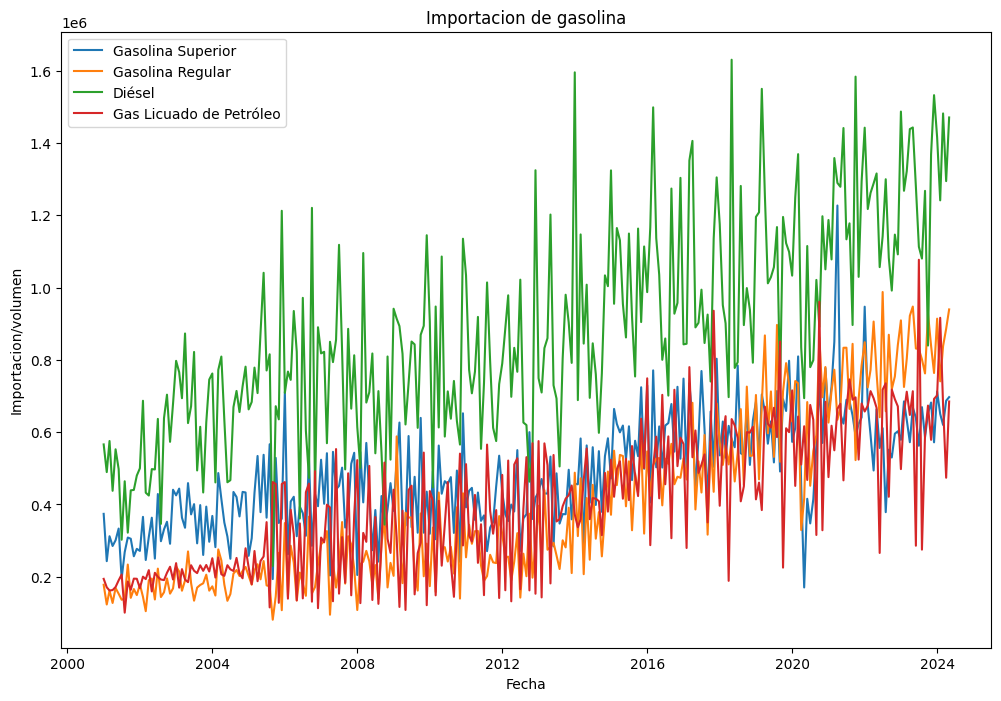

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


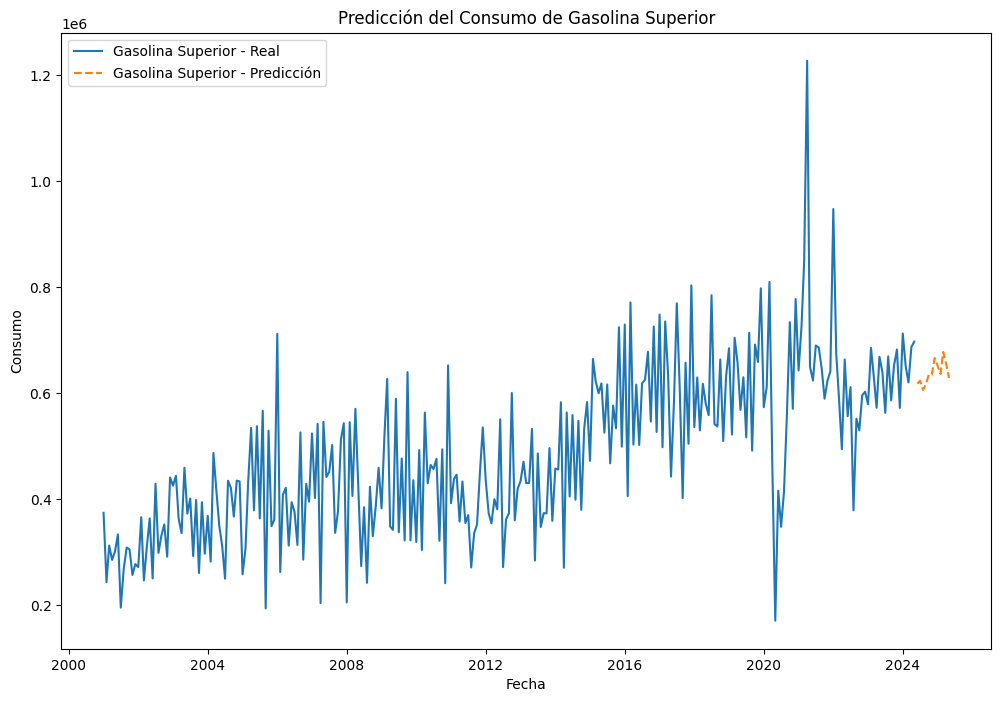

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ruta al archivo .xlsx
file_path = './importacion_gas.xlsx'

# Leer el archivo .xlsx en un DataFrame
df = pd.read_excel(file_path)

# Convertir la columna 'Fecha' a un índice de tipo fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b/%Y')
df.set_index('Fecha', inplace=True)

# Visualizar los datos
print(df.head())

# Crear una serie de tiempo para cada tipo de combustible
series_gasolina_super = df['Gasolina superior']
series_gasolina_regular = df['Gasolina regular']
series_diesel = df[['Diesel alto azufre', 'Diesel bajo azufre', 'Diesel ultra bajo azufre']].sum(axis=1)
series_gas_licuado = df['Gas licuado de petróleo']

# Graficar las series de tiempo
plt.figure(figsize=(12, 8))
plt.plot(series_gasolina_super, label='Gasolina Superior')
plt.plot(series_gasolina_regular, label='Gasolina Regular')
plt.plot(series_diesel, label='Diésel')
plt.plot(series_gas_licuado, label='Gas Licuado de Petróleo')
plt.legend()
plt.title('Importacion de gasolina')
plt.xlabel('Fecha')
plt.ylabel('Importacion/volumen')
plt.show()

# Estimar precios utilizando Holt-Winters Exponential Smoothing
model_gasolina_super = ExponentialSmoothing(series_gasolina_super, seasonal='add', seasonal_periods=12).fit()
pred_gasolina_super = model_gasolina_super.forecast(12)

# Graficar las predicciones
plt.figure(figsize=(12, 8))
plt.plot(series_gasolina_super, label='Gasolina Superior - Real')
plt.plot(pred_gasolina_super, label='Gasolina Superior - Predicción', linestyle='--')
plt.legend()
plt.title('Predicción del Consumo de Gasolina Superior')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.show()

In [63]:
info_gasolina_super = serie_info(series_gasolina_super)
info_gasolina_regular = serie_info(series_gasolina_regular)
info_diesel = serie_info(series_diesel)
info_gas_licuado = serie_info(series_gas_licuado)


# Mostrar la información
print("Gasolina Superior:")
print(f"Inicio: {info_gasolina_super[0]}")
print(f"Fin: {info_gasolina_super[1]}")
print(f"Frecuencia: {info_gasolina_super[2]}")

print("\nGasolina Regular:")
print(f"Inicio: {info_gasolina_regular[0]}")
print(f"Fin: {info_gasolina_regular[1]}")
print(f"Frecuencia: {info_gasolina_regular[2]}")

print("\nDiésel:")
print(f"Inicio: {info_diesel[0]}")
print(f"Fin: {info_diesel[1]}")
print(f"Frecuencia: {info_diesel[2]}")

print("\nGas Licuado:")
print(f"Inicio: {info_gas_licuado[0]}")
print(f"Fin: {info_gas_licuado[1]}")
print(f"Frecuencia: {info_gas_licuado[2]}")

Gasolina Superior:
Inicio: 2001-01-01 00:00:00
Fin: 2024-05-01 00:00:00
Frecuencia: MS

Gasolina Regular:
Inicio: 2001-01-01 00:00:00
Fin: 2024-05-01 00:00:00
Frecuencia: MS

Diésel:
Inicio: 2001-01-01 00:00:00
Fin: 2024-05-01 00:00:00
Frecuencia: MS

Gas Licuado:
Inicio: 2001-01-01 00:00:00
Fin: 2024-05-01 00:00:00
Frecuencia: MS


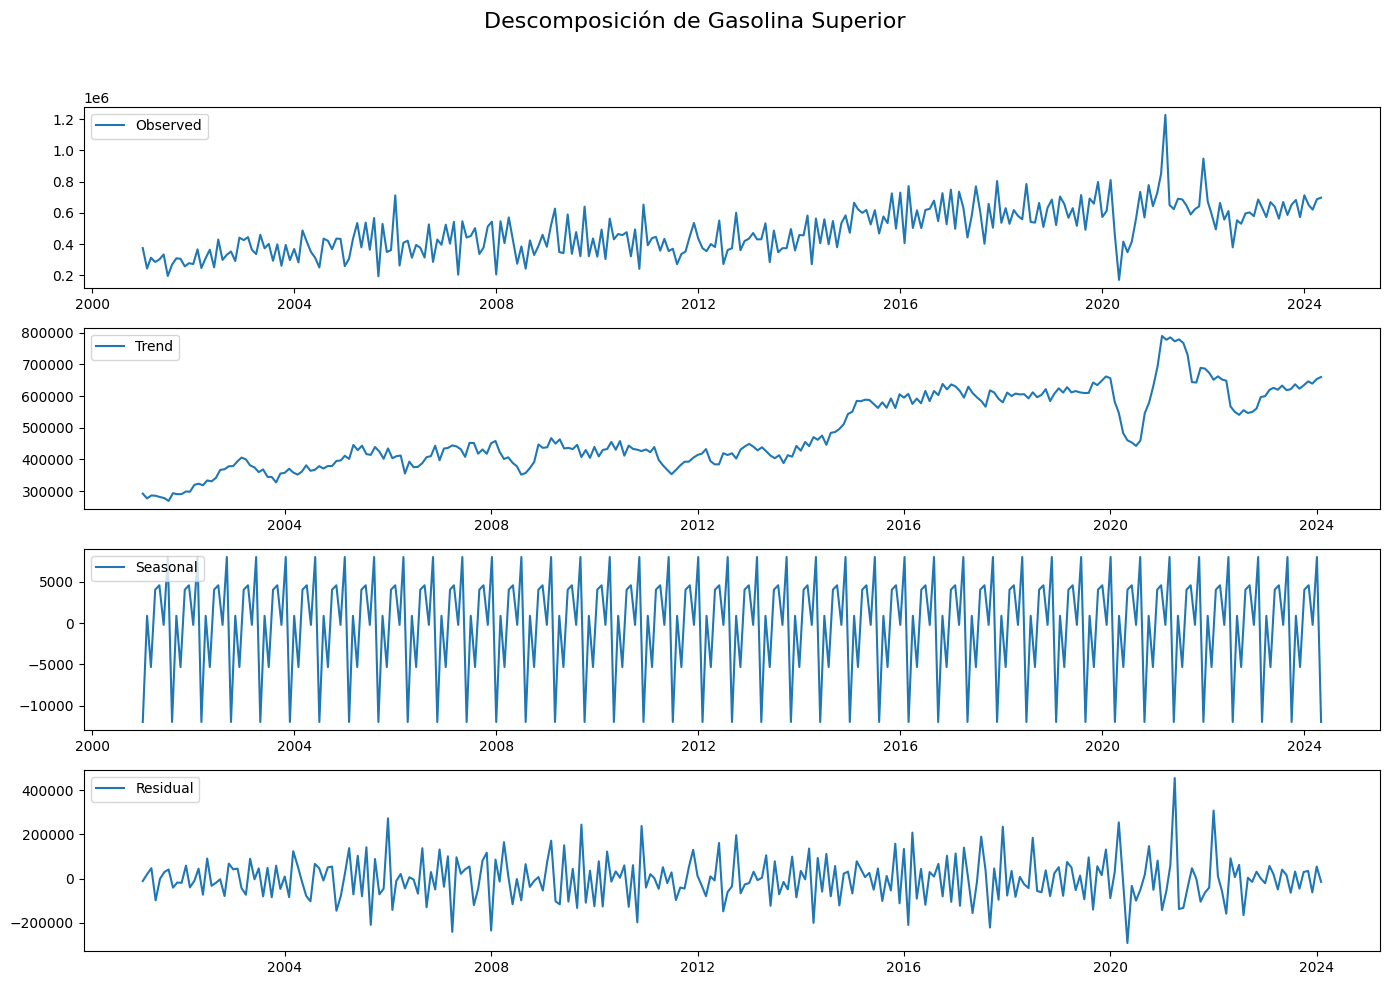

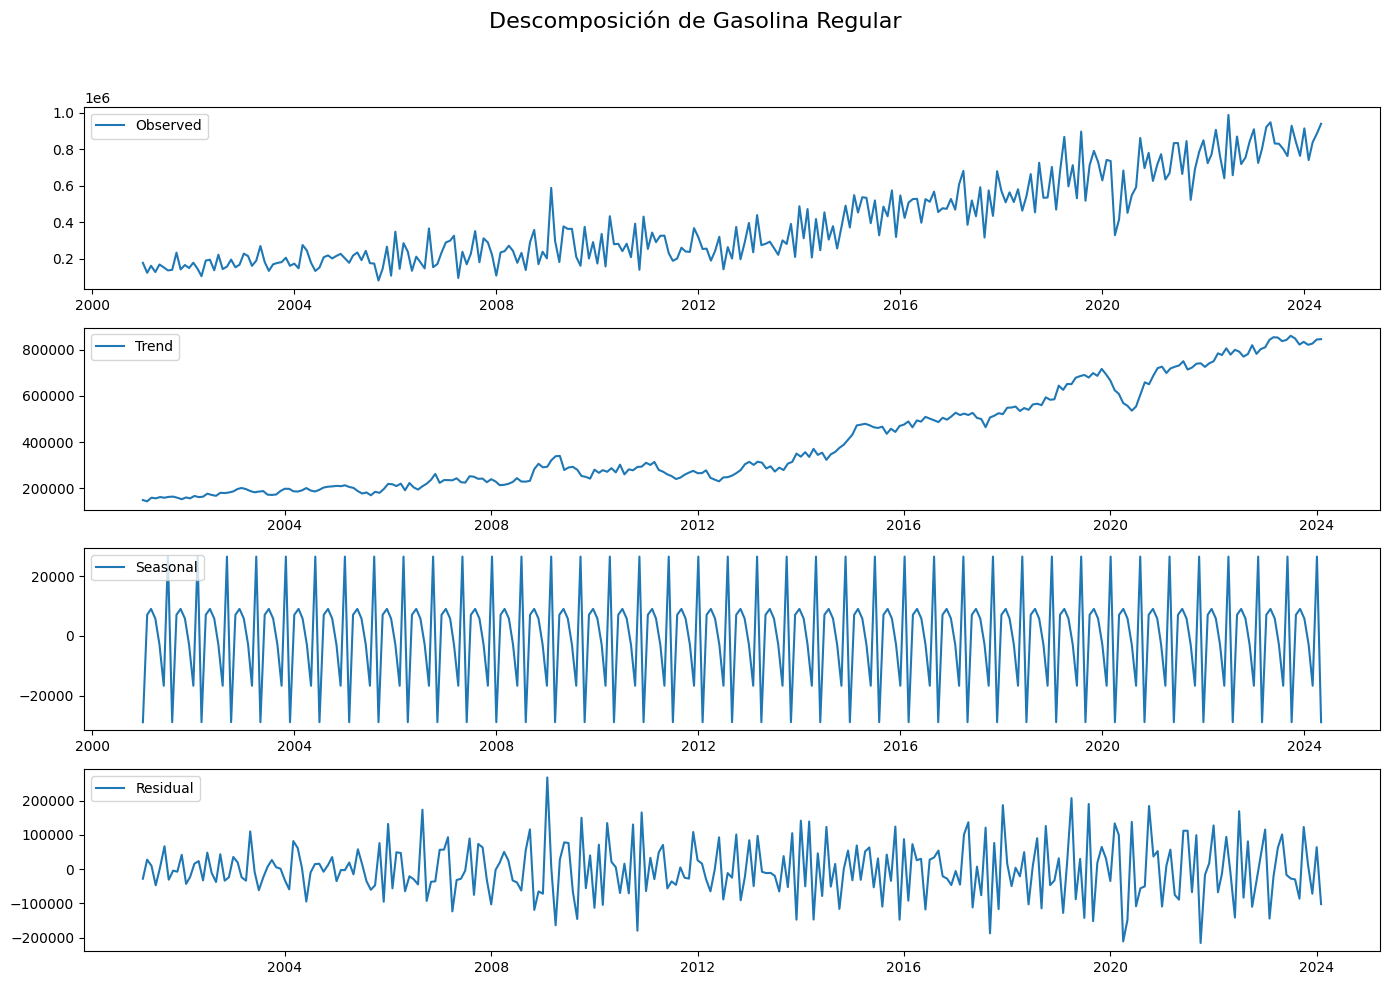

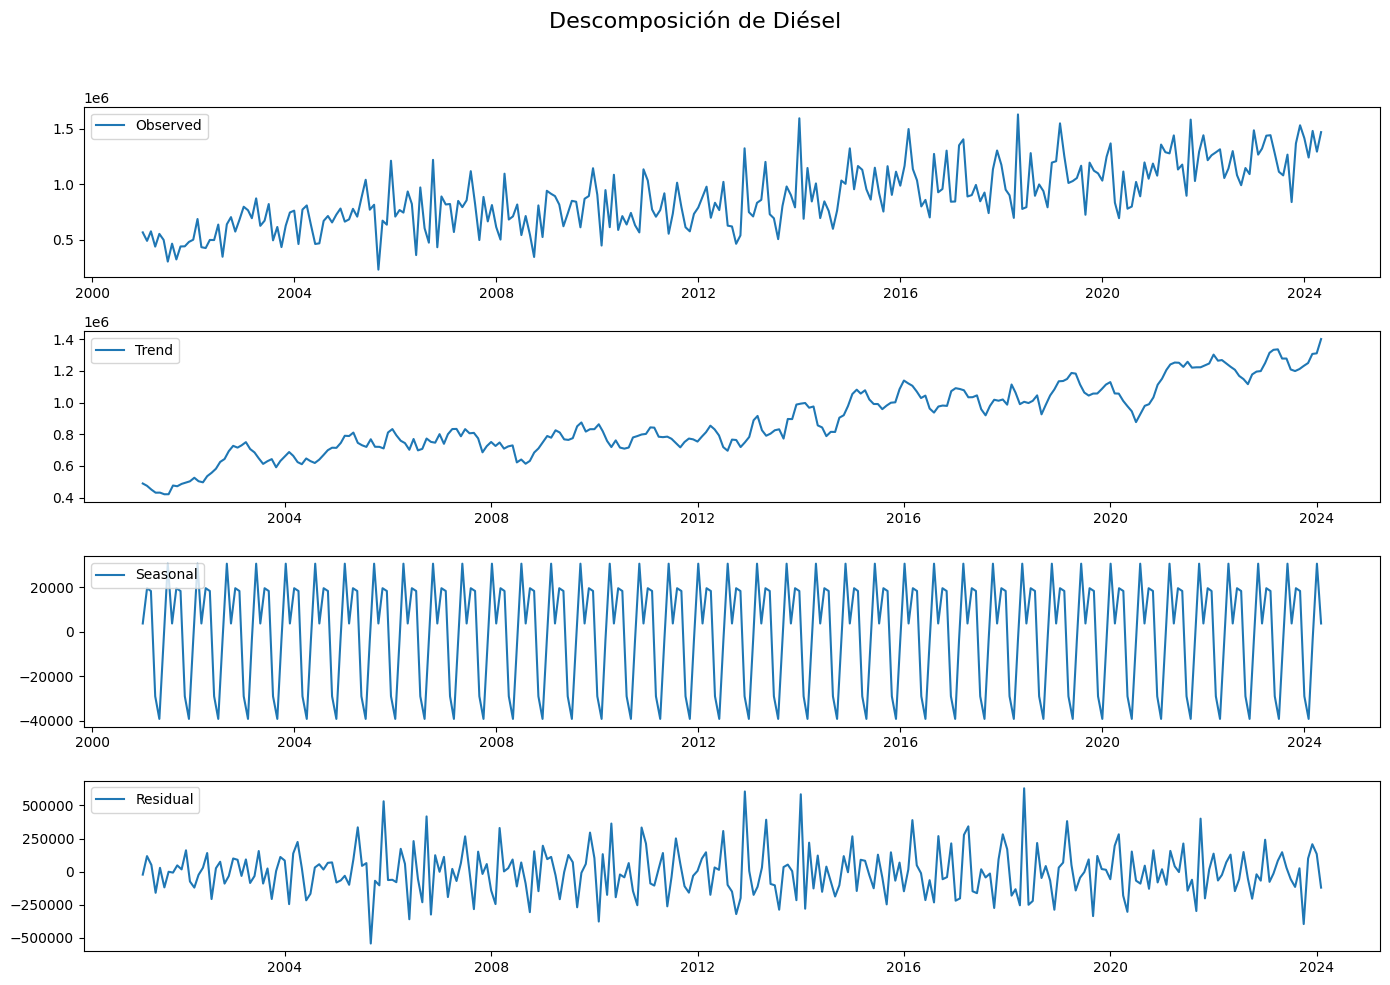

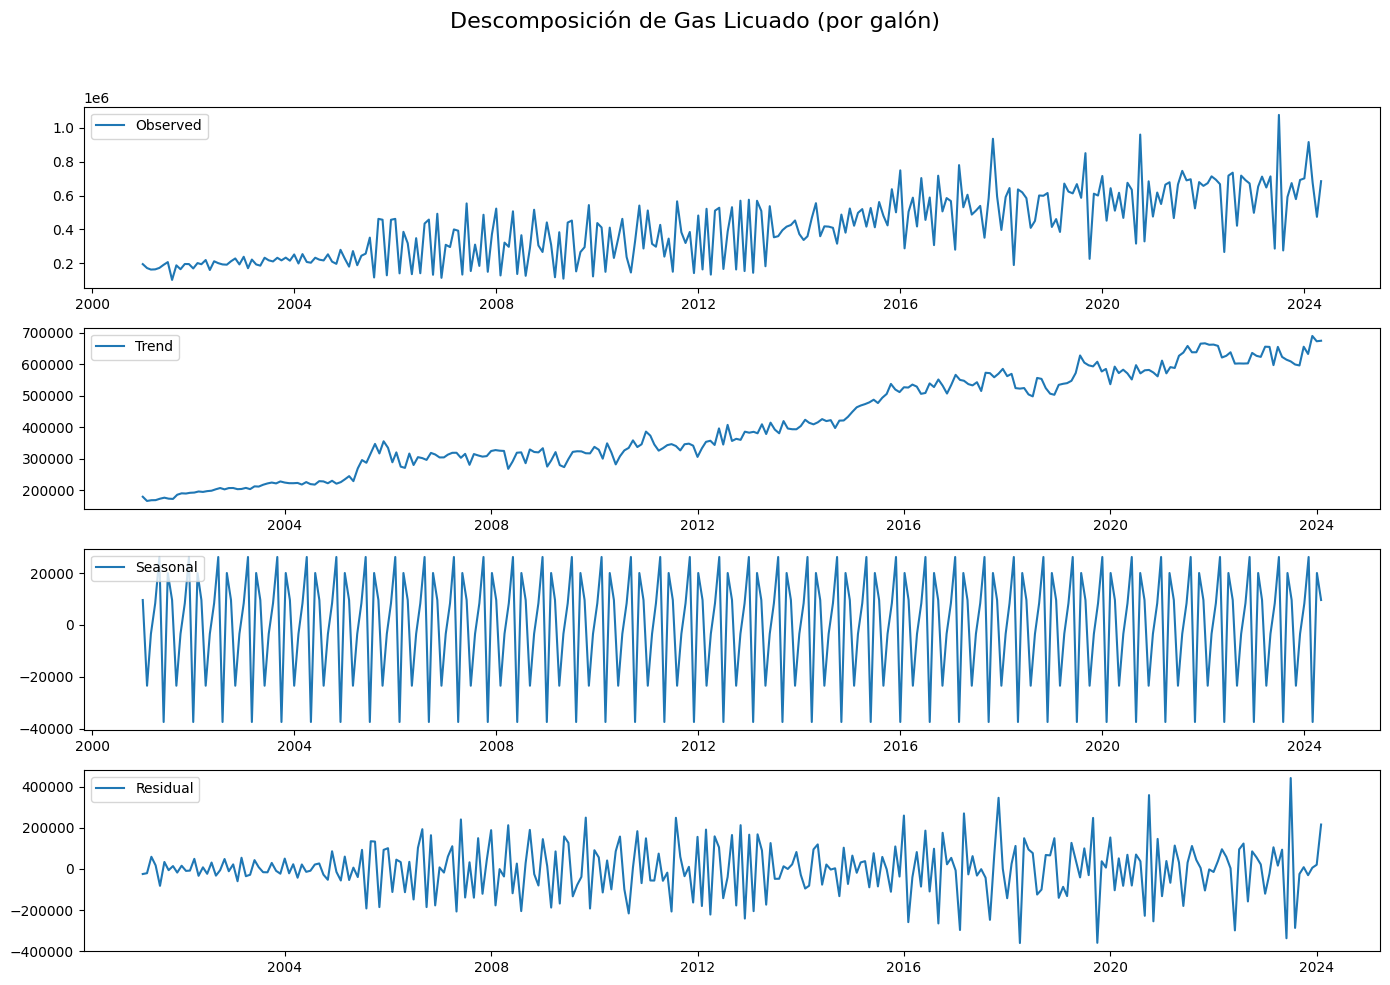

In [64]:
# Realizar la descomposición de la serie para cada tipo de combustible
decomposed_super = seasonal_decompose(series_gasolina_super, model='additive', period=7)
decomposed_regular = seasonal_decompose(series_gasolina_regular, model='additive', period=7)
decomposed_diesel = seasonal_decompose(series_diesel, model='additive', period=7)
decomposed_gas_licuado = seasonal_decompose(series_gas_licuado, model='additive', period=7)


# Graficar la descomposición para cada serie
plot_decomposition(decomposed_super, 'Descomposición de Gasolina Superior')
plot_decomposition(decomposed_regular, 'Descomposición de Gasolina Regular')
plot_decomposition(decomposed_diesel, 'Descomposición de Diésel')
plot_decomposition(decomposed_gas_licuado, 'Descomposición de Gas Licuado (por galón)')

In [65]:
# Prueba de Dickey-Fuller para la serie diferenciada
result_super = adfuller(series_gasolina_super.dropna())
result_regular = adfuller(series_gasolina_regular.dropna())
result_diesel = adfuller(series_diesel.dropna())
result_gas_licuado = adfuller(series_gas_licuado.dropna())

print("ADF Statistic (Gasolina Superior):", result_super[0])
print("p-value (Gasolina Superior):", result_super[1])
print("ADF Statistic (Gasolina Regular):", result_regular[0])
print("p-value (Gasolina Regular):", result_regular[1])
print("ADF Statistic (Diesel):", result_diesel[0])
print("p-value (Diesel):", result_diesel[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado[0])
print("p-value (Gas Licuado):", result_gas_licuado[1])

ADF Statistic (Gasolina Superior): -2.932952845797836
p-value (Gasolina Superior): 0.04164803728027597
ADF Statistic (Gasolina Regular): 0.8288289928204932
p-value (Gasolina Regular): 0.9920875541106331
ADF Statistic (Diesel): -0.8143723795874924
p-value (Diesel): 0.8148637920664306
ADF Statistic (Gas Licuado): -0.40230602414006567
p-value (Gas Licuado): 0.9097130413332869


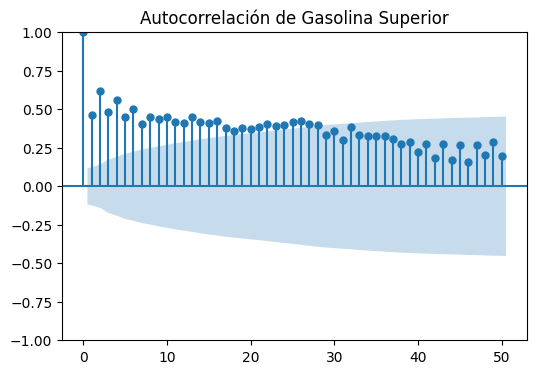

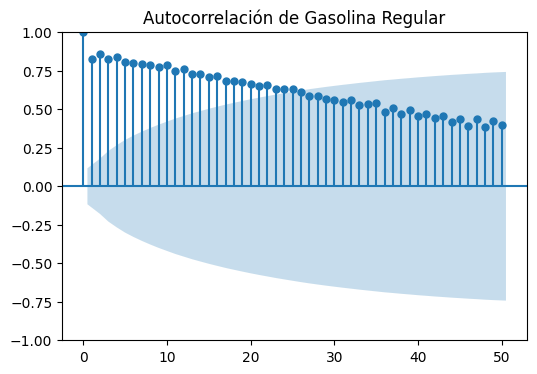

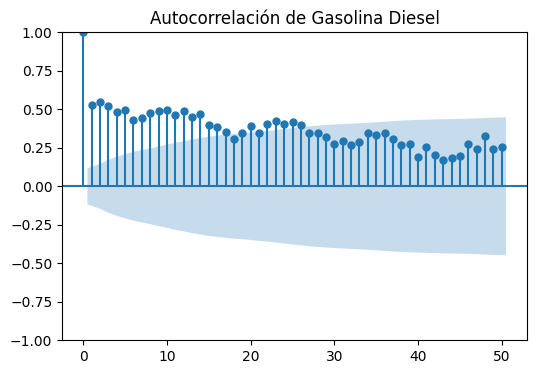

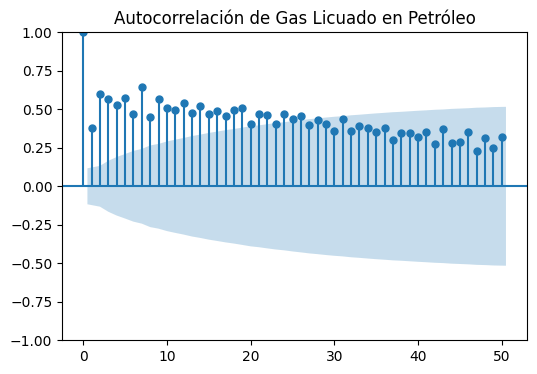

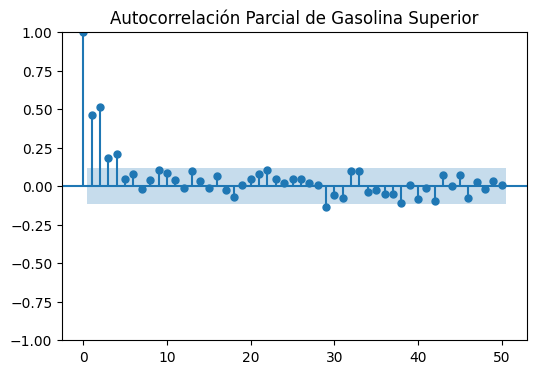

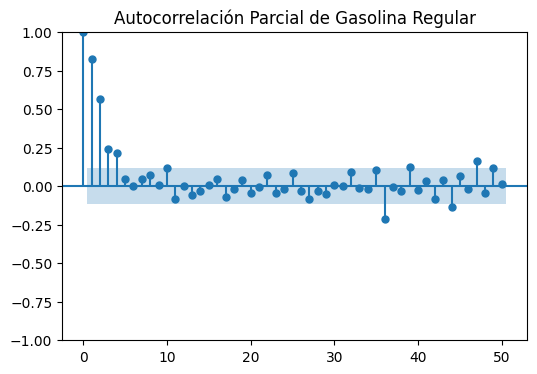

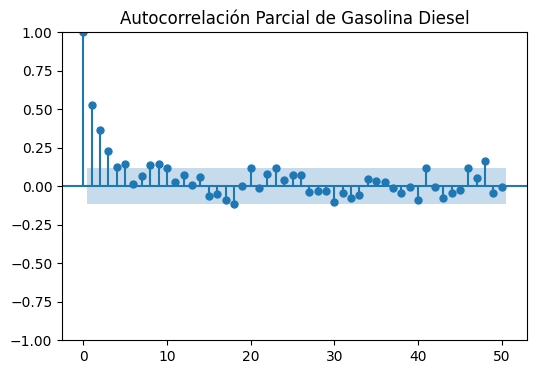

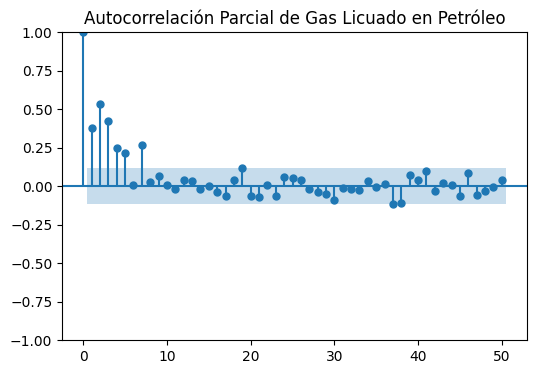

In [66]:
# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_super.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_regular.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_diesel.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gas_licuado.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gas Licuado en Petróleo')
plt.show()

# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_super.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_regular.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_diesel.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gas_licuado.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gas Licuado en Petróleo')
plt.show()

In [67]:
series_regular_diff = series_gasolina_regular.diff().dropna()
series_diesel_diff = series_diesel.diff().dropna()
series_gas_licuado_diff = series_gas_licuado.diff().dropna()

# Prueba de Dickey-Fuller para la serie diferenciada
result_regular_diff = adfuller(series_regular_diff.dropna())
result_diesel_diff = adfuller(series_diesel_diff.dropna())
result_gas_licuado_diff = adfuller(series_gas_licuado_diff.dropna())

print("ADF Statistic (Gasolina Superior):", result_super[0])
print("p-value (Gasolina Superior):", result_super[1])
print("ADF Statistic (Gasolina Regular):", result_regular_diff[0])
print("p-value (Gasolina Regular):", result_regular_diff[1])
print("ADF Statistic (Diesel):", result_diesel_diff[0])
print("p-value (Diesel):", result_diesel_diff[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado_diff[0])
print("p-value (Gas Licuado):", result_gas_licuado_diff[1])

ADF Statistic (Gasolina Superior): -2.932952845797836
p-value (Gasolina Superior): 0.04164803728027597
ADF Statistic (Gasolina Regular): -10.111097641346
p-value (Gasolina Regular): 9.99858472741457e-18
ADF Statistic (Diesel): -8.951085512668515
p-value (Diesel): 8.720099018219338e-15
ADF Statistic (Gas Licuado): -8.476967328370957
p-value (Gas Licuado): 1.4267598049914574e-13


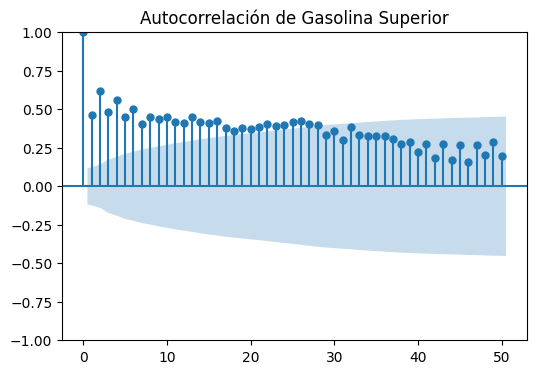

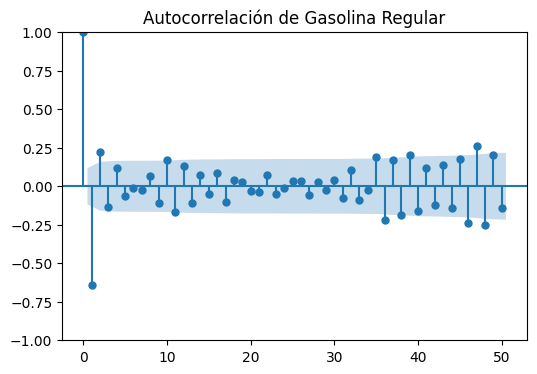

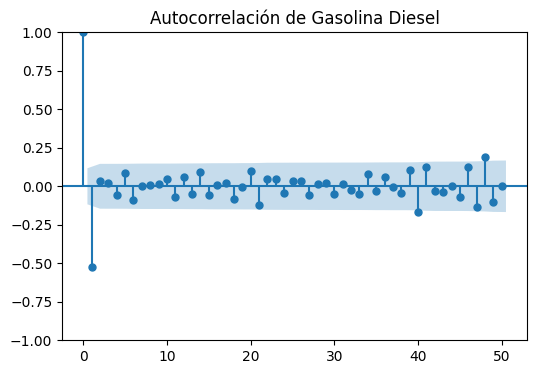

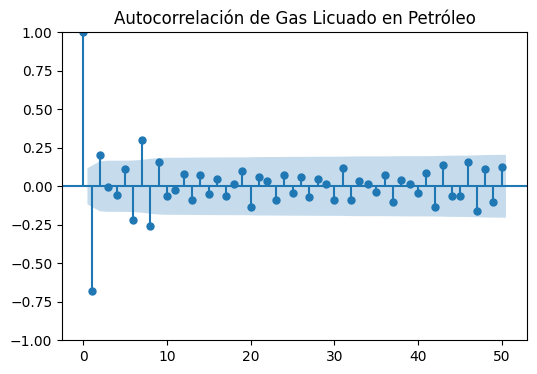

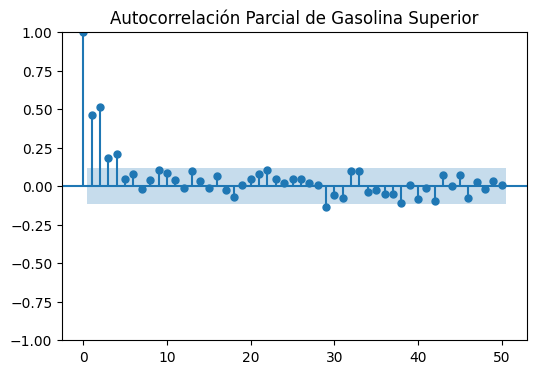

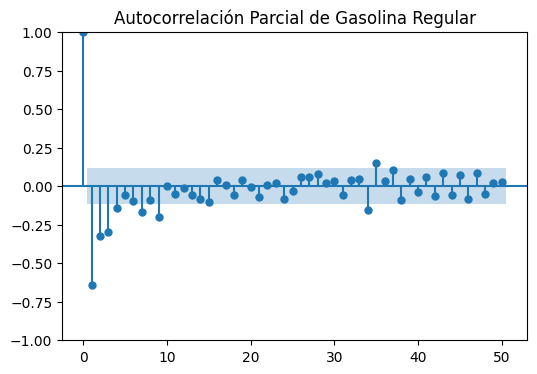

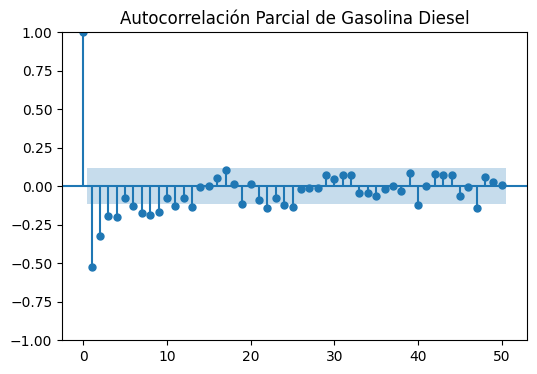

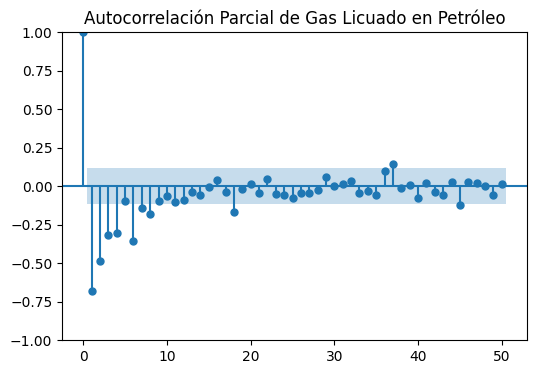

In [72]:
# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_super.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_regular_diff.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_diesel_diff.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gas_licuado_diff.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gas Licuado en Petróleo')
plt.show()

# Graficar autocorrelación parcial
plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_super.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_regular_diff.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_diesel_diff.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gas_licuado_diff.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gas Licuado en Petróleo')
plt.show()

In [73]:
model_super = auto_arima(series_gasolina_super, seasonal=True, m=12)
print(model_super.summary())

model_regular = auto_arima(series_regular_diff, seasonal=True, m=12)
print(model_regular.summary())

model_diesel = auto_arima(series_diesel_diff, seasonal=True, m=12)
print(model_diesel.summary())

model_gas_licuado = auto_arima(series_gas_licuado_diff, seasonal=True, m=12)
print(model_gas_licuado.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3644.978
Date:                Thu, 01 Aug 2024   AIC                           7297.957
Time:                        21:54:43   BIC                           7312.496
Sample:                    01-01-2001   HQIC                          7303.788
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0768      0.062     -1.234      0.217      -0.199       0.045
ar.L2          0.2277      0.072      3.164      0.002       0.087       0.369
ma.L1         -0.9054      0.041    -22.105      0.0

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Local

AIC: 7297.956632243461
BIC: 7312.4957906561385


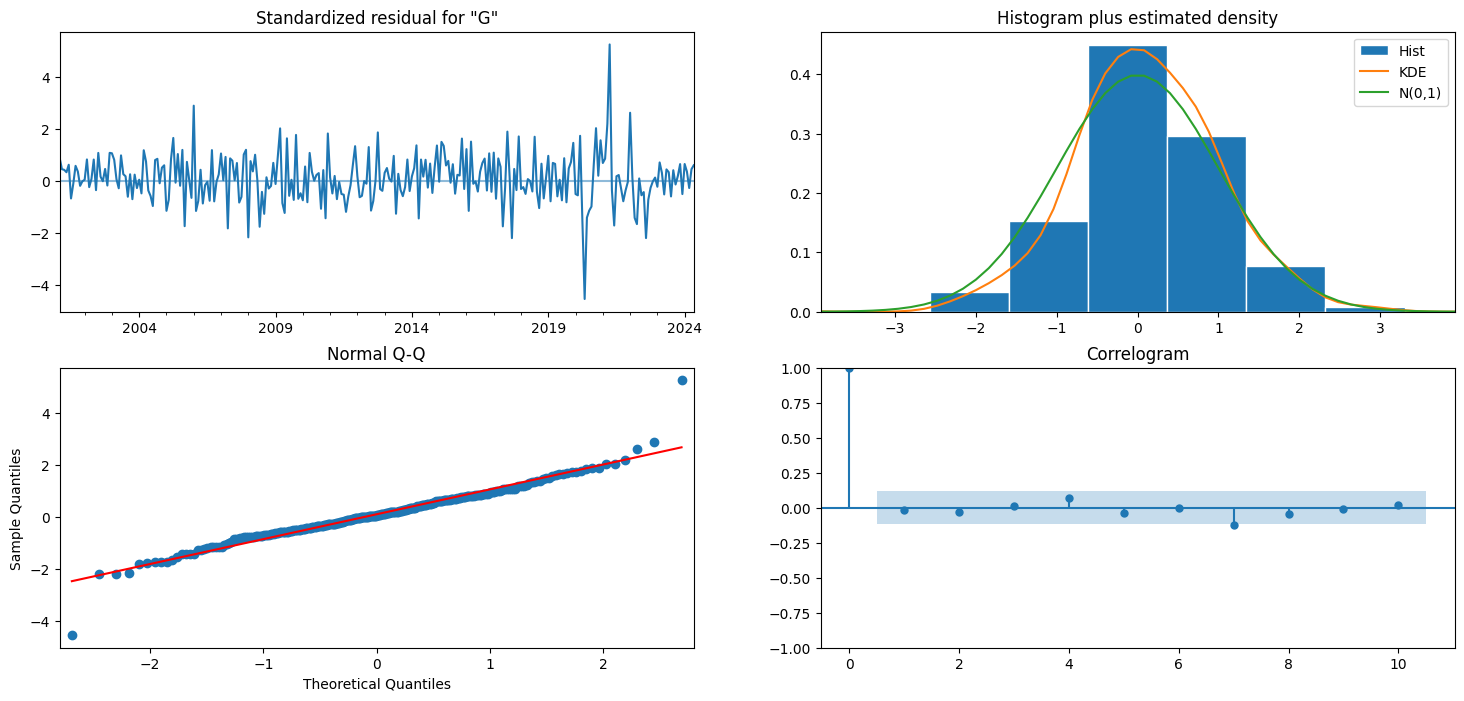

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AIC: 7188.281093759757
BIC: 7210.089831378772


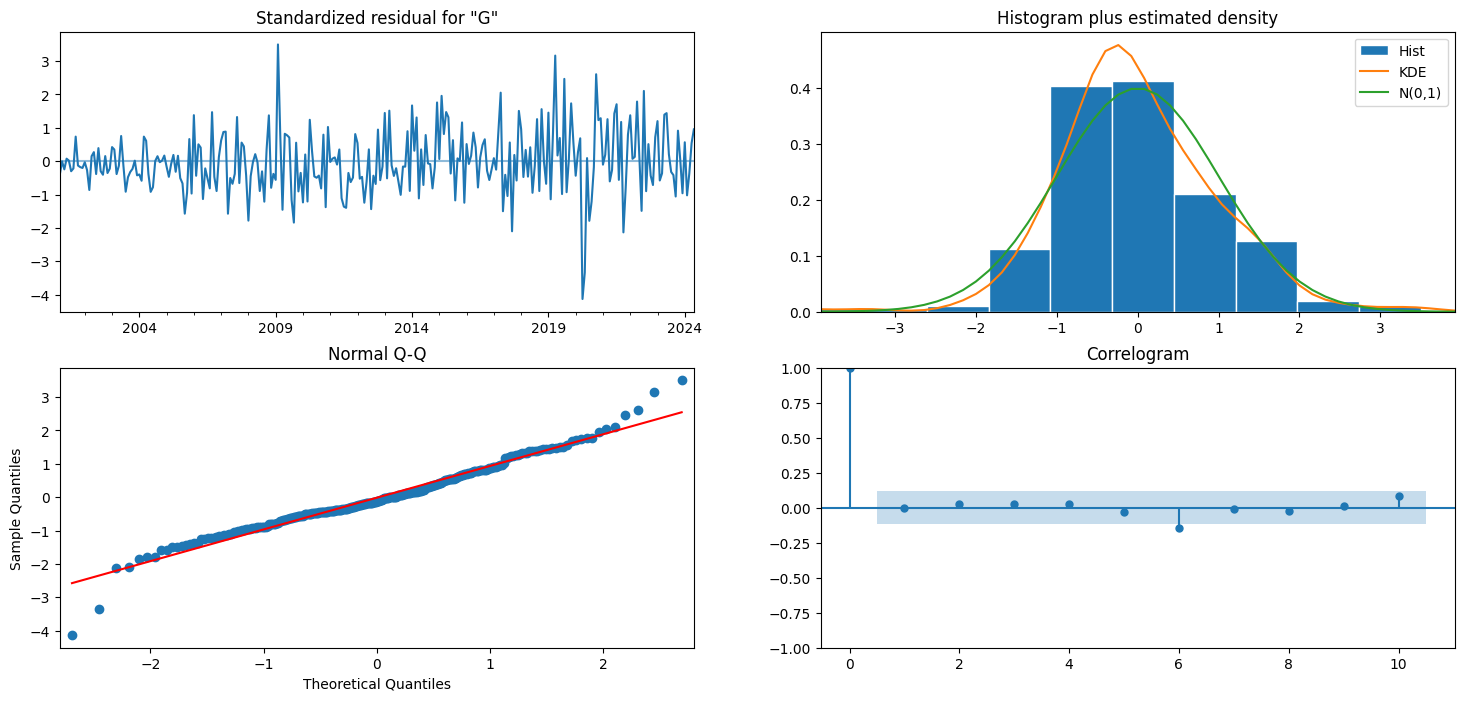

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AIC: 7643.460410752782
BIC: 7654.36477956229


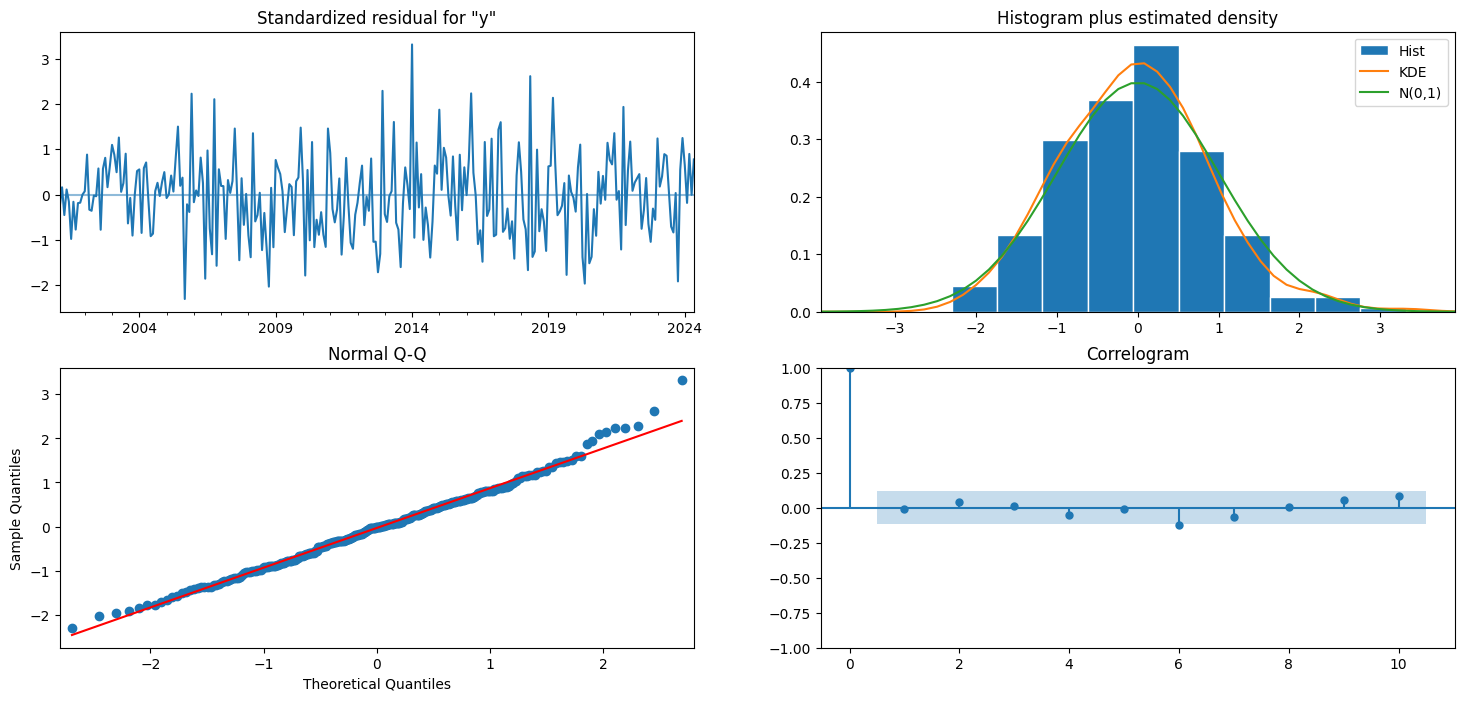

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AIC: 7348.386562986854
BIC: 7366.560511002701


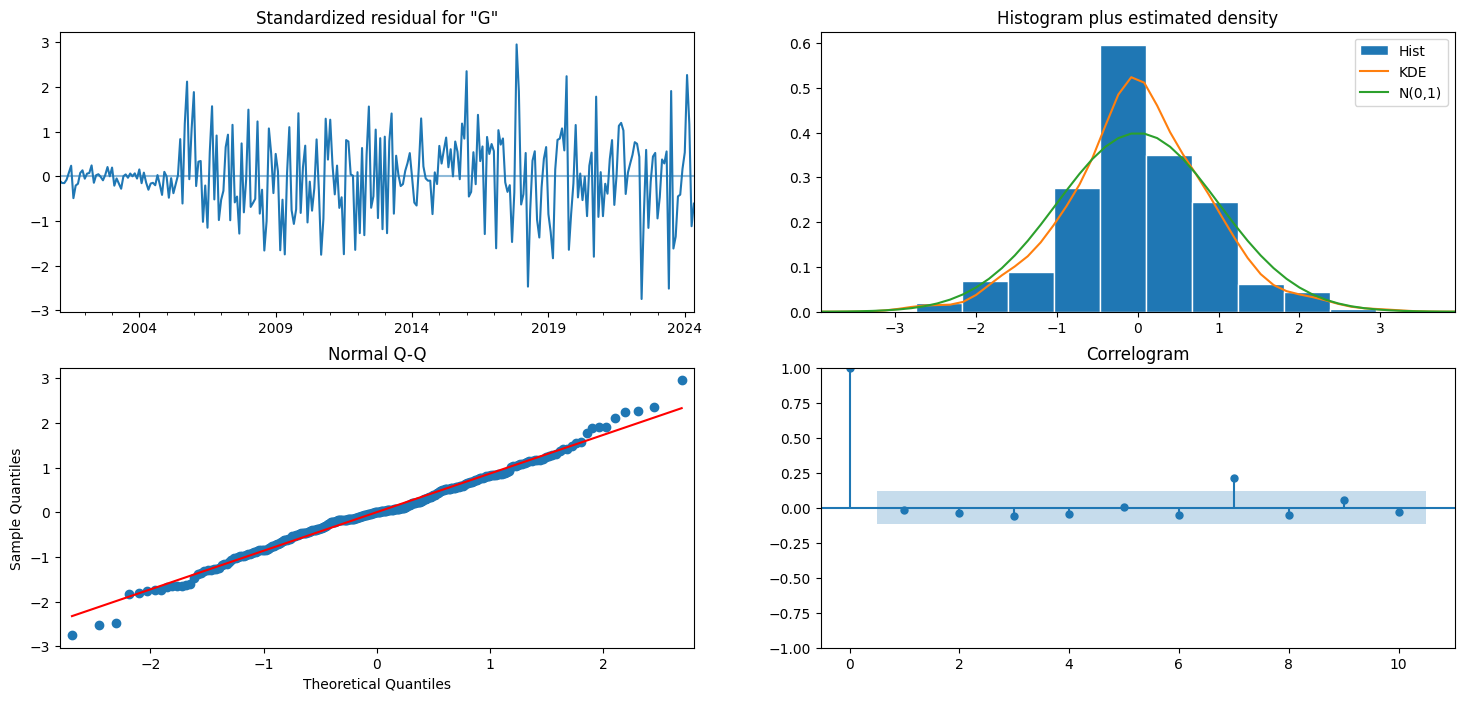

In [75]:
model_super_ARIMA = ARIMA(series_gasolina_super, order=(2, 1, 1))
model_fit_super = model_super_ARIMA.fit()
print('AIC:', model_fit_super.aic)
print('BIC:', model_fit_super.bic)

model_fit_super.plot_diagnostics(figsize=(18, 8))
plt.show()

model_regular_ARIMA = ARIMA(series_regular_diff, order=(2, 0, 2))
model_fit_regular = model_regular_ARIMA.fit()
print('AIC:', model_fit_regular.aic)
print('BIC:', model_fit_regular.bic)

model_fit_regular.plot_diagnostics(figsize=(18, 8))
plt.show()

model_diesel_ARIMA = ARIMA(series_diesel_diff, order=(0, 0, 1))
model_fit_diesel = model_diesel_ARIMA.fit()
print('AIC:', model_fit_diesel.aic)
print('BIC:', model_fit_diesel.bic)

model_fit_diesel.plot_diagnostics(figsize=(18, 8))
plt.show()

model_gas_licuado_ARIMA = ARIMA(series_gas_licuado_diff, order=(2, 0, 1))
model_fit_gas_licuado = model_gas_licuado_ARIMA.fit()
print('AIC:', model_fit_gas_licuado.aic)
print('BIC:', model_fit_gas_licuado.bic)

model_fit_gas_licuado.plot_diagnostics(figsize=(18, 8))
plt.show()

22:33:43 - cmdstanpy - INFO - Chain [1] start processing
22:33:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:

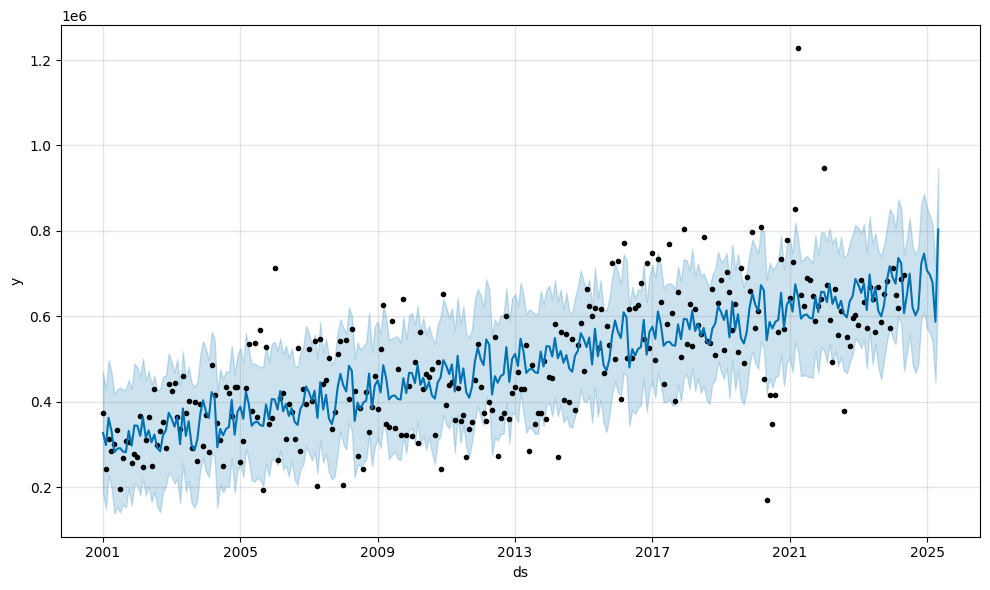

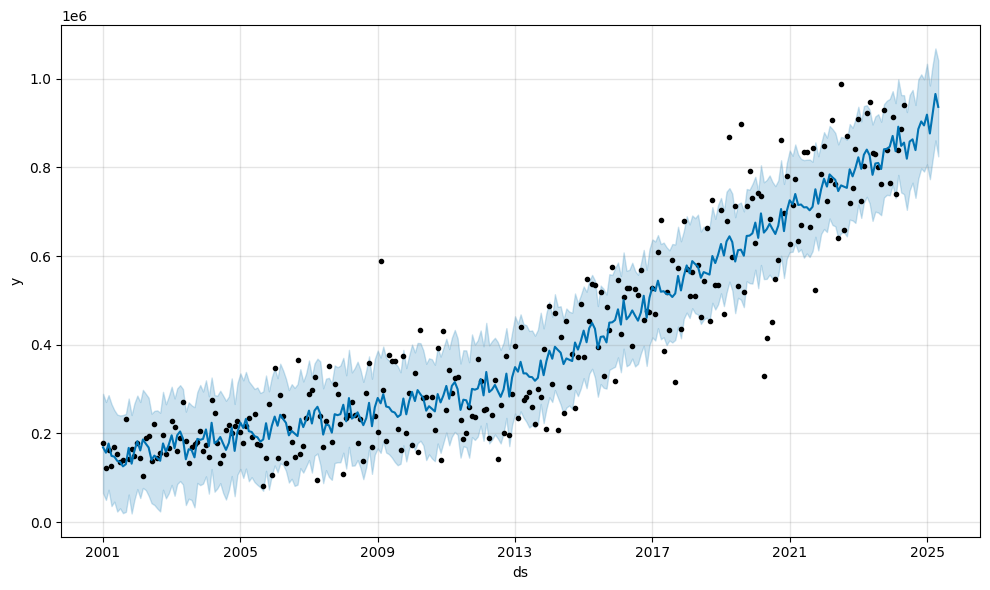

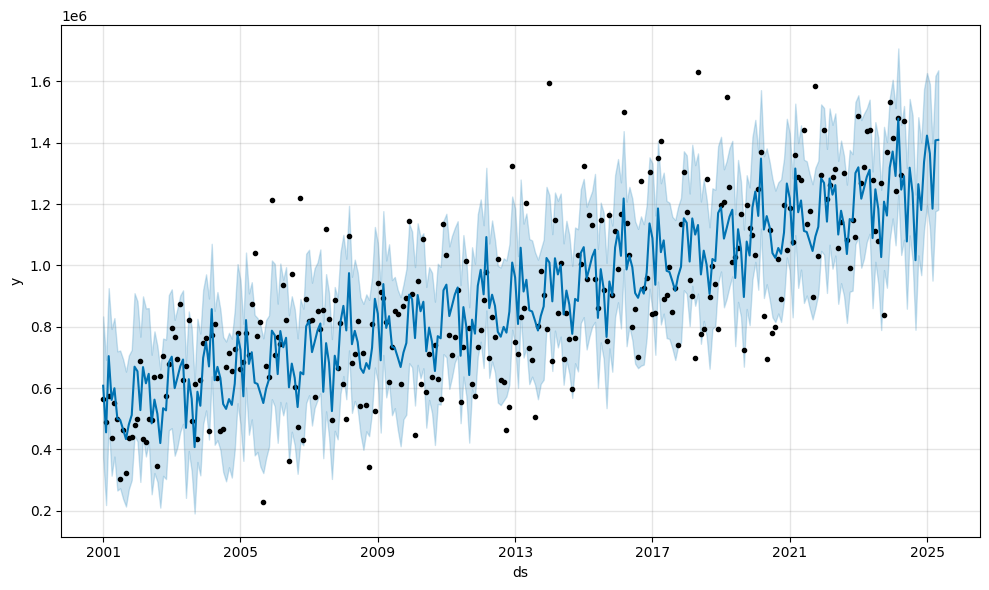

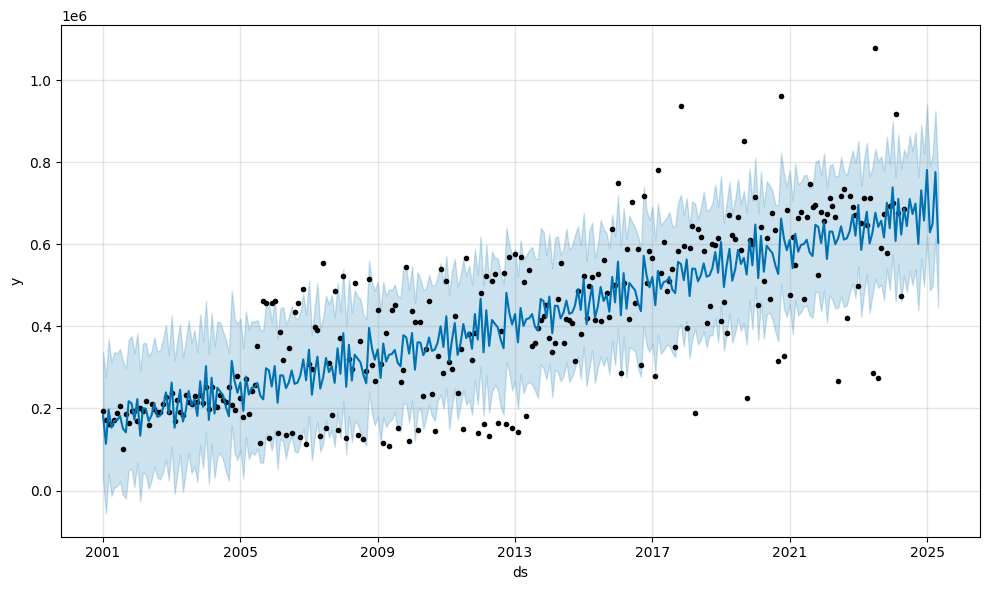

In [76]:
series_gasolina_super_prophet = series_gasolina_super.reset_index()
series_gasolina_super_prophet.columns = ['ds', 'y']

model_super_prophet = Prophet()
model_super_prophet.fit(series_gasolina_super_prophet)
future = model_super_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_super_prophet.predict(future)

fig = model_super_prophet.plot(forecast)

series_gasolina_regular_prophet = series_gasolina_regular.reset_index()
series_gasolina_regular_prophet.columns = ['ds', 'y']

model_regular_prophet = Prophet()
model_regular_prophet.fit(series_gasolina_regular_prophet)
future = model_regular_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_regular_prophet.predict(future)

fig = model_regular_prophet.plot(forecast)

series_diesel_prophet = series_diesel.reset_index()
series_diesel_prophet.columns = ['ds', 'y']

model_diesel_prophet = Prophet()
model_diesel_prophet.fit(series_diesel_prophet)
future = model_diesel_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_diesel_prophet.predict(future)

fig = model_diesel_prophet.plot(forecast)

series_gas_licuado_prophet = series_gas_licuado.reset_index()
series_gas_licuado_prophet.columns = ['ds', 'y']

model_gas_licuado_prophet = Prophet()
model_gas_licuado_prophet.fit(series_gas_licuado_prophet)
future = model_gas_licuado_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_gas_licuado_prophet.predict(future)

fig = model_gas_licuado_prophet.plot(forecast)

series_diesel: FECHA
2021-01-01    17.61
2021-01-02    17.61
2021-01-03    17.61
2021-01-04    17.61
2021-01-05    17.61
              ...  
2024-07-19    28.55
2024-07-20    28.55
2024-07-21    28.55
2024-07-22    28.09
2024-07-23    28.09
Name: Diesel, Length: 1300, dtype: float64
series_gas_licuado: FECHA
2021-01-01    26.928
2021-01-02    26.928
2021-01-03    26.928
2021-01-04    26.928
2021-01-05    26.928
               ...  
2024-07-19    29.920
2024-07-20    29.920
2024-07-21    29.920
2024-07-22    29.920
2024-07-23    29.920
Name: Glp Cilindro 25Lbs., Length: 1300, dtype: float64


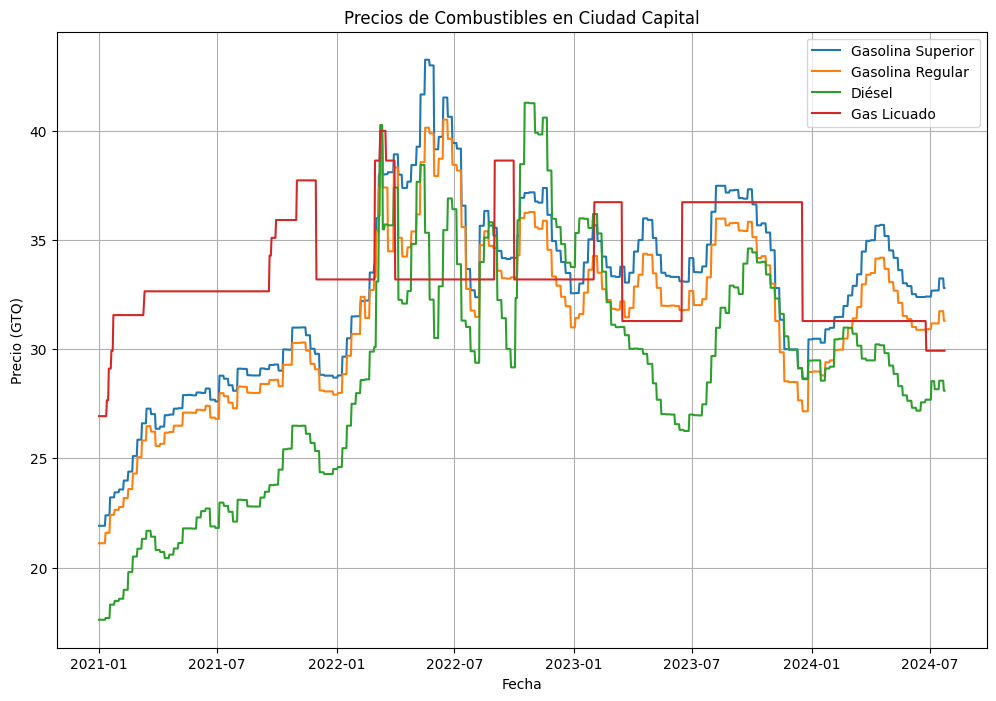

In [77]:
# Ruta al archivo .xlsx
file_path = './precios_gas.xlsx'

# Leer el archivo .xlsx en un DataFrame
df = pd.read_excel(file_path)

# Convertir la columna 'FECHA' a un índice de tipo fecha
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d/%b/%Y')
df.set_index('FECHA', inplace=True)

# Visualizar los primeros registros para verificar la carga
#print(df.head())

# Eliminar filas con fechas NaT
df = df.dropna()

# Convertir las columnas a valores numéricos
df['Superior'] = pd.to_numeric(df['Superior'], errors='coerce')
df['Regular'] = pd.to_numeric(df['Regular'], errors='coerce')
df['Diesel'] = pd.to_numeric(df['Diesel'], errors='coerce')

df['Glp Cilindro 25Lbs.'] = pd.to_numeric(df['Glp Cilindro 25Lbs.'], errors='coerce')

# Realizar la conversión de GLP de precio por cilindro a precio por galón
df['Glp Cilindro 25Lbs.'] = (df['Glp Cilindro 25Lbs.'] / 25) * 6.8

# Crear una serie de tiempo para cada tipo de combustible
series_gasolina_super = df['Superior']
series_gasolina_regular = df['Regular']
series_diesel = df['Diesel']
series_gas_licuado = df['Glp Cilindro 25Lbs.']

# Graficar las series de tiempo
plt.figure(figsize=(12, 8))
plt.plot(series_gasolina_super, label='Gasolina Superior')
plt.plot(series_gasolina_regular, label='Gasolina Regular')
plt.plot(series_diesel, label='Diésel')
print(f"series_diesel: {series_diesel}")
print(f"series_gas_licuado: {series_gas_licuado}")
plt.plot(series_gas_licuado, label='Gas Licuado')

plt.legend()
plt.title('Precios de Combustibles en Ciudad Capital')
plt.xlabel('Fecha')
plt.ylabel('Precio (GTQ)')
plt.grid(True)
plt.show()

In [78]:
# Obtener la información de cada serie
info_gasolina_super = serie_info(series_gasolina_super)
info_gasolina_regular = serie_info(series_gasolina_regular)
info_diesel = serie_info(series_diesel)
info_gas_licuado = serie_info(series_gas_licuado)


# Mostrar la información
print("Gasolina Superior:")
print(f"Inicio: {info_gasolina_super[0]}")
print(f"Fin: {info_gasolina_super[1]}")
print(f"Frecuencia: {info_gasolina_super[2]}")

print("\nGasolina Regular:")
print(f"Inicio: {info_gasolina_regular[0]}")
print(f"Fin: {info_gasolina_regular[1]}")
print(f"Frecuencia: {info_gasolina_regular[2]}")

print("\nDiésel:")
print(f"Inicio: {info_diesel[0]}")
print(f"Fin: {info_diesel[1]}")
print(f"Frecuencia: {info_diesel[2]}")

print("\nGas Licuado:")
print(f"Inicio: {info_gas_licuado[0]}")
print(f"Fin: {info_gas_licuado[1]}")
print(f"Frecuencia: {info_gas_licuado[2]}")

Gasolina Superior:
Inicio: 2021-01-01 00:00:00
Fin: 2024-07-23 00:00:00
Frecuencia: D

Gasolina Regular:
Inicio: 2021-01-01 00:00:00
Fin: 2024-07-23 00:00:00
Frecuencia: D

Diésel:
Inicio: 2021-01-01 00:00:00
Fin: 2024-07-23 00:00:00
Frecuencia: D

Gas Licuado:
Inicio: 2021-01-01 00:00:00
Fin: 2024-07-23 00:00:00
Frecuencia: D


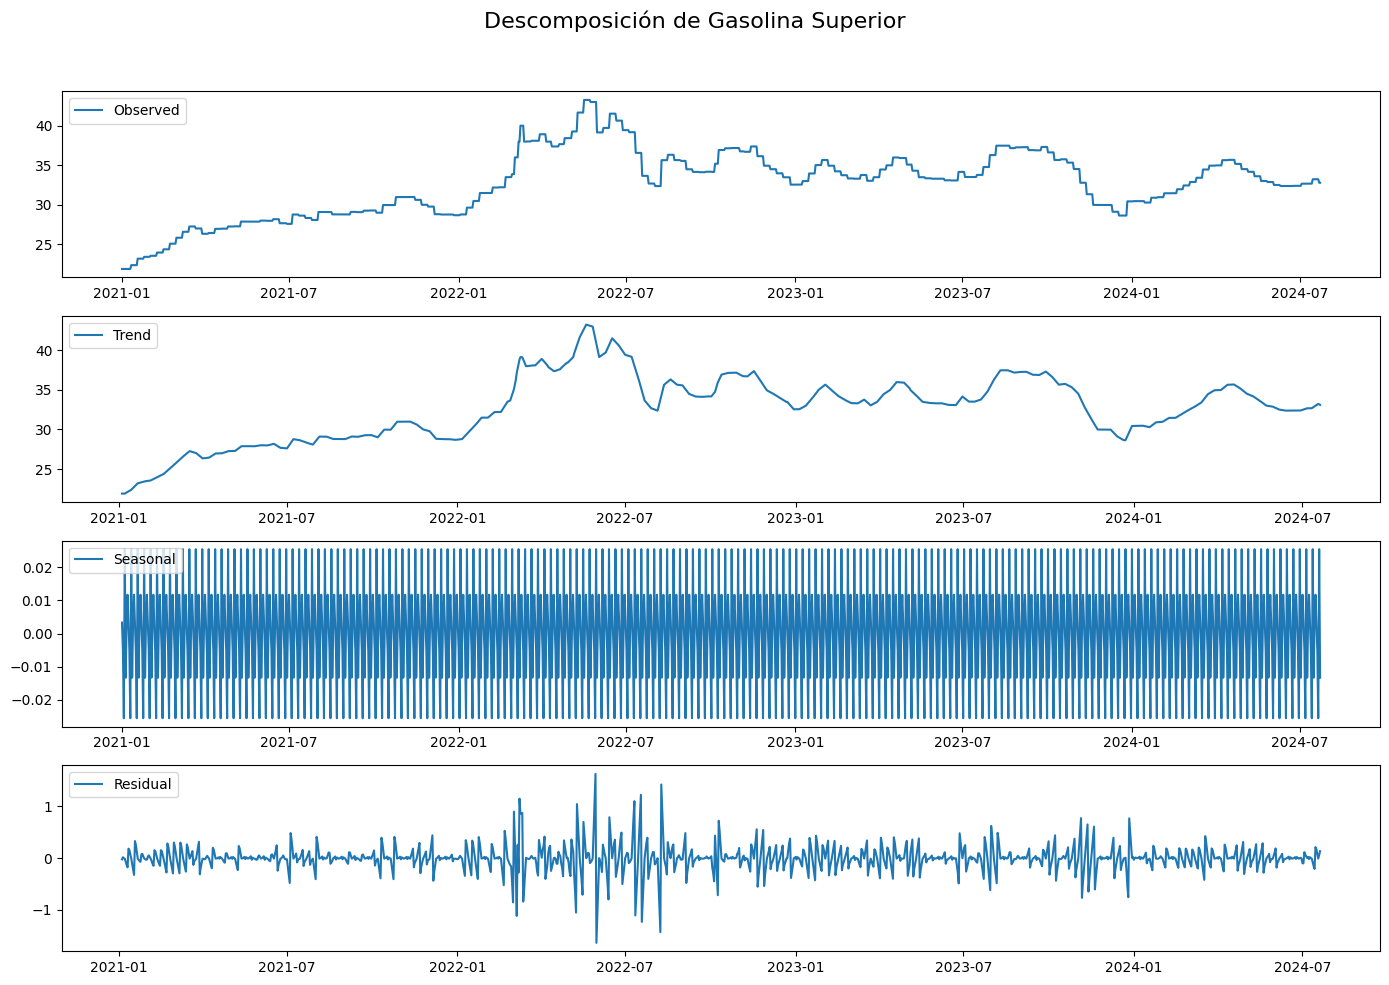

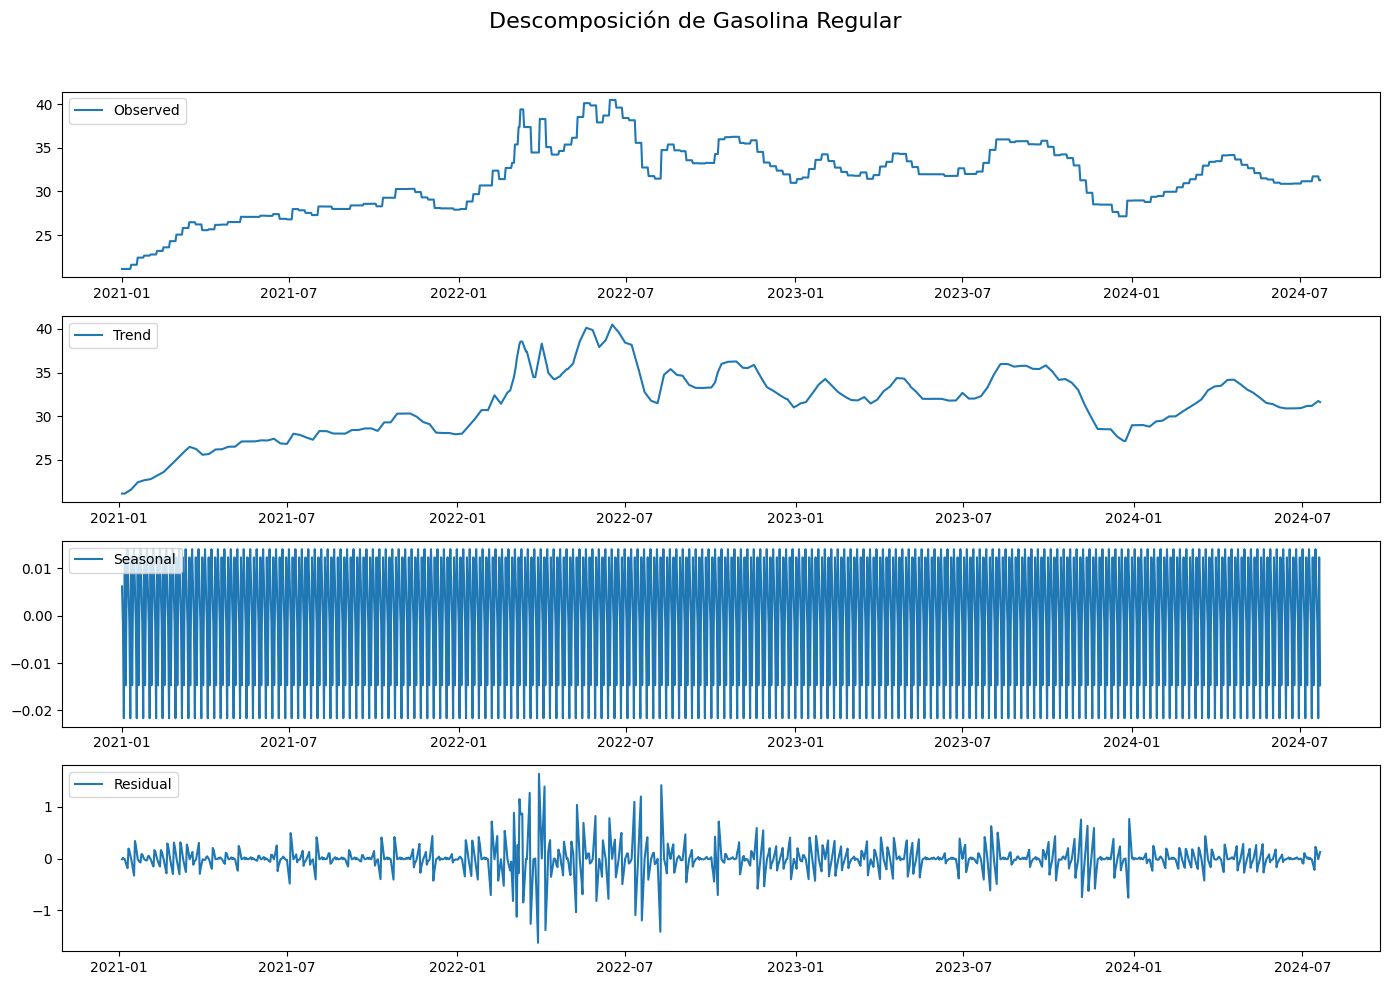

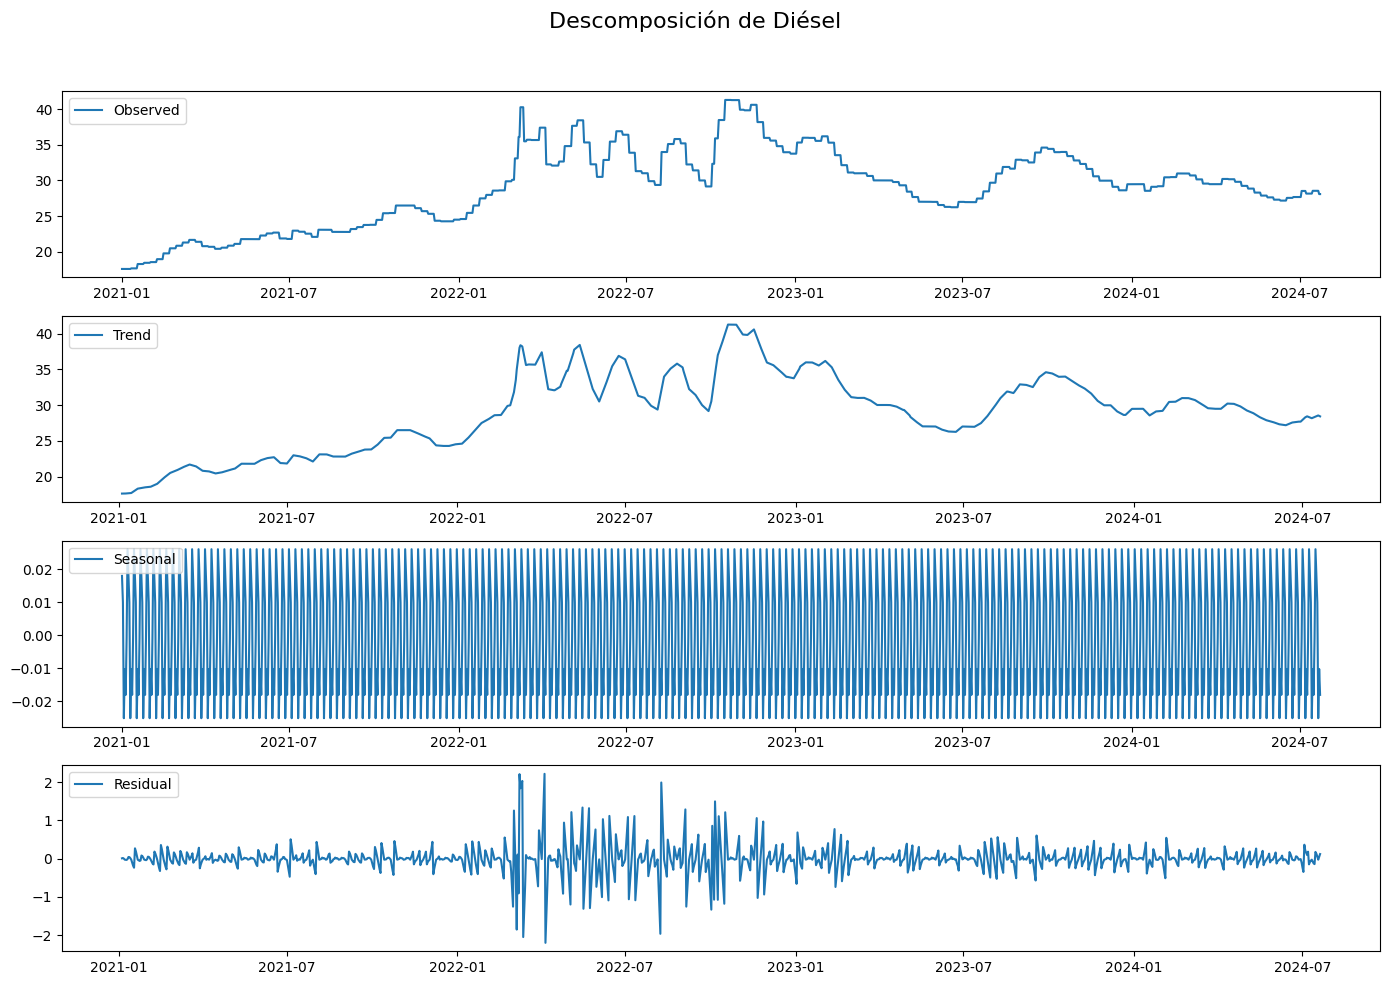

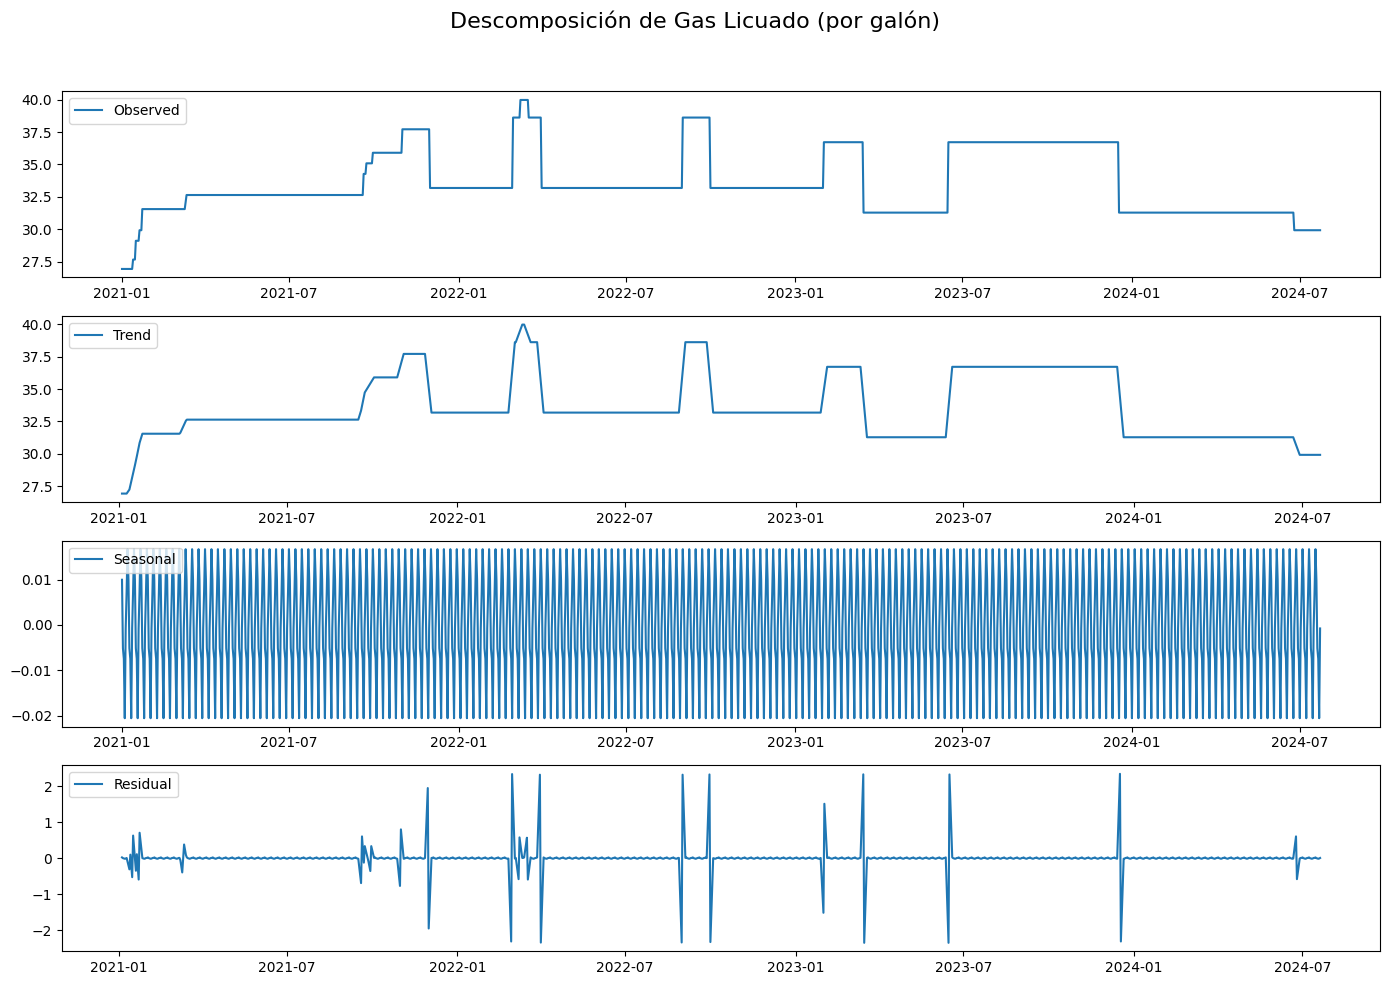

In [79]:
# Realizar la descomposición de la serie para cada tipo de combustible
decomposed_super = seasonal_decompose(series_gasolina_super, model='additive', period=7)
decomposed_regular = seasonal_decompose(series_gasolina_regular, model='additive', period=7)
decomposed_diesel = seasonal_decompose(series_diesel, model='additive', period=7)
decomposed_gas_licuado = seasonal_decompose(series_gas_licuado, model='additive', period=7)


# Graficar la descomposición para cada serie
plot_decomposition(decomposed_super, 'Descomposición de Gasolina Superior')
plot_decomposition(decomposed_regular, 'Descomposición de Gasolina Regular')
plot_decomposition(decomposed_diesel, 'Descomposición de Diésel')
plot_decomposition(decomposed_gas_licuado, 'Descomposición de Gas Licuado (por galón)')

In [80]:
# Prueba de Dickey-Fuller para la serie diferenciada
result_super = adfuller(series_gasolina_super.dropna())
result_regular = adfuller(series_gasolina_regular.dropna())
result_diesel = adfuller(series_diesel.dropna())
result_gas_licuado = adfuller(series_gas_licuado.dropna())

print("ADF Statistic (Gasolina Superior):", result_super[0])
print("p-value (Gasolina Superior):", result_super[1])
print("ADF Statistic (Gasolina Regular):", result_regular[0])
print("p-value (Gasolina Regular):", result_regular[1])
print("ADF Statistic (Diesel):", result_diesel[0])
print("p-value (Diesel):", result_diesel[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado[0])
print("p-value (Gas Licuado):", result_gas_licuado[1])

ADF Statistic (Gasolina Superior): -2.9342088364403343
p-value (Gasolina Superior): 0.041512147754201686
ADF Statistic (Gasolina Regular): -2.710705982363279
p-value (Gasolina Regular): 0.07220391824731417
ADF Statistic (Diesel): -2.3756179613682122
p-value (Diesel): 0.1487366307607595
ADF Statistic (Gas Licuado): -3.718837496186405
p-value (Gas Licuado): 0.0038558562242720445


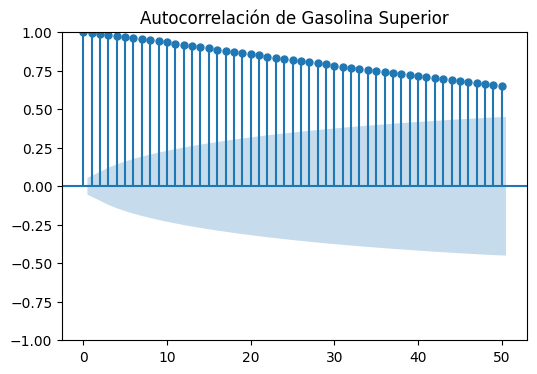

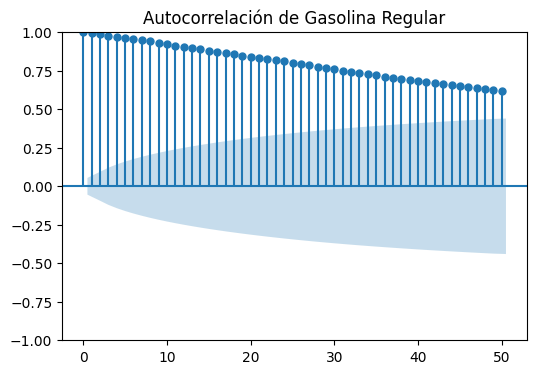

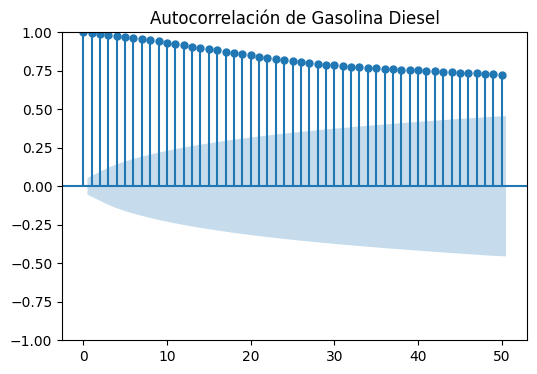

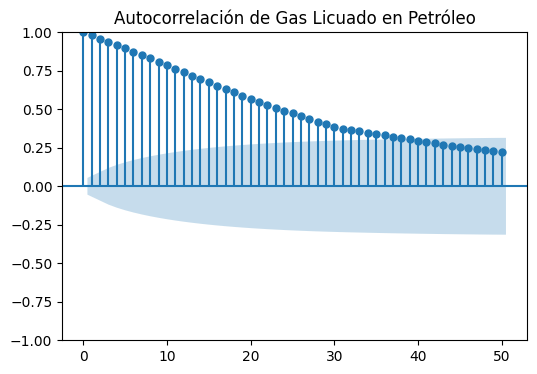

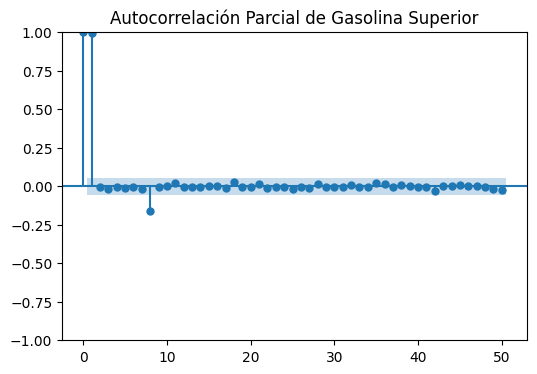

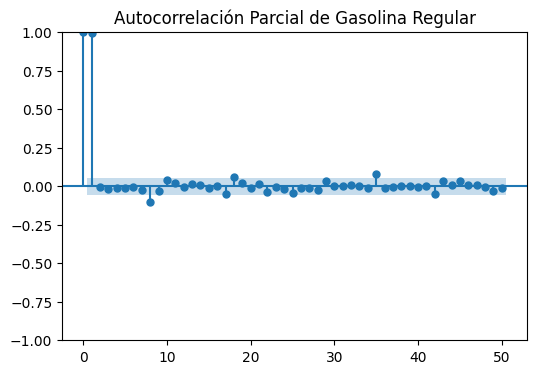

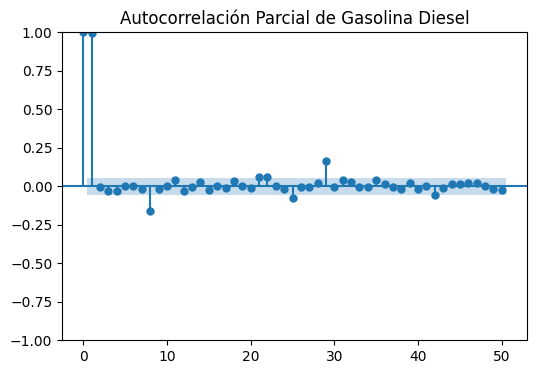

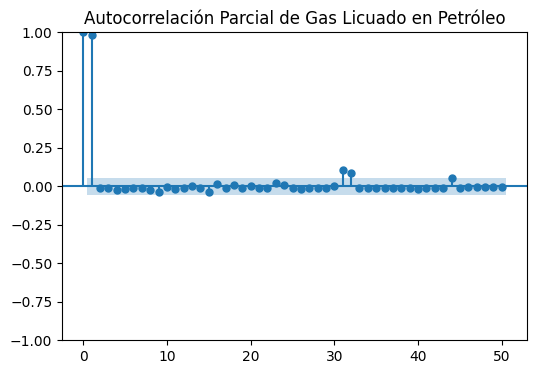

In [81]:
# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_super.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_regular.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_diesel.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gas_licuado.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gas Licuado en Petróleo')
plt.show()

# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_super.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_regular.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_diesel.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gas_licuado.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gas Licuado en Petróleo')
plt.show()

In [82]:
series_regular_diff = series_gasolina_regular.diff().dropna()
series_diesel_diff = series_diesel.diff().dropna()

# Prueba de Dickey-Fuller para la serie diferenciada
result_super_diff = adfuller(series_gasolina_super.dropna())
result_regular_diff = adfuller(series_regular_diff.dropna())
result_diesel_diff = adfuller(series_diesel_diff.dropna())
result_gas_licuado_diff = adfuller(series_gas_licuado.dropna())

print("ADF Statistic (Gasolina Superior):", result_super_diff[0])
print("p-value (Gasolina Superior):", result_super_diff[1])
print("ADF Statistic (Gasolina Regular):", result_regular_diff[0])
print("p-value (Gasolina Regular):", result_regular_diff[1])
print("ADF Statistic (Diesel):", result_diesel_diff[0])
print("p-value (Diesel):", result_diesel_diff[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado_diff[0])
print("p-value (Gas Licuado):", result_gas_licuado_diff[1])

ADF Statistic (Gasolina Superior): -2.9342088364403343
p-value (Gasolina Superior): 0.041512147754201686
ADF Statistic (Gasolina Regular): -8.514719078688485
p-value (Gasolina Regular): 1.1422615182012375e-13
ADF Statistic (Diesel): -7.086006693195777
p-value (Diesel): 4.5367638403782357e-10
ADF Statistic (Gas Licuado): -3.718837496186405
p-value (Gas Licuado): 0.0038558562242720445


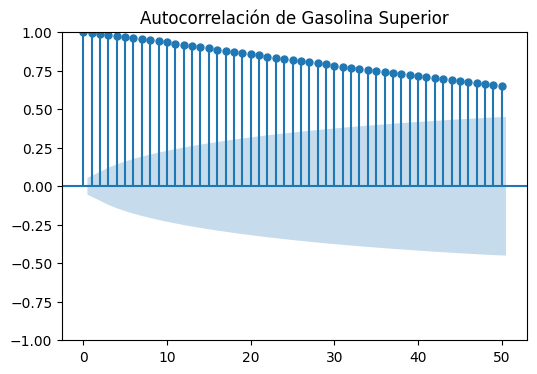

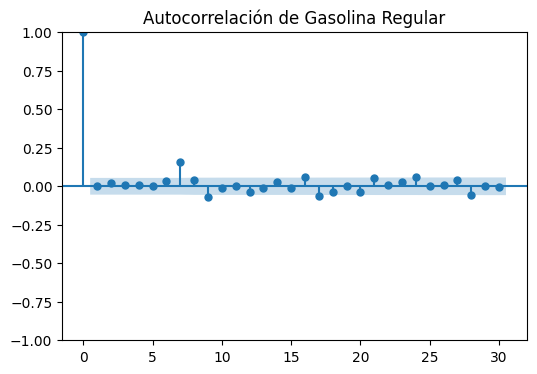

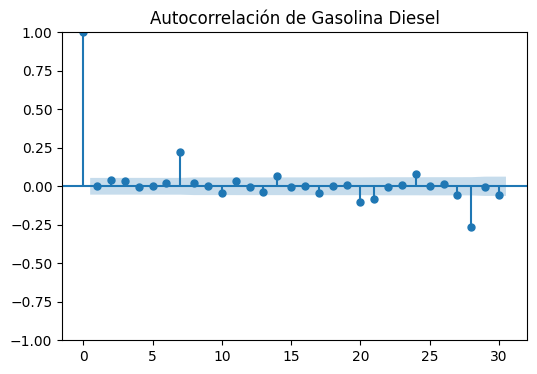

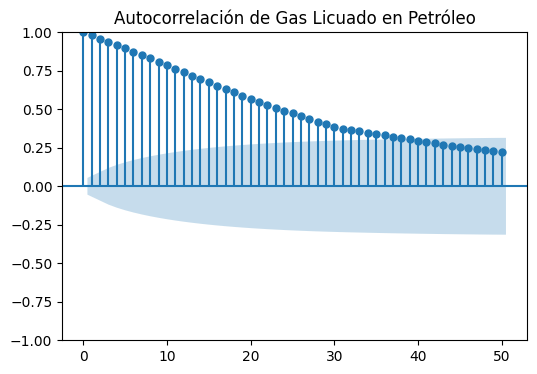

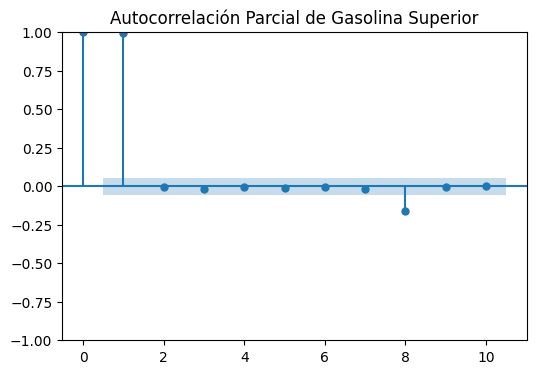

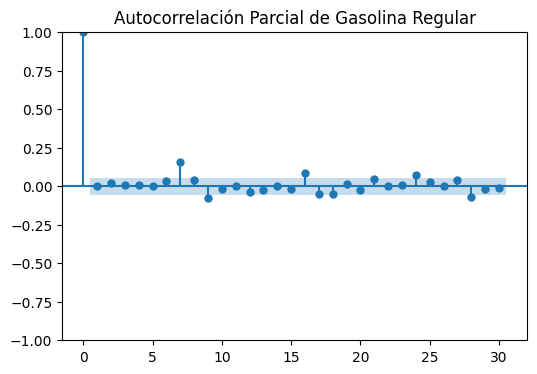

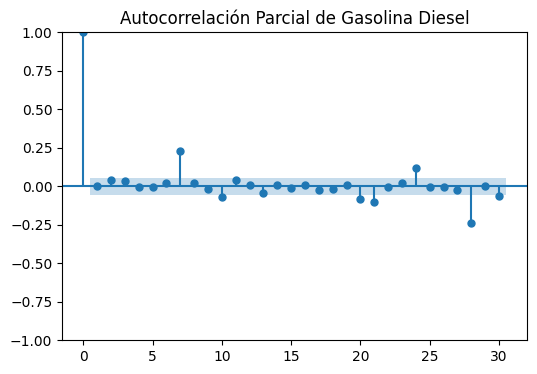

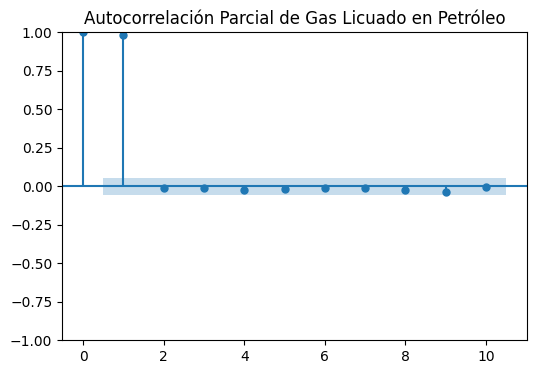

In [86]:
# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_super.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_regular_diff.dropna(), lags=30, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_diesel_diff.dropna(), lags=30, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gas_licuado.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gas Licuado en Petróleo')
plt.show()

# Graficar autocorrelación parcial
plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_super.dropna(), lags=10, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_regular_diff.dropna(), lags=30, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_diesel_diff.dropna(), lags=30, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gas_licuado.dropna(), lags=10, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gas Licuado en Petróleo')
plt.show()

In [87]:
model_super = auto_arima(series_gasolina_super, seasonal=True, m=12)
print(model_super.summary())

model_regular = auto_arima(series_regular_diff, seasonal=True, m=12)
print(model_regular.summary())

model_diesel = auto_arima(series_diesel_diff, seasonal=True, m=12)
print(model_diesel.summary())

model_gas_licuado = auto_arima(series_gas_licuado, seasonal=True, m=12)
print(model_gas_licuado.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1300
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -386.794
Date:                Thu, 01 Aug 2024   AIC                            775.588
Time:                        22:45:17   BIC                            780.757
Sample:                    01-01-2021   HQIC                           777.527
                         - 07-23-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1062      0.001    118.714      0.000       0.104       0.108
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             93180.14
Prob(Q):                              0.98   Pr

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC: 775.5877932634703
BIC: 780.7571432801409


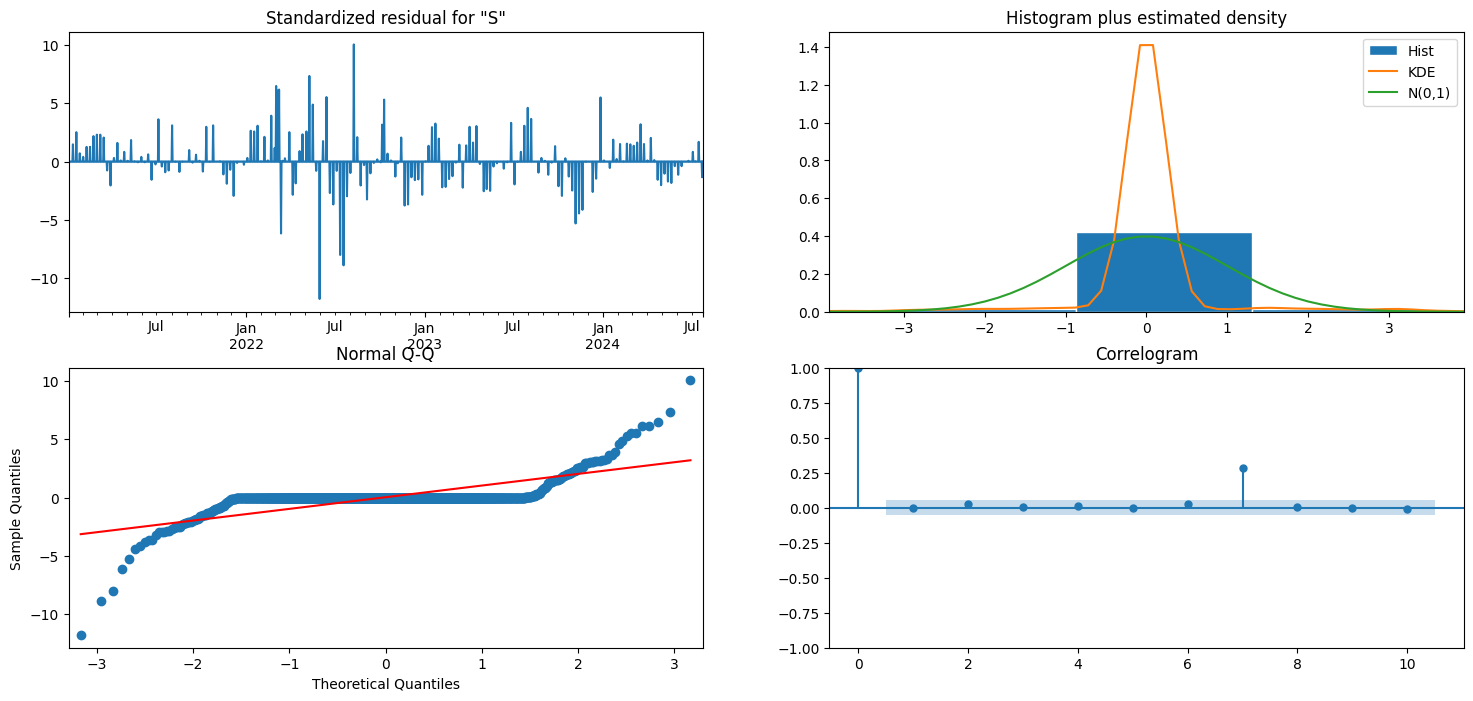

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC: 989.921570327628
BIC: 1010.5989703943104


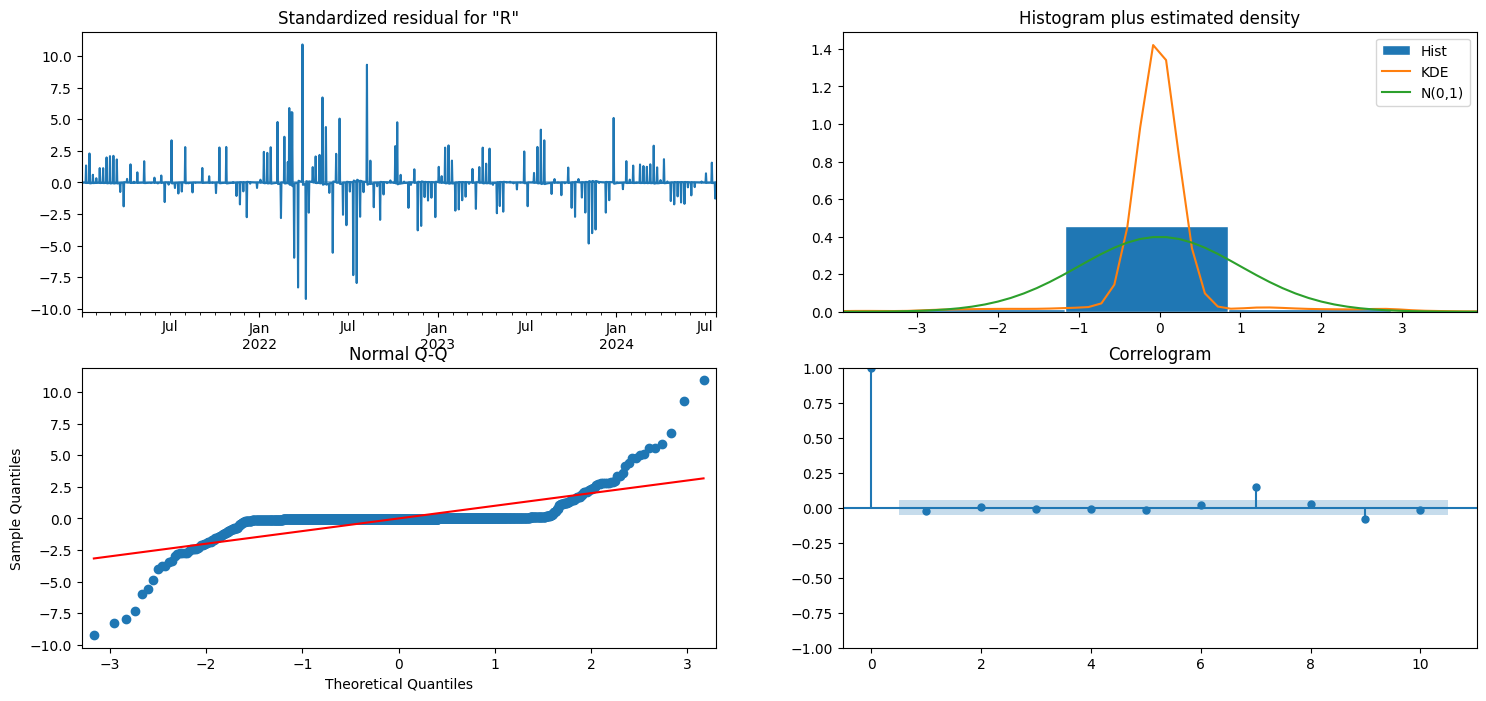

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC: 1724.3908148571131
BIC: 1755.4069149571367


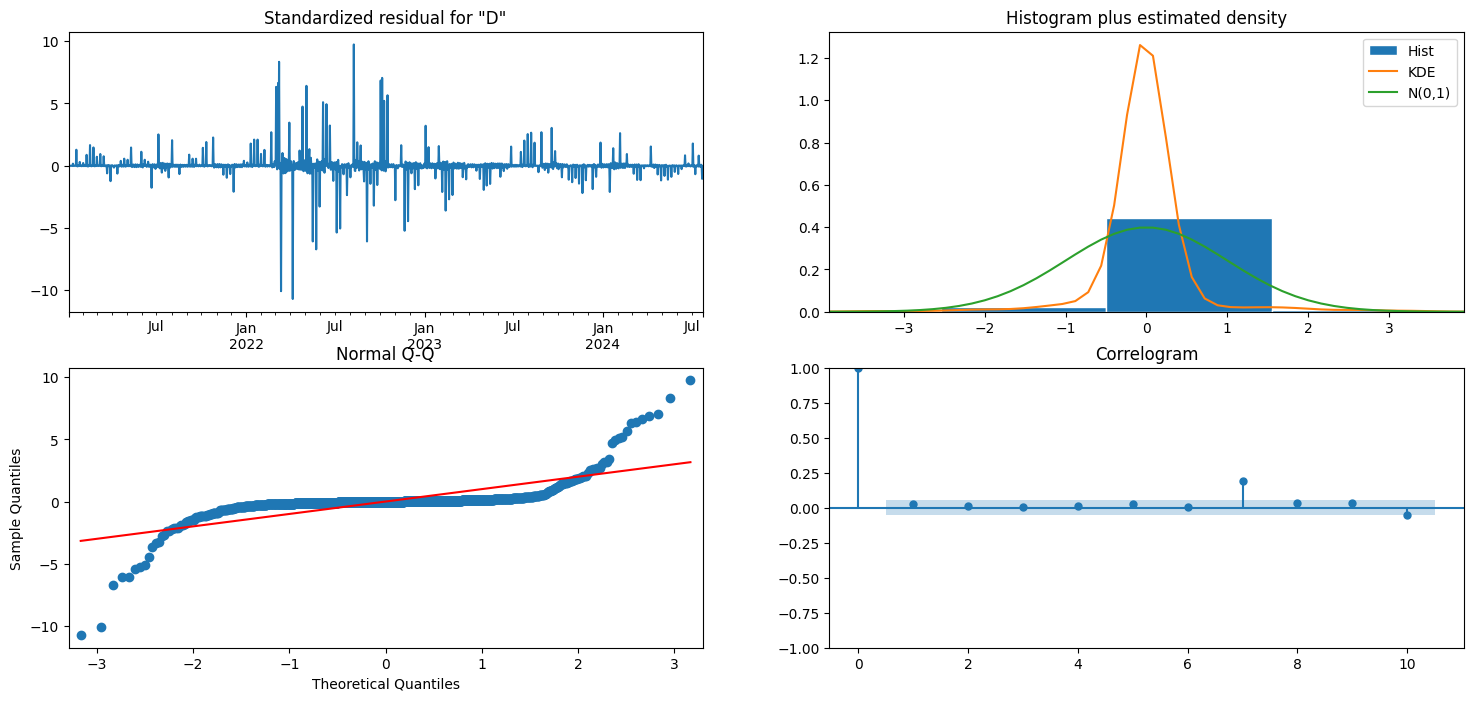

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC: 1596.7601484438242
BIC: 1601.9294984604949


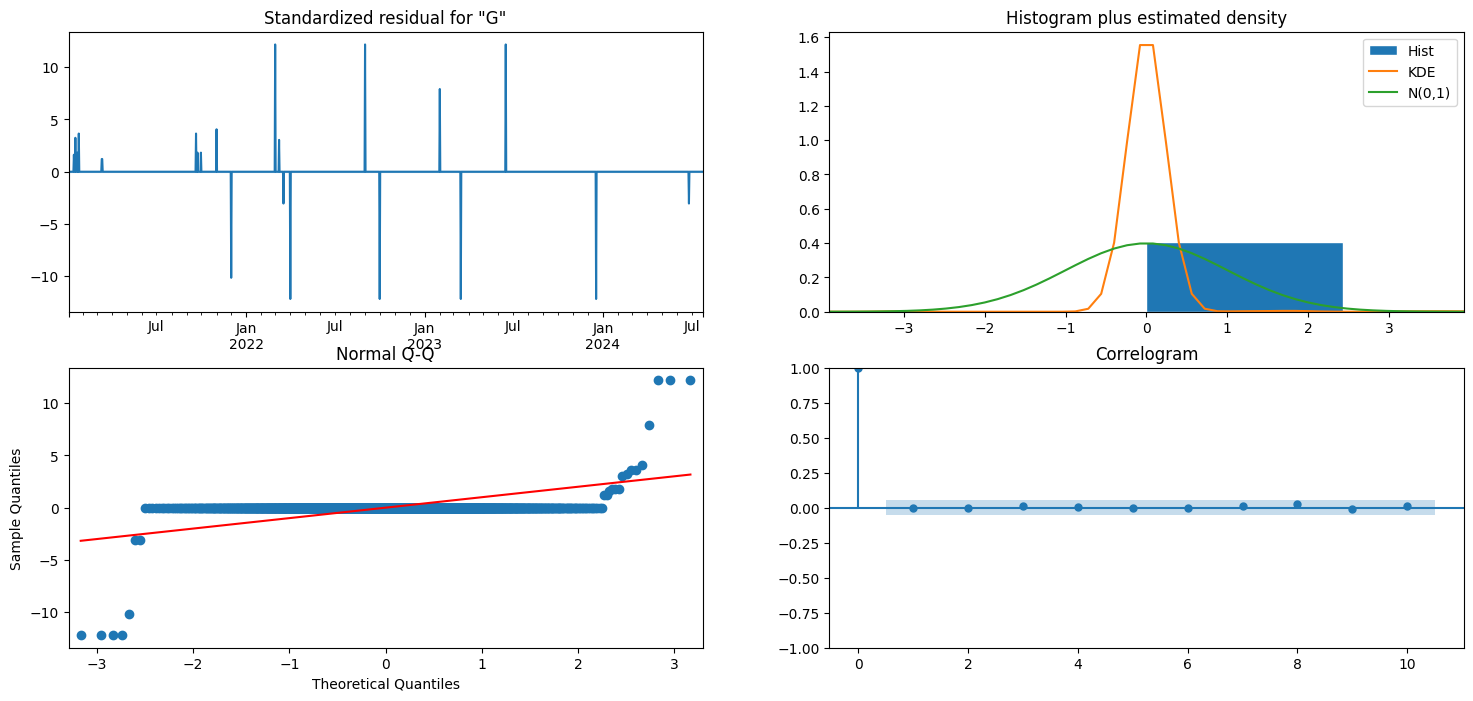

In [88]:
model_super_ARIMA = ARIMA(series_gasolina_super, order=(0, 1, 0))
model_fit_super = model_super_ARIMA.fit()
print('AIC:', model_fit_super.aic)
print('BIC:', model_fit_super.bic)

model_fit_super.plot_diagnostics(figsize=(18, 8))
plt.show()

model_regular_ARIMA = ARIMA(series_regular_diff, order=(1, 0, 1))
model_fit_regular = model_regular_ARIMA.fit()
print('AIC:', model_fit_regular.aic)
print('BIC:', model_fit_regular.bic)

model_fit_regular.plot_diagnostics(figsize=(18, 8))
plt.show()

model_diesel_ARIMA = ARIMA(series_diesel_diff, order=(2, 0, 2))
model_fit_diesel = model_diesel_ARIMA.fit()
print('AIC:', model_fit_diesel.aic)
print('BIC:', model_fit_diesel.bic)

model_fit_diesel.plot_diagnostics(figsize=(18, 8))
plt.show()

model_gas_licuado_ARIMA = ARIMA(series_gas_licuado, order=(0, 1, 0))
model_fit_gas_licuado = model_gas_licuado_ARIMA.fit()
print('AIC:', model_fit_gas_licuado.aic)
print('BIC:', model_fit_gas_licuado.bic)

model_fit_gas_licuado.plot_diagnostics(figsize=(18, 8))
plt.show()

22:48:41 - cmdstanpy - INFO - Chain [1] start processing
22:48:41 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:

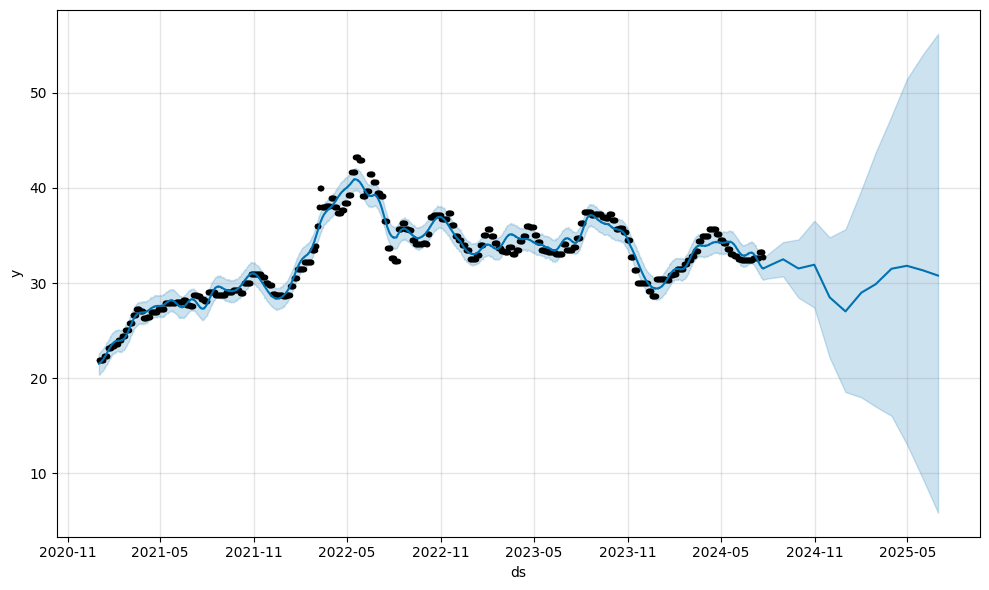

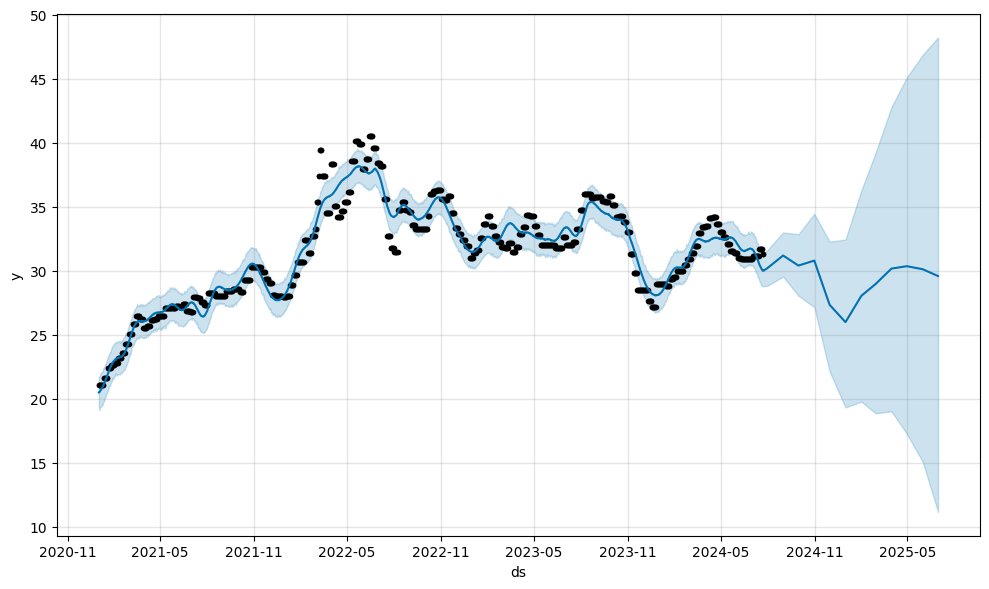

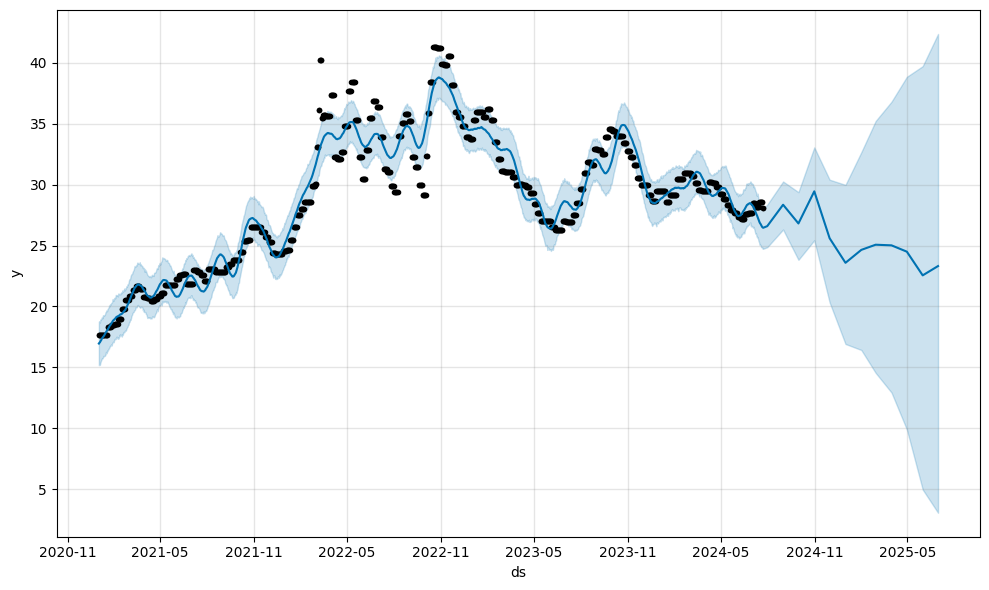

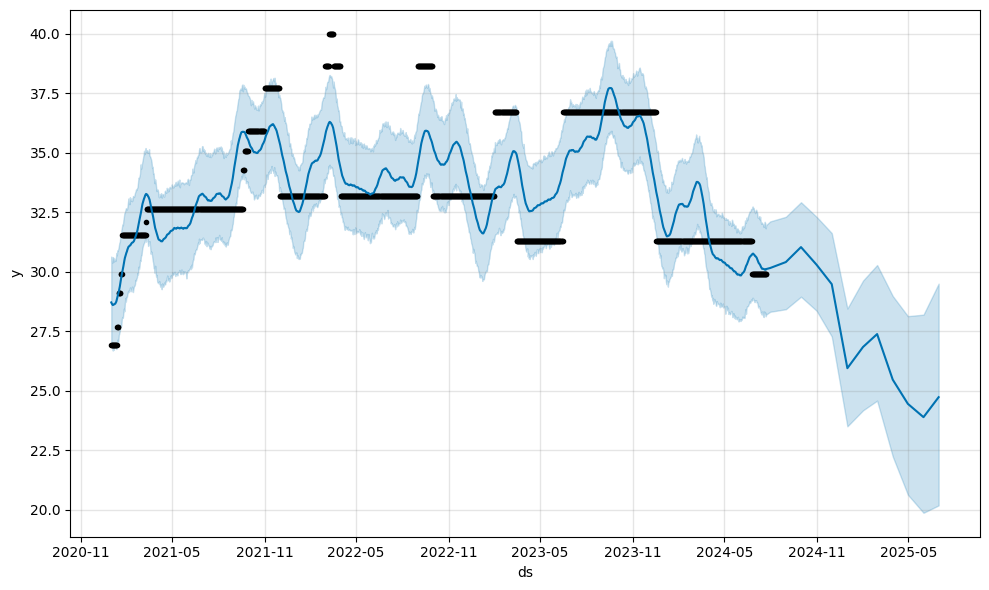

In [89]:
series_gasolina_super_prophet = series_gasolina_super.reset_index()
series_gasolina_super_prophet.columns = ['ds', 'y']

model_super_prophet = Prophet()
model_super_prophet.fit(series_gasolina_super_prophet)
future = model_super_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_super_prophet.predict(future)

fig = model_super_prophet.plot(forecast)

series_gasolina_regular_prophet = series_gasolina_regular.reset_index()
series_gasolina_regular_prophet.columns = ['ds', 'y']

model_regular_prophet = Prophet()
model_regular_prophet.fit(series_gasolina_regular_prophet)
future = model_regular_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_regular_prophet.predict(future)

fig = model_regular_prophet.plot(forecast)

series_diesel_prophet = series_diesel.reset_index()
series_diesel_prophet.columns = ['ds', 'y']

model_diesel_prophet = Prophet()
model_diesel_prophet.fit(series_diesel_prophet)
future = model_diesel_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_diesel_prophet.predict(future)

fig = model_diesel_prophet.plot(forecast)

series_gas_licuado_prophet = series_gas_licuado.reset_index()
series_gas_licuado_prophet.columns = ['ds', 'y']

model_gas_licuado_prophet = Prophet()
model_gas_licuado_prophet.fit(series_gas_licuado_prophet)
future = model_gas_licuado_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_gas_licuado_prophet.predict(future)

fig = model_gas_licuado_prophet.plot(forecast)